In [1]:
# Neural Network: Python codes: Australian
#----------------------------------------

import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete'

In [2]:
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation, concatenate, Dropout

Using TensorFlow backend.


In [4]:
# Load the Concrete Compressive Strength dataset.

dataset = np.loadtxt("CONCRETE-Training-Data.txt")

x_group = [[7], [0], [7], [3], [0], [0], [3]]

X = dataset[:, 0:8]
Y = dataset[:, 8]

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]
X5 = dataset[:, x_group[4]]
X6 = dataset[:, x_group[5]]
X7 = dataset[:, x_group[6]]
Y = dataset[:, 8]

In [5]:
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
np.round(X_sample_mean, 4)

X_sample_std = np.std(X, axis = 0, ddof = 1)
np.round(X_sample_std, 4)

X1_sample_mean = X_sample_mean[x_group[0]]
np.round(X1_sample_mean, 4)

X1_sample_std = X_sample_std[x_group[0]]
np.round(X1_sample_std, 4)

X2_sample_mean = X_sample_mean[x_group[1]]
np.round(X2_sample_mean, 4)

X2_sample_std = X_sample_std[x_group[1]]
np.round(X2_sample_std, 4)

X3_sample_mean = X_sample_mean[x_group[2]]
np.round(X3_sample_mean, 4)

X3_sample_std = X_sample_std[x_group[2]]
np.round(X3_sample_std, 4)

X4_sample_mean = X_sample_mean[x_group[3]]
np.round(X4_sample_mean, 4)

X4_sample_std = X_sample_std[x_group[3]]
np.round(X4_sample_std, 4)

X5_sample_mean = X_sample_mean[x_group[4]]
np.round(X5_sample_mean, 4)

X5_sample_std = X_sample_std[x_group[4]]
np.round(X5_sample_std, 4)

X6_sample_mean = X_sample_mean[x_group[5]]
np.round(X6_sample_mean, 4)

X6_sample_std = X_sample_std[x_group[5]]
np.round(X6_sample_std, 4)

X7_sample_mean = X_sample_mean[x_group[6]]
np.round(X7_sample_mean, 4)

X7_sample_std = X_sample_std[x_group[6]]
np.round(X7_sample_std, 4)

Y_sample_mean = np.mean(Y, axis = 0)
np.round(Y_sample_mean, 4)

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
np.round(Y_sample_std, 4)

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]
X5_train = X_train[:, x_group[4]]
X6_train = X_train[:, x_group[5]]
X7_train = X_train[:, x_group[6]]

np.round(np.mean(X1_train, axis = 0), 4)
np.round(np.std(X1_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X2_train, axis = 0), 4)
np.round(np.std(X2_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X3_train, axis = 0), 4)
np.round(np.std(X3_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X4_train, axis = 0), 4)
np.round(np.std(X4_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X5_train, axis = 0), 4)
np.round(np.std(X5_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X6_train, axis = 0), 4)
np.round(np.std(X6_train, axis = 0, ddof = 1), 4)

np.round(np.mean(X7_train, axis = 0), 4)
np.round(np.std(X7_train, axis = 0, ddof = 1), 4)

Y_train = standardize(Y)

np.round(np.mean(Y_train, axis = 0), 4)
np.round(np.std(Y_train, axis = 0, ddof = 1), 4)

1.0

In [6]:
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)

In [7]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    input_g1 = Input(shape = (1,))
    x1 = input_g1
    t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
    t1 = Dropout(rate = 0.1)(t1)
    #
    y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    #
    input_g2 = Input(shape = (1,))
    x2 = concatenate([y11, input_g2], axis = 1)  # column bind
    t2 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x2)
    t2 = Dropout(rate = 0.1)(t2)
    #
    y21 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    y22 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    #
    input_g3 = Input(shape = (1,))
    x3 = concatenate([y21, input_g3], axis = 1)  # column bind
    t3 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x3)
    t3 = Dropout(rate = 0.1)(t3)
    #
    y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    #
    input_g6 = Input(shape = (1,))
    x6 = concatenate([y22, input_g6], axis = 1)  # column bind
    t6 = Dense(units = 5, kernel_initializer = "uniform", activation = "relu")(x6)
    t6 = Dropout(rate = 0.1)(t6)
    #
    y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    #
    input_g9 = Input(shape = (1,))
    x9 = concatenate([y12, input_g9], axis = 1)  # column bind
    t9 = Dense(units = 5, kernel_initializer = "uniform", activation = "linear")(x9)
    t9 = Dropout(rate = 0.1)(t9)
    #
    y91 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
    y92 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
    #
    input_g10 = Input(shape = (1,))
    x10 = concatenate([y91, input_g10], axis = 1)  # column bind
    t10 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x10)
    t10 = Dropout(rate = 0.1)(t10)
    #
    y101 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
    y102 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
    #
    input_g13 = Input(shape = (1,))
    x13 = concatenate([y92, input_g13], axis = 1)  # column bind
    t13 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x13)
    t13 = Dropout(rate = 0.1)(t13)
    #
    y131 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t13)
    y132 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t13)
    #
    x_final =  concatenate([y31, y32, y61, y62, y101, y102, y131, y132], axis = 1)  # column bind
    y_final = Dense(units = 6, kernel_initializer = "uniform", activation = "relu")(x_final)
    y_final = Dropout(rate = 0.1)(y_final)
    y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(y_final)
    response = y_final
    #
    model = Model(inputs = [input_g1, input_g2, input_g3, input_g6, input_g9, input_g10, input_g13], 
		    outputs = response)
    #
    #model.summary()
    # Compile the model.
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index]
    , X4_train[train_index], X5_train[train_index], X6_train[train_index]
    , X7_train[train_index]], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index]
    , X4_train[test_index], X5_train[test_index], X6_train[test_index], X7_train[test_index]]
    , Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])

Train on 741 samples, validate on 186 samples
Epoch 1/1000
 - 3s - loss: 0.9752 - mean_absolute_error: 0.7897 - val_loss: 1.1710 - val_mean_absolute_error: 0.9073
Epoch 2/1000
 - 0s - loss: 0.9747 - mean_absolute_error: 0.7897 - val_loss: 1.1709 - val_mean_absolute_error: 0.9074
Epoch 3/1000
 - 0s - loss: 0.9724 - mean_absolute_error: 0.7895 - val_loss: 1.1707 - val_mean_absolute_error: 0.9087
Epoch 4/1000
 - 0s - loss: 0.9536 - mean_absolute_error: 0.7821 - val_loss: 1.1410 - val_mean_absolute_error: 0.8983
Epoch 5/1000
 - 0s - loss: 0.8891 - mean_absolute_error: 0.7583 - val_loss: 1.0721 - val_mean_absolute_error: 0.8775
Epoch 6/1000
 - 0s - loss: 0.7808 - mean_absolute_error: 0.7175 - val_loss: 0.9949 - val_mean_absolute_error: 0.8539
Epoch 7/1000
 - 0s - loss: 0.7142 - mean_absolute_error: 0.6929 - val_loss: 0.9095 - val_mean_absolute_error: 0.8119
Epoch 8/1000
 - 0s - loss: 0.6878 - mean_absolute_error: 0.6768 - val_loss: 0.8576 - val_mean_absolute_error: 0.7868
Epoch 9/1000
 - 0s

Epoch 71/1000
 - 0s - loss: 0.3680 - mean_absolute_error: 0.4898 - val_loss: 0.3827 - val_mean_absolute_error: 0.5194
Epoch 72/1000
 - 0s - loss: 0.3636 - mean_absolute_error: 0.4881 - val_loss: 0.3858 - val_mean_absolute_error: 0.5202
Epoch 73/1000
 - 0s - loss: 0.3608 - mean_absolute_error: 0.4825 - val_loss: 0.3834 - val_mean_absolute_error: 0.5183
Epoch 74/1000
 - 0s - loss: 0.3876 - mean_absolute_error: 0.5032 - val_loss: 0.3834 - val_mean_absolute_error: 0.5180
Epoch 75/1000
 - 0s - loss: 0.3490 - mean_absolute_error: 0.4748 - val_loss: 0.3807 - val_mean_absolute_error: 0.5174
Epoch 76/1000
 - 0s - loss: 0.3740 - mean_absolute_error: 0.4928 - val_loss: 0.3855 - val_mean_absolute_error: 0.5201
Epoch 77/1000
 - 0s - loss: 0.3876 - mean_absolute_error: 0.5007 - val_loss: 0.3851 - val_mean_absolute_error: 0.5196
Epoch 78/1000
 - 0s - loss: 0.3997 - mean_absolute_error: 0.5076 - val_loss: 0.3823 - val_mean_absolute_error: 0.5175
Epoch 79/1000
 - 0s - loss: 0.3792 - mean_absolute_error

 - 0s - loss: 0.3651 - mean_absolute_error: 0.4804 - val_loss: 0.3535 - val_mean_absolute_error: 0.4880
Epoch 141/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4621 - val_loss: 0.3525 - val_mean_absolute_error: 0.4887
Epoch 142/1000
 - 0s - loss: 0.3554 - mean_absolute_error: 0.4756 - val_loss: 0.3583 - val_mean_absolute_error: 0.4911
Epoch 143/1000
 - 0s - loss: 0.3535 - mean_absolute_error: 0.4747 - val_loss: 0.3537 - val_mean_absolute_error: 0.4882
Epoch 144/1000
 - 0s - loss: 0.3382 - mean_absolute_error: 0.4594 - val_loss: 0.3500 - val_mean_absolute_error: 0.4852
Epoch 145/1000
 - 0s - loss: 0.3532 - mean_absolute_error: 0.4775 - val_loss: 0.3605 - val_mean_absolute_error: 0.4904
Epoch 146/1000
 - 0s - loss: 0.3367 - mean_absolute_error: 0.4641 - val_loss: 0.3502 - val_mean_absolute_error: 0.4854
Epoch 147/1000
 - 0s - loss: 0.3564 - mean_absolute_error: 0.4843 - val_loss: 0.3581 - val_mean_absolute_error: 0.4907
Epoch 148/1000
 - 0s - loss: 0.3594 - mean_absolute_error: 0.48

Epoch 209/1000
 - 0s - loss: 0.3643 - mean_absolute_error: 0.4764 - val_loss: 0.3415 - val_mean_absolute_error: 0.4766
Epoch 210/1000
 - 0s - loss: 0.3480 - mean_absolute_error: 0.4615 - val_loss: 0.3420 - val_mean_absolute_error: 0.4770
Epoch 211/1000
 - 0s - loss: 0.3482 - mean_absolute_error: 0.4681 - val_loss: 0.3448 - val_mean_absolute_error: 0.4774
Epoch 212/1000
 - 0s - loss: 0.3631 - mean_absolute_error: 0.4786 - val_loss: 0.3509 - val_mean_absolute_error: 0.4879
Epoch 213/1000
 - 0s - loss: 0.3683 - mean_absolute_error: 0.4814 - val_loss: 0.3444 - val_mean_absolute_error: 0.4797
Epoch 214/1000
 - 0s - loss: 0.3482 - mean_absolute_error: 0.4669 - val_loss: 0.3416 - val_mean_absolute_error: 0.4781
Epoch 215/1000
 - 0s - loss: 0.3318 - mean_absolute_error: 0.4628 - val_loss: 0.3377 - val_mean_absolute_error: 0.4753
Epoch 216/1000
 - 0s - loss: 0.3530 - mean_absolute_error: 0.4761 - val_loss: 0.3346 - val_mean_absolute_error: 0.4726
Epoch 217/1000
 - 0s - loss: 0.3340 - mean_absol

Epoch 278/1000
 - 0s - loss: 0.3498 - mean_absolute_error: 0.4742 - val_loss: 0.3337 - val_mean_absolute_error: 0.4720
Epoch 279/1000
 - 0s - loss: 0.3568 - mean_absolute_error: 0.4687 - val_loss: 0.3326 - val_mean_absolute_error: 0.4732
Epoch 280/1000
 - 0s - loss: 0.3566 - mean_absolute_error: 0.4824 - val_loss: 0.3354 - val_mean_absolute_error: 0.4711
Epoch 281/1000
 - 0s - loss: 0.3551 - mean_absolute_error: 0.4740 - val_loss: 0.3336 - val_mean_absolute_error: 0.4708
Epoch 282/1000
 - 0s - loss: 0.3483 - mean_absolute_error: 0.4753 - val_loss: 0.3339 - val_mean_absolute_error: 0.4721
Epoch 283/1000
 - 0s - loss: 0.3279 - mean_absolute_error: 0.4614 - val_loss: 0.3358 - val_mean_absolute_error: 0.4725
Epoch 284/1000
 - 0s - loss: 0.3462 - mean_absolute_error: 0.4736 - val_loss: 0.3369 - val_mean_absolute_error: 0.4737
Epoch 285/1000
 - 0s - loss: 0.3435 - mean_absolute_error: 0.4697 - val_loss: 0.3374 - val_mean_absolute_error: 0.4736
Epoch 286/1000
 - 0s - loss: 0.3645 - mean_absol

Epoch 347/1000
 - 0s - loss: 0.3435 - mean_absolute_error: 0.4714 - val_loss: 0.3411 - val_mean_absolute_error: 0.4758
Epoch 348/1000
 - 0s - loss: 0.3583 - mean_absolute_error: 0.4772 - val_loss: 0.3336 - val_mean_absolute_error: 0.4719
Epoch 349/1000
 - 0s - loss: 0.3351 - mean_absolute_error: 0.4624 - val_loss: 0.3369 - val_mean_absolute_error: 0.4727
Epoch 350/1000
 - 0s - loss: 0.3401 - mean_absolute_error: 0.4679 - val_loss: 0.3351 - val_mean_absolute_error: 0.4745
Epoch 351/1000
 - 0s - loss: 0.3642 - mean_absolute_error: 0.4779 - val_loss: 0.3375 - val_mean_absolute_error: 0.4740
Epoch 352/1000
 - 0s - loss: 0.3640 - mean_absolute_error: 0.4811 - val_loss: 0.3384 - val_mean_absolute_error: 0.4754
Epoch 353/1000
 - 0s - loss: 0.3443 - mean_absolute_error: 0.4657 - val_loss: 0.3365 - val_mean_absolute_error: 0.4748
Epoch 354/1000
 - 0s - loss: 0.3496 - mean_absolute_error: 0.4694 - val_loss: 0.3404 - val_mean_absolute_error: 0.4757
Epoch 355/1000
 - 0s - loss: 0.3559 - mean_absol

Epoch 416/1000
 - 0s - loss: 0.3432 - mean_absolute_error: 0.4624 - val_loss: 0.3362 - val_mean_absolute_error: 0.4735
Epoch 417/1000
 - 0s - loss: 0.3465 - mean_absolute_error: 0.4703 - val_loss: 0.3390 - val_mean_absolute_error: 0.4741
Epoch 418/1000
 - 0s - loss: 0.3480 - mean_absolute_error: 0.4733 - val_loss: 0.3476 - val_mean_absolute_error: 0.4806
Epoch 419/1000
 - 0s - loss: 0.3567 - mean_absolute_error: 0.4724 - val_loss: 0.3414 - val_mean_absolute_error: 0.4762
Epoch 420/1000
 - 0s - loss: 0.3577 - mean_absolute_error: 0.4700 - val_loss: 0.3402 - val_mean_absolute_error: 0.4769
Epoch 421/1000
 - 0s - loss: 0.3463 - mean_absolute_error: 0.4760 - val_loss: 0.3389 - val_mean_absolute_error: 0.4753
Epoch 422/1000
 - 0s - loss: 0.3575 - mean_absolute_error: 0.4758 - val_loss: 0.3401 - val_mean_absolute_error: 0.4776
Epoch 423/1000
 - 0s - loss: 0.3330 - mean_absolute_error: 0.4680 - val_loss: 0.3403 - val_mean_absolute_error: 0.4770
Epoch 424/1000
 - 0s - loss: 0.3340 - mean_absol

Epoch 485/1000
 - 0s - loss: 0.3481 - mean_absolute_error: 0.4738 - val_loss: 0.3431 - val_mean_absolute_error: 0.4762
Epoch 486/1000
 - 0s - loss: 0.3584 - mean_absolute_error: 0.4689 - val_loss: 0.3367 - val_mean_absolute_error: 0.4726
Epoch 487/1000
 - 0s - loss: 0.3398 - mean_absolute_error: 0.4674 - val_loss: 0.3316 - val_mean_absolute_error: 0.4690
Epoch 488/1000
 - 0s - loss: 0.3534 - mean_absolute_error: 0.4698 - val_loss: 0.3424 - val_mean_absolute_error: 0.4770
Epoch 489/1000
 - 0s - loss: 0.3255 - mean_absolute_error: 0.4559 - val_loss: 0.3321 - val_mean_absolute_error: 0.4704
Epoch 490/1000
 - 0s - loss: 0.3407 - mean_absolute_error: 0.4681 - val_loss: 0.3329 - val_mean_absolute_error: 0.4700
Epoch 491/1000
 - 0s - loss: 0.3341 - mean_absolute_error: 0.4546 - val_loss: 0.3328 - val_mean_absolute_error: 0.4699
Epoch 492/1000
 - 0s - loss: 0.3546 - mean_absolute_error: 0.4766 - val_loss: 0.3420 - val_mean_absolute_error: 0.4779
Epoch 493/1000
 - 0s - loss: 0.3255 - mean_absol

Epoch 554/1000
 - 0s - loss: 0.3386 - mean_absolute_error: 0.4650 - val_loss: 0.3400 - val_mean_absolute_error: 0.4753
Epoch 555/1000
 - 0s - loss: 0.3352 - mean_absolute_error: 0.4615 - val_loss: 0.3385 - val_mean_absolute_error: 0.4743
Epoch 556/1000
 - 0s - loss: 0.3484 - mean_absolute_error: 0.4646 - val_loss: 0.3362 - val_mean_absolute_error: 0.4725
Epoch 557/1000
 - 0s - loss: 0.3672 - mean_absolute_error: 0.4876 - val_loss: 0.3364 - val_mean_absolute_error: 0.4716
Epoch 558/1000
 - 0s - loss: 0.3104 - mean_absolute_error: 0.4472 - val_loss: 0.3346 - val_mean_absolute_error: 0.4707
Epoch 559/1000
 - 0s - loss: 0.3604 - mean_absolute_error: 0.4808 - val_loss: 0.3364 - val_mean_absolute_error: 0.4722
Epoch 560/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4517 - val_loss: 0.3369 - val_mean_absolute_error: 0.4715
Epoch 561/1000
 - 0s - loss: 0.3503 - mean_absolute_error: 0.4686 - val_loss: 0.3401 - val_mean_absolute_error: 0.4780
Epoch 562/1000
 - 0s - loss: 0.3546 - mean_absol

Epoch 623/1000
 - 0s - loss: 0.3691 - mean_absolute_error: 0.4796 - val_loss: 0.3384 - val_mean_absolute_error: 0.4726
Epoch 624/1000
 - 0s - loss: 0.3227 - mean_absolute_error: 0.4501 - val_loss: 0.3345 - val_mean_absolute_error: 0.4703
Epoch 625/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.4644 - val_loss: 0.3349 - val_mean_absolute_error: 0.4708
Epoch 626/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.4515 - val_loss: 0.3375 - val_mean_absolute_error: 0.4737
Epoch 627/1000
 - 0s - loss: 0.3613 - mean_absolute_error: 0.4787 - val_loss: 0.3392 - val_mean_absolute_error: 0.4738
Epoch 628/1000
 - 0s - loss: 0.3450 - mean_absolute_error: 0.4663 - val_loss: 0.3404 - val_mean_absolute_error: 0.4746
Epoch 629/1000
 - 0s - loss: 0.3434 - mean_absolute_error: 0.4603 - val_loss: 0.3410 - val_mean_absolute_error: 0.4759
Epoch 630/1000
 - 0s - loss: 0.3420 - mean_absolute_error: 0.4635 - val_loss: 0.3447 - val_mean_absolute_error: 0.4776
Epoch 631/1000
 - 0s - loss: 0.3447 - mean_absol

Epoch 692/1000
 - 0s - loss: 0.3416 - mean_absolute_error: 0.4669 - val_loss: 0.3331 - val_mean_absolute_error: 0.4688
Epoch 693/1000
 - 0s - loss: 0.3361 - mean_absolute_error: 0.4641 - val_loss: 0.3328 - val_mean_absolute_error: 0.4703
Epoch 694/1000
 - 0s - loss: 0.3457 - mean_absolute_error: 0.4680 - val_loss: 0.3328 - val_mean_absolute_error: 0.4693
Epoch 695/1000
 - 0s - loss: 0.3489 - mean_absolute_error: 0.4717 - val_loss: 0.3313 - val_mean_absolute_error: 0.4676
Epoch 696/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.4492 - val_loss: 0.3333 - val_mean_absolute_error: 0.4716
Epoch 697/1000
 - 0s - loss: 0.3410 - mean_absolute_error: 0.4662 - val_loss: 0.3362 - val_mean_absolute_error: 0.4726
Epoch 698/1000
 - 0s - loss: 0.3319 - mean_absolute_error: 0.4556 - val_loss: 0.3349 - val_mean_absolute_error: 0.4714
Epoch 699/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.4807 - val_loss: 0.3384 - val_mean_absolute_error: 0.4731
Epoch 700/1000
 - 0s - loss: 0.3387 - mean_absol

Epoch 761/1000
 - 0s - loss: 0.3328 - mean_absolute_error: 0.4632 - val_loss: 0.3346 - val_mean_absolute_error: 0.4689
Epoch 762/1000
 - 0s - loss: 0.3313 - mean_absolute_error: 0.4525 - val_loss: 0.3332 - val_mean_absolute_error: 0.4711
Epoch 763/1000
 - 0s - loss: 0.3615 - mean_absolute_error: 0.4760 - val_loss: 0.3338 - val_mean_absolute_error: 0.4694
Epoch 764/1000
 - 0s - loss: 0.3597 - mean_absolute_error: 0.4815 - val_loss: 0.3402 - val_mean_absolute_error: 0.4758
Epoch 765/1000
 - 0s - loss: 0.3308 - mean_absolute_error: 0.4678 - val_loss: 0.3374 - val_mean_absolute_error: 0.4727
Epoch 766/1000
 - 0s - loss: 0.3165 - mean_absolute_error: 0.4491 - val_loss: 0.3370 - val_mean_absolute_error: 0.4733
Epoch 767/1000
 - 0s - loss: 0.3487 - mean_absolute_error: 0.4721 - val_loss: 0.3356 - val_mean_absolute_error: 0.4719
Epoch 768/1000
 - 0s - loss: 0.3601 - mean_absolute_error: 0.4764 - val_loss: 0.3435 - val_mean_absolute_error: 0.4760
Epoch 769/1000
 - 0s - loss: 0.3598 - mean_absol

Epoch 830/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4531 - val_loss: 0.3399 - val_mean_absolute_error: 0.4728
Epoch 831/1000
 - 0s - loss: 0.3325 - mean_absolute_error: 0.4630 - val_loss: 0.3384 - val_mean_absolute_error: 0.4732
Epoch 832/1000
 - 0s - loss: 0.3248 - mean_absolute_error: 0.4564 - val_loss: 0.3407 - val_mean_absolute_error: 0.4752
Epoch 833/1000
 - 0s - loss: 0.3427 - mean_absolute_error: 0.4668 - val_loss: 0.3364 - val_mean_absolute_error: 0.4715
Epoch 834/1000
 - 0s - loss: 0.3735 - mean_absolute_error: 0.4884 - val_loss: 0.3376 - val_mean_absolute_error: 0.4733
Epoch 835/1000
 - 0s - loss: 0.3452 - mean_absolute_error: 0.4706 - val_loss: 0.3443 - val_mean_absolute_error: 0.4770
Epoch 836/1000
 - 0s - loss: 0.3475 - mean_absolute_error: 0.4706 - val_loss: 0.3435 - val_mean_absolute_error: 0.4780
Epoch 837/1000
 - 0s - loss: 0.3321 - mean_absolute_error: 0.4600 - val_loss: 0.3393 - val_mean_absolute_error: 0.4749
Epoch 838/1000
 - 0s - loss: 0.3350 - mean_absol

Epoch 899/1000
 - 0s - loss: 0.3406 - mean_absolute_error: 0.4635 - val_loss: 0.3412 - val_mean_absolute_error: 0.4762
Epoch 900/1000
 - 0s - loss: 0.3316 - mean_absolute_error: 0.4612 - val_loss: 0.3395 - val_mean_absolute_error: 0.4750
Epoch 901/1000
 - 0s - loss: 0.3600 - mean_absolute_error: 0.4750 - val_loss: 0.3401 - val_mean_absolute_error: 0.4753
Epoch 902/1000
 - 0s - loss: 0.3599 - mean_absolute_error: 0.4755 - val_loss: 0.3391 - val_mean_absolute_error: 0.4763
Epoch 903/1000
 - 0s - loss: 0.3358 - mean_absolute_error: 0.4624 - val_loss: 0.3396 - val_mean_absolute_error: 0.4743
Epoch 904/1000
 - 0s - loss: 0.3495 - mean_absolute_error: 0.4749 - val_loss: 0.3361 - val_mean_absolute_error: 0.4722
Epoch 905/1000
 - 0s - loss: 0.3528 - mean_absolute_error: 0.4734 - val_loss: 0.3401 - val_mean_absolute_error: 0.4741
Epoch 906/1000
 - 0s - loss: 0.3244 - mean_absolute_error: 0.4567 - val_loss: 0.3415 - val_mean_absolute_error: 0.4746
Epoch 907/1000
 - 0s - loss: 0.3250 - mean_absol

Epoch 968/1000
 - 0s - loss: 0.3744 - mean_absolute_error: 0.4743 - val_loss: 0.3343 - val_mean_absolute_error: 0.4709
Epoch 969/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.4542 - val_loss: 0.3373 - val_mean_absolute_error: 0.4725
Epoch 970/1000
 - 0s - loss: 0.3597 - mean_absolute_error: 0.4737 - val_loss: 0.3384 - val_mean_absolute_error: 0.4720
Epoch 971/1000
 - 0s - loss: 0.3454 - mean_absolute_error: 0.4672 - val_loss: 0.3378 - val_mean_absolute_error: 0.4718
Epoch 972/1000
 - 0s - loss: 0.3409 - mean_absolute_error: 0.4641 - val_loss: 0.3340 - val_mean_absolute_error: 0.4708
Epoch 973/1000
 - 0s - loss: 0.3547 - mean_absolute_error: 0.4754 - val_loss: 0.3415 - val_mean_absolute_error: 0.4759
Epoch 974/1000
 - 0s - loss: 0.3570 - mean_absolute_error: 0.4761 - val_loss: 0.3388 - val_mean_absolute_error: 0.4734
Epoch 975/1000
 - 0s - loss: 0.3336 - mean_absolute_error: 0.4595 - val_loss: 0.3369 - val_mean_absolute_error: 0.4730
Epoch 976/1000
 - 0s - loss: 0.3346 - mean_absol

Epoch 37/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4459 - val_loss: 0.3347 - val_mean_absolute_error: 0.4648
Epoch 38/1000
 - 0s - loss: 0.3307 - mean_absolute_error: 0.4577 - val_loss: 0.3315 - val_mean_absolute_error: 0.4617
Epoch 39/1000
 - 0s - loss: 0.3339 - mean_absolute_error: 0.4492 - val_loss: 0.3242 - val_mean_absolute_error: 0.4553
Epoch 40/1000
 - 0s - loss: 0.3172 - mean_absolute_error: 0.4430 - val_loss: 0.3260 - val_mean_absolute_error: 0.4621
Epoch 41/1000
 - 0s - loss: 0.3327 - mean_absolute_error: 0.4583 - val_loss: 0.3317 - val_mean_absolute_error: 0.4612
Epoch 42/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4560 - val_loss: 0.3265 - val_mean_absolute_error: 0.4575
Epoch 43/1000
 - 0s - loss: 0.3104 - mean_absolute_error: 0.4374 - val_loss: 0.3360 - val_mean_absolute_error: 0.4691
Epoch 44/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.4528 - val_loss: 0.3332 - val_mean_absolute_error: 0.4637
Epoch 45/1000
 - 0s - loss: 0.3289 - mean_absolute_error

Epoch 107/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4257 - val_loss: 0.3050 - val_mean_absolute_error: 0.4464
Epoch 108/1000
 - 0s - loss: 0.2837 - mean_absolute_error: 0.4229 - val_loss: 0.3073 - val_mean_absolute_error: 0.4483
Epoch 109/1000
 - 0s - loss: 0.3039 - mean_absolute_error: 0.4343 - val_loss: 0.3044 - val_mean_absolute_error: 0.4316
Epoch 110/1000
 - 0s - loss: 0.2900 - mean_absolute_error: 0.4157 - val_loss: 0.2989 - val_mean_absolute_error: 0.4309
Epoch 111/1000
 - 0s - loss: 0.2825 - mean_absolute_error: 0.4169 - val_loss: 0.3048 - val_mean_absolute_error: 0.4395
Epoch 112/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.4242 - val_loss: 0.3012 - val_mean_absolute_error: 0.4375
Epoch 113/1000
 - 0s - loss: 0.3150 - mean_absolute_error: 0.4411 - val_loss: 0.3003 - val_mean_absolute_error: 0.4306
Epoch 114/1000
 - 0s - loss: 0.2934 - mean_absolute_error: 0.4250 - val_loss: 0.2992 - val_mean_absolute_error: 0.4335
Epoch 115/1000
 - 0s - loss: 0.3019 - mean_absol

Epoch 176/1000
 - 0s - loss: 0.2887 - mean_absolute_error: 0.4226 - val_loss: 0.2928 - val_mean_absolute_error: 0.4248
Epoch 177/1000
 - 0s - loss: 0.2973 - mean_absolute_error: 0.4191 - val_loss: 0.3038 - val_mean_absolute_error: 0.4345
Epoch 178/1000
 - 0s - loss: 0.3028 - mean_absolute_error: 0.4281 - val_loss: 0.3027 - val_mean_absolute_error: 0.4308
Epoch 179/1000
 - 0s - loss: 0.2751 - mean_absolute_error: 0.4113 - val_loss: 0.2938 - val_mean_absolute_error: 0.4240
Epoch 180/1000
 - 0s - loss: 0.2871 - mean_absolute_error: 0.4196 - val_loss: 0.3021 - val_mean_absolute_error: 0.4359
Epoch 181/1000
 - 0s - loss: 0.3095 - mean_absolute_error: 0.4387 - val_loss: 0.3084 - val_mean_absolute_error: 0.4334
Epoch 182/1000
 - 0s - loss: 0.2809 - mean_absolute_error: 0.4180 - val_loss: 0.3016 - val_mean_absolute_error: 0.4326
Epoch 183/1000
 - 0s - loss: 0.2843 - mean_absolute_error: 0.4191 - val_loss: 0.3022 - val_mean_absolute_error: 0.4329
Epoch 184/1000
 - 0s - loss: 0.2959 - mean_absol

Epoch 245/1000
 - 0s - loss: 0.2821 - mean_absolute_error: 0.4132 - val_loss: 0.2979 - val_mean_absolute_error: 0.4292
Epoch 246/1000
 - 0s - loss: 0.2799 - mean_absolute_error: 0.4132 - val_loss: 0.2971 - val_mean_absolute_error: 0.4228
Epoch 247/1000
 - 0s - loss: 0.2700 - mean_absolute_error: 0.4080 - val_loss: 0.2953 - val_mean_absolute_error: 0.4266
Epoch 248/1000
 - 0s - loss: 0.2812 - mean_absolute_error: 0.4165 - val_loss: 0.3058 - val_mean_absolute_error: 0.4424
Epoch 249/1000
 - 0s - loss: 0.2752 - mean_absolute_error: 0.4013 - val_loss: 0.2953 - val_mean_absolute_error: 0.4275
Epoch 250/1000
 - 0s - loss: 0.2791 - mean_absolute_error: 0.4151 - val_loss: 0.2931 - val_mean_absolute_error: 0.4288
Epoch 251/1000
 - 0s - loss: 0.2865 - mean_absolute_error: 0.4206 - val_loss: 0.2952 - val_mean_absolute_error: 0.4243
Epoch 252/1000
 - 0s - loss: 0.2938 - mean_absolute_error: 0.4246 - val_loss: 0.2981 - val_mean_absolute_error: 0.4289
Epoch 253/1000
 - 0s - loss: 0.2853 - mean_absol

Epoch 314/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.4143 - val_loss: 0.2977 - val_mean_absolute_error: 0.4300
Epoch 315/1000
 - 0s - loss: 0.2812 - mean_absolute_error: 0.4074 - val_loss: 0.3017 - val_mean_absolute_error: 0.4327
Epoch 316/1000
 - 0s - loss: 0.3064 - mean_absolute_error: 0.4322 - val_loss: 0.3013 - val_mean_absolute_error: 0.4355
Epoch 317/1000
 - 0s - loss: 0.2772 - mean_absolute_error: 0.4159 - val_loss: 0.2988 - val_mean_absolute_error: 0.4324
Epoch 318/1000
 - 0s - loss: 0.3036 - mean_absolute_error: 0.4321 - val_loss: 0.2901 - val_mean_absolute_error: 0.4191
Epoch 319/1000
 - 0s - loss: 0.2947 - mean_absolute_error: 0.4258 - val_loss: 0.2903 - val_mean_absolute_error: 0.4205
Epoch 320/1000
 - 0s - loss: 0.2819 - mean_absolute_error: 0.4144 - val_loss: 0.2935 - val_mean_absolute_error: 0.4244
Epoch 321/1000
 - 0s - loss: 0.2807 - mean_absolute_error: 0.4170 - val_loss: 0.2991 - val_mean_absolute_error: 0.4344
Epoch 322/1000
 - 0s - loss: 0.2828 - mean_absol

Epoch 383/1000
 - 0s - loss: 0.2849 - mean_absolute_error: 0.4113 - val_loss: 0.3064 - val_mean_absolute_error: 0.4387
Epoch 384/1000
 - 0s - loss: 0.2928 - mean_absolute_error: 0.4236 - val_loss: 0.3013 - val_mean_absolute_error: 0.4319
Epoch 385/1000
 - 0s - loss: 0.2980 - mean_absolute_error: 0.4310 - val_loss: 0.2990 - val_mean_absolute_error: 0.4308
Epoch 386/1000
 - 0s - loss: 0.2763 - mean_absolute_error: 0.4103 - val_loss: 0.2981 - val_mean_absolute_error: 0.4305
Epoch 387/1000
 - 0s - loss: 0.2910 - mean_absolute_error: 0.4189 - val_loss: 0.2961 - val_mean_absolute_error: 0.4250
Epoch 388/1000
 - 0s - loss: 0.2947 - mean_absolute_error: 0.4206 - val_loss: 0.2959 - val_mean_absolute_error: 0.4263
Epoch 389/1000
 - 0s - loss: 0.3041 - mean_absolute_error: 0.4234 - val_loss: 0.3018 - val_mean_absolute_error: 0.4312
Epoch 390/1000
 - 0s - loss: 0.3047 - mean_absolute_error: 0.4305 - val_loss: 0.2998 - val_mean_absolute_error: 0.4284
Epoch 391/1000
 - 0s - loss: 0.2755 - mean_absol

Epoch 452/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4223 - val_loss: 0.3010 - val_mean_absolute_error: 0.4316
Epoch 453/1000
 - 0s - loss: 0.2817 - mean_absolute_error: 0.4128 - val_loss: 0.3005 - val_mean_absolute_error: 0.4348
Epoch 454/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.4340 - val_loss: 0.3034 - val_mean_absolute_error: 0.4371
Epoch 455/1000
 - 0s - loss: 0.2795 - mean_absolute_error: 0.4139 - val_loss: 0.2968 - val_mean_absolute_error: 0.4267
Epoch 456/1000
 - 0s - loss: 0.2716 - mean_absolute_error: 0.4136 - val_loss: 0.2973 - val_mean_absolute_error: 0.4244
Epoch 457/1000
 - 0s - loss: 0.2917 - mean_absolute_error: 0.4158 - val_loss: 0.3029 - val_mean_absolute_error: 0.4388
Epoch 458/1000
 - 0s - loss: 0.2759 - mean_absolute_error: 0.4073 - val_loss: 0.3031 - val_mean_absolute_error: 0.4394
Epoch 459/1000
 - 0s - loss: 0.2954 - mean_absolute_error: 0.4229 - val_loss: 0.2995 - val_mean_absolute_error: 0.4303
Epoch 460/1000
 - 0s - loss: 0.2774 - mean_absol

Epoch 521/1000
 - 0s - loss: 0.2815 - mean_absolute_error: 0.4177 - val_loss: 0.2976 - val_mean_absolute_error: 0.4272
Epoch 522/1000
 - 0s - loss: 0.2814 - mean_absolute_error: 0.4210 - val_loss: 0.2973 - val_mean_absolute_error: 0.4263
Epoch 523/1000
 - 0s - loss: 0.2733 - mean_absolute_error: 0.4148 - val_loss: 0.2978 - val_mean_absolute_error: 0.4293
Epoch 524/1000
 - 0s - loss: 0.2799 - mean_absolute_error: 0.4217 - val_loss: 0.2962 - val_mean_absolute_error: 0.4262
Epoch 525/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.4268 - val_loss: 0.2972 - val_mean_absolute_error: 0.4284
Epoch 526/1000
 - 0s - loss: 0.2687 - mean_absolute_error: 0.4071 - val_loss: 0.2961 - val_mean_absolute_error: 0.4275
Epoch 527/1000
 - 0s - loss: 0.2884 - mean_absolute_error: 0.4268 - val_loss: 0.2931 - val_mean_absolute_error: 0.4226
Epoch 528/1000
 - 0s - loss: 0.2871 - mean_absolute_error: 0.4163 - val_loss: 0.3013 - val_mean_absolute_error: 0.4362
Epoch 529/1000
 - 0s - loss: 0.2938 - mean_absol

Epoch 590/1000
 - 0s - loss: 0.2822 - mean_absolute_error: 0.4122 - val_loss: 0.3019 - val_mean_absolute_error: 0.4358
Epoch 591/1000
 - 0s - loss: 0.2734 - mean_absolute_error: 0.4070 - val_loss: 0.2910 - val_mean_absolute_error: 0.4165
Epoch 592/1000
 - 0s - loss: 0.2866 - mean_absolute_error: 0.4194 - val_loss: 0.2970 - val_mean_absolute_error: 0.4290
Epoch 593/1000
 - 0s - loss: 0.2779 - mean_absolute_error: 0.4098 - val_loss: 0.2892 - val_mean_absolute_error: 0.4180
Epoch 594/1000
 - 0s - loss: 0.2776 - mean_absolute_error: 0.4140 - val_loss: 0.2958 - val_mean_absolute_error: 0.4244
Epoch 595/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.4167 - val_loss: 0.3035 - val_mean_absolute_error: 0.4379
Epoch 596/1000
 - 0s - loss: 0.2797 - mean_absolute_error: 0.4140 - val_loss: 0.3010 - val_mean_absolute_error: 0.4305
Epoch 597/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.4141 - val_loss: 0.2953 - val_mean_absolute_error: 0.4181
Epoch 598/1000
 - 0s - loss: 0.2879 - mean_absol

Epoch 659/1000
 - 0s - loss: 0.2851 - mean_absolute_error: 0.4225 - val_loss: 0.2942 - val_mean_absolute_error: 0.4262
Epoch 660/1000
 - 0s - loss: 0.2818 - mean_absolute_error: 0.4155 - val_loss: 0.2974 - val_mean_absolute_error: 0.4279
Epoch 661/1000
 - 0s - loss: 0.2556 - mean_absolute_error: 0.3921 - val_loss: 0.3020 - val_mean_absolute_error: 0.4355
Epoch 662/1000
 - 0s - loss: 0.2835 - mean_absolute_error: 0.4149 - val_loss: 0.3037 - val_mean_absolute_error: 0.4361
Epoch 663/1000
 - 0s - loss: 0.2683 - mean_absolute_error: 0.4058 - val_loss: 0.3013 - val_mean_absolute_error: 0.4299
Epoch 664/1000
 - 0s - loss: 0.2885 - mean_absolute_error: 0.4164 - val_loss: 0.3066 - val_mean_absolute_error: 0.4392
Epoch 665/1000
 - 0s - loss: 0.2872 - mean_absolute_error: 0.4183 - val_loss: 0.2952 - val_mean_absolute_error: 0.4218
Epoch 666/1000
 - 0s - loss: 0.2677 - mean_absolute_error: 0.4093 - val_loss: 0.2952 - val_mean_absolute_error: 0.4253
Epoch 667/1000
 - 0s - loss: 0.2716 - mean_absol

Epoch 728/1000
 - 0s - loss: 0.2794 - mean_absolute_error: 0.4151 - val_loss: 0.2942 - val_mean_absolute_error: 0.4221
Epoch 729/1000
 - 0s - loss: 0.2630 - mean_absolute_error: 0.3998 - val_loss: 0.2975 - val_mean_absolute_error: 0.4309
Epoch 730/1000
 - 0s - loss: 0.2875 - mean_absolute_error: 0.4274 - val_loss: 0.2956 - val_mean_absolute_error: 0.4201
Epoch 731/1000
 - 0s - loss: 0.2905 - mean_absolute_error: 0.4167 - val_loss: 0.3021 - val_mean_absolute_error: 0.4322
Epoch 732/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.4166 - val_loss: 0.2980 - val_mean_absolute_error: 0.4295
Epoch 733/1000
 - 0s - loss: 0.2684 - mean_absolute_error: 0.4067 - val_loss: 0.2979 - val_mean_absolute_error: 0.4262
Epoch 734/1000
 - 0s - loss: 0.2842 - mean_absolute_error: 0.4116 - val_loss: 0.2937 - val_mean_absolute_error: 0.4221
Epoch 735/1000
 - 0s - loss: 0.2780 - mean_absolute_error: 0.4141 - val_loss: 0.2961 - val_mean_absolute_error: 0.4241
Epoch 736/1000
 - 0s - loss: 0.2822 - mean_absol

Epoch 797/1000
 - 0s - loss: 0.2695 - mean_absolute_error: 0.4039 - val_loss: 0.2979 - val_mean_absolute_error: 0.4332
Epoch 798/1000
 - 0s - loss: 0.2775 - mean_absolute_error: 0.4132 - val_loss: 0.2943 - val_mean_absolute_error: 0.4243
Epoch 799/1000
 - 0s - loss: 0.2620 - mean_absolute_error: 0.3998 - val_loss: 0.2935 - val_mean_absolute_error: 0.4239
Epoch 800/1000
 - 0s - loss: 0.2720 - mean_absolute_error: 0.4108 - val_loss: 0.2991 - val_mean_absolute_error: 0.4301
Epoch 801/1000
 - 0s - loss: 0.2738 - mean_absolute_error: 0.4071 - val_loss: 0.3004 - val_mean_absolute_error: 0.4316
Epoch 802/1000
 - 0s - loss: 0.2828 - mean_absolute_error: 0.4140 - val_loss: 0.2935 - val_mean_absolute_error: 0.4217
Epoch 803/1000
 - 0s - loss: 0.2854 - mean_absolute_error: 0.4171 - val_loss: 0.3045 - val_mean_absolute_error: 0.4415
Epoch 804/1000
 - 0s - loss: 0.2751 - mean_absolute_error: 0.4111 - val_loss: 0.2994 - val_mean_absolute_error: 0.4229
Epoch 805/1000
 - 0s - loss: 0.2844 - mean_absol

Epoch 866/1000
 - 0s - loss: 0.2732 - mean_absolute_error: 0.4078 - val_loss: 0.2949 - val_mean_absolute_error: 0.4238
Epoch 867/1000
 - 0s - loss: 0.2647 - mean_absolute_error: 0.3992 - val_loss: 0.2955 - val_mean_absolute_error: 0.4254
Epoch 868/1000
 - 0s - loss: 0.2720 - mean_absolute_error: 0.4067 - val_loss: 0.2916 - val_mean_absolute_error: 0.4178
Epoch 869/1000
 - 0s - loss: 0.2737 - mean_absolute_error: 0.4134 - val_loss: 0.2952 - val_mean_absolute_error: 0.4250
Epoch 870/1000
 - 0s - loss: 0.2805 - mean_absolute_error: 0.4183 - val_loss: 0.2953 - val_mean_absolute_error: 0.4232
Epoch 871/1000
 - 0s - loss: 0.2815 - mean_absolute_error: 0.4125 - val_loss: 0.3011 - val_mean_absolute_error: 0.4317
Epoch 872/1000
 - 0s - loss: 0.2701 - mean_absolute_error: 0.4088 - val_loss: 0.3056 - val_mean_absolute_error: 0.4404
Epoch 873/1000
 - 0s - loss: 0.2710 - mean_absolute_error: 0.4042 - val_loss: 0.2958 - val_mean_absolute_error: 0.4235
Epoch 874/1000
 - 0s - loss: 0.2954 - mean_absol

Epoch 935/1000
 - 0s - loss: 0.2910 - mean_absolute_error: 0.4216 - val_loss: 0.3049 - val_mean_absolute_error: 0.4361
Epoch 936/1000
 - 0s - loss: 0.2873 - mean_absolute_error: 0.4166 - val_loss: 0.2962 - val_mean_absolute_error: 0.4266
Epoch 937/1000
 - 0s - loss: 0.2794 - mean_absolute_error: 0.4058 - val_loss: 0.2982 - val_mean_absolute_error: 0.4317
Epoch 938/1000
 - 0s - loss: 0.2780 - mean_absolute_error: 0.4144 - val_loss: 0.2927 - val_mean_absolute_error: 0.4239
Epoch 939/1000
 - 0s - loss: 0.2737 - mean_absolute_error: 0.4101 - val_loss: 0.3020 - val_mean_absolute_error: 0.4317
Epoch 940/1000
 - 0s - loss: 0.2713 - mean_absolute_error: 0.4093 - val_loss: 0.2974 - val_mean_absolute_error: 0.4265
Epoch 941/1000
 - 0s - loss: 0.2850 - mean_absolute_error: 0.4219 - val_loss: 0.2905 - val_mean_absolute_error: 0.4160
Epoch 942/1000
 - 0s - loss: 0.2681 - mean_absolute_error: 0.4113 - val_loss: 0.2957 - val_mean_absolute_error: 0.4292
Epoch 943/1000
 - 0s - loss: 0.2901 - mean_absol

Epoch 4/1000
 - 0s - loss: 0.9338 - mean_absolute_error: 0.7732 - val_loss: 1.1571 - val_mean_absolute_error: 0.9029
Epoch 5/1000
 - 0s - loss: 0.9085 - mean_absolute_error: 0.7628 - val_loss: 1.1179 - val_mean_absolute_error: 0.8883
Epoch 6/1000
 - 0s - loss: 0.8404 - mean_absolute_error: 0.7333 - val_loss: 1.0184 - val_mean_absolute_error: 0.8481
Epoch 7/1000
 - 0s - loss: 0.7451 - mean_absolute_error: 0.6993 - val_loss: 0.8834 - val_mean_absolute_error: 0.7934
Epoch 8/1000
 - 0s - loss: 0.6409 - mean_absolute_error: 0.6458 - val_loss: 0.7354 - val_mean_absolute_error: 0.7231
Epoch 9/1000
 - 0s - loss: 0.5376 - mean_absolute_error: 0.5922 - val_loss: 0.6016 - val_mean_absolute_error: 0.6544
Epoch 10/1000
 - 0s - loss: 0.4888 - mean_absolute_error: 0.5653 - val_loss: 0.4993 - val_mean_absolute_error: 0.5960
Epoch 11/1000
 - 0s - loss: 0.4743 - mean_absolute_error: 0.5498 - val_loss: 0.4599 - val_mean_absolute_error: 0.5754
Epoch 12/1000
 - 0s - loss: 0.4665 - mean_absolute_error: 0.53

Epoch 74/1000
 - 0s - loss: 0.3328 - mean_absolute_error: 0.4545 - val_loss: 0.3130 - val_mean_absolute_error: 0.4485
Epoch 75/1000
 - 0s - loss: 0.3340 - mean_absolute_error: 0.4509 - val_loss: 0.3162 - val_mean_absolute_error: 0.4495
Epoch 76/1000
 - 0s - loss: 0.3165 - mean_absolute_error: 0.4377 - val_loss: 0.3157 - val_mean_absolute_error: 0.4514
Epoch 77/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4528 - val_loss: 0.3135 - val_mean_absolute_error: 0.4490
Epoch 78/1000
 - 0s - loss: 0.3311 - mean_absolute_error: 0.4474 - val_loss: 0.3134 - val_mean_absolute_error: 0.4469
Epoch 79/1000
 - 0s - loss: 0.3066 - mean_absolute_error: 0.4353 - val_loss: 0.3208 - val_mean_absolute_error: 0.4582
Epoch 80/1000
 - 0s - loss: 0.3297 - mean_absolute_error: 0.4458 - val_loss: 0.3237 - val_mean_absolute_error: 0.4579
Epoch 81/1000
 - 0s - loss: 0.3236 - mean_absolute_error: 0.4437 - val_loss: 0.3198 - val_mean_absolute_error: 0.4535
Epoch 82/1000
 - 0s - loss: 0.3153 - mean_absolute_error

 - 0s - loss: 0.3161 - mean_absolute_error: 0.4444 - val_loss: 0.3042 - val_mean_absolute_error: 0.4385
Epoch 144/1000
 - 0s - loss: 0.3340 - mean_absolute_error: 0.4501 - val_loss: 0.3037 - val_mean_absolute_error: 0.4408
Epoch 145/1000
 - 0s - loss: 0.3156 - mean_absolute_error: 0.4353 - val_loss: 0.3021 - val_mean_absolute_error: 0.4364
Epoch 146/1000
 - 0s - loss: 0.3117 - mean_absolute_error: 0.4355 - val_loss: 0.3075 - val_mean_absolute_error: 0.4432
Epoch 147/1000
 - 0s - loss: 0.3199 - mean_absolute_error: 0.4440 - val_loss: 0.3013 - val_mean_absolute_error: 0.4379
Epoch 148/1000
 - 0s - loss: 0.3124 - mean_absolute_error: 0.4350 - val_loss: 0.2968 - val_mean_absolute_error: 0.4333
Epoch 149/1000
 - 0s - loss: 0.3045 - mean_absolute_error: 0.4330 - val_loss: 0.3010 - val_mean_absolute_error: 0.4382
Epoch 150/1000
 - 0s - loss: 0.3189 - mean_absolute_error: 0.4420 - val_loss: 0.3081 - val_mean_absolute_error: 0.4434
Epoch 151/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.43

Epoch 212/1000
 - 0s - loss: 0.3206 - mean_absolute_error: 0.4404 - val_loss: 0.3048 - val_mean_absolute_error: 0.4439
Epoch 213/1000
 - 0s - loss: 0.3136 - mean_absolute_error: 0.4336 - val_loss: 0.2984 - val_mean_absolute_error: 0.4349
Epoch 214/1000
 - 0s - loss: 0.3164 - mean_absolute_error: 0.4386 - val_loss: 0.3030 - val_mean_absolute_error: 0.4417
Epoch 215/1000
 - 0s - loss: 0.3138 - mean_absolute_error: 0.4431 - val_loss: 0.2974 - val_mean_absolute_error: 0.4353
Epoch 216/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.4320 - val_loss: 0.3151 - val_mean_absolute_error: 0.4548
Epoch 217/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.4442 - val_loss: 0.3087 - val_mean_absolute_error: 0.4495
Epoch 218/1000
 - 0s - loss: 0.3102 - mean_absolute_error: 0.4402 - val_loss: 0.2913 - val_mean_absolute_error: 0.4294
Epoch 219/1000
 - 0s - loss: 0.3194 - mean_absolute_error: 0.4440 - val_loss: 0.3046 - val_mean_absolute_error: 0.4449
Epoch 220/1000
 - 0s - loss: 0.2998 - mean_absol

Epoch 281/1000
 - 0s - loss: 0.2944 - mean_absolute_error: 0.4266 - val_loss: 0.2943 - val_mean_absolute_error: 0.4345
Epoch 282/1000
 - 0s - loss: 0.3118 - mean_absolute_error: 0.4380 - val_loss: 0.3013 - val_mean_absolute_error: 0.4412
Epoch 283/1000
 - 0s - loss: 0.3063 - mean_absolute_error: 0.4345 - val_loss: 0.3049 - val_mean_absolute_error: 0.4431
Epoch 284/1000
 - 0s - loss: 0.3049 - mean_absolute_error: 0.4333 - val_loss: 0.2923 - val_mean_absolute_error: 0.4302
Epoch 285/1000
 - 0s - loss: 0.3003 - mean_absolute_error: 0.4259 - val_loss: 0.3084 - val_mean_absolute_error: 0.4502
Epoch 286/1000
 - 0s - loss: 0.3261 - mean_absolute_error: 0.4557 - val_loss: 0.2978 - val_mean_absolute_error: 0.4381
Epoch 287/1000
 - 0s - loss: 0.3082 - mean_absolute_error: 0.4374 - val_loss: 0.2979 - val_mean_absolute_error: 0.4375
Epoch 288/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.4428 - val_loss: 0.3096 - val_mean_absolute_error: 0.4500
Epoch 289/1000
 - 0s - loss: 0.2997 - mean_absol

Epoch 350/1000
 - 0s - loss: 0.3139 - mean_absolute_error: 0.4443 - val_loss: 0.3089 - val_mean_absolute_error: 0.4492
Epoch 351/1000
 - 0s - loss: 0.3032 - mean_absolute_error: 0.4289 - val_loss: 0.3040 - val_mean_absolute_error: 0.4438
Epoch 352/1000
 - 0s - loss: 0.3055 - mean_absolute_error: 0.4327 - val_loss: 0.2950 - val_mean_absolute_error: 0.4334
Epoch 353/1000
 - 0s - loss: 0.3057 - mean_absolute_error: 0.4296 - val_loss: 0.2953 - val_mean_absolute_error: 0.4359
Epoch 354/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.4270 - val_loss: 0.2967 - val_mean_absolute_error: 0.4370
Epoch 355/1000
 - 0s - loss: 0.3078 - mean_absolute_error: 0.4324 - val_loss: 0.2924 - val_mean_absolute_error: 0.4321
Epoch 356/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.4296 - val_loss: 0.3015 - val_mean_absolute_error: 0.4426
Epoch 357/1000
 - 0s - loss: 0.3099 - mean_absolute_error: 0.4314 - val_loss: 0.2977 - val_mean_absolute_error: 0.4371
Epoch 358/1000
 - 0s - loss: 0.3007 - mean_absol

Epoch 419/1000
 - 0s - loss: 0.3042 - mean_absolute_error: 0.4306 - val_loss: 0.3042 - val_mean_absolute_error: 0.4463
Epoch 420/1000
 - 0s - loss: 0.3039 - mean_absolute_error: 0.4311 - val_loss: 0.3030 - val_mean_absolute_error: 0.4451
Epoch 421/1000
 - 0s - loss: 0.3218 - mean_absolute_error: 0.4389 - val_loss: 0.3031 - val_mean_absolute_error: 0.4437
Epoch 422/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4453 - val_loss: 0.3083 - val_mean_absolute_error: 0.4472
Epoch 423/1000
 - 0s - loss: 0.3011 - mean_absolute_error: 0.4265 - val_loss: 0.3048 - val_mean_absolute_error: 0.4465
Epoch 424/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.4350 - val_loss: 0.3062 - val_mean_absolute_error: 0.4458
Epoch 425/1000
 - 0s - loss: 0.2748 - mean_absolute_error: 0.4080 - val_loss: 0.2971 - val_mean_absolute_error: 0.4387
Epoch 426/1000
 - 0s - loss: 0.2935 - mean_absolute_error: 0.4235 - val_loss: 0.3033 - val_mean_absolute_error: 0.4455
Epoch 427/1000
 - 0s - loss: 0.3145 - mean_absol

Epoch 488/1000
 - 0s - loss: 0.2929 - mean_absolute_error: 0.4271 - val_loss: 0.2974 - val_mean_absolute_error: 0.4392
Epoch 489/1000
 - 0s - loss: 0.3072 - mean_absolute_error: 0.4327 - val_loss: 0.3089 - val_mean_absolute_error: 0.4503
Epoch 490/1000
 - 0s - loss: 0.3112 - mean_absolute_error: 0.4341 - val_loss: 0.3004 - val_mean_absolute_error: 0.4410
Epoch 491/1000
 - 0s - loss: 0.3000 - mean_absolute_error: 0.4282 - val_loss: 0.3012 - val_mean_absolute_error: 0.4425
Epoch 492/1000
 - 0s - loss: 0.3048 - mean_absolute_error: 0.4307 - val_loss: 0.2980 - val_mean_absolute_error: 0.4366
Epoch 493/1000
 - 0s - loss: 0.2954 - mean_absolute_error: 0.4260 - val_loss: 0.2988 - val_mean_absolute_error: 0.4398
Epoch 494/1000
 - 0s - loss: 0.2990 - mean_absolute_error: 0.4307 - val_loss: 0.2963 - val_mean_absolute_error: 0.4379
Epoch 495/1000
 - 0s - loss: 0.3236 - mean_absolute_error: 0.4498 - val_loss: 0.3039 - val_mean_absolute_error: 0.4445
Epoch 496/1000
 - 0s - loss: 0.3025 - mean_absol

Epoch 557/1000
 - 0s - loss: 0.2971 - mean_absolute_error: 0.4275 - val_loss: 0.2928 - val_mean_absolute_error: 0.4329
Epoch 558/1000
 - 0s - loss: 0.2960 - mean_absolute_error: 0.4227 - val_loss: 0.2985 - val_mean_absolute_error: 0.4394
Epoch 559/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.4286 - val_loss: 0.2976 - val_mean_absolute_error: 0.4389
Epoch 560/1000
 - 0s - loss: 0.2754 - mean_absolute_error: 0.4066 - val_loss: 0.3004 - val_mean_absolute_error: 0.4419
Epoch 561/1000
 - 0s - loss: 0.2927 - mean_absolute_error: 0.4287 - val_loss: 0.3008 - val_mean_absolute_error: 0.4415
Epoch 562/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.4335 - val_loss: 0.3039 - val_mean_absolute_error: 0.4426
Epoch 563/1000
 - 0s - loss: 0.2875 - mean_absolute_error: 0.4183 - val_loss: 0.2940 - val_mean_absolute_error: 0.4330
Epoch 564/1000
 - 0s - loss: 0.2988 - mean_absolute_error: 0.4215 - val_loss: 0.2960 - val_mean_absolute_error: 0.4357
Epoch 565/1000
 - 0s - loss: 0.3026 - mean_absol

Epoch 626/1000
 - 0s - loss: 0.3087 - mean_absolute_error: 0.4383 - val_loss: 0.3002 - val_mean_absolute_error: 0.4411
Epoch 627/1000
 - 0s - loss: 0.2955 - mean_absolute_error: 0.4286 - val_loss: 0.2967 - val_mean_absolute_error: 0.4377
Epoch 628/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4320 - val_loss: 0.2972 - val_mean_absolute_error: 0.4373
Epoch 629/1000
 - 0s - loss: 0.3010 - mean_absolute_error: 0.4369 - val_loss: 0.2965 - val_mean_absolute_error: 0.4363
Epoch 630/1000
 - 0s - loss: 0.3199 - mean_absolute_error: 0.4412 - val_loss: 0.2929 - val_mean_absolute_error: 0.4322
Epoch 631/1000
 - 0s - loss: 0.3080 - mean_absolute_error: 0.4328 - val_loss: 0.2944 - val_mean_absolute_error: 0.4366
Epoch 632/1000
 - 0s - loss: 0.2999 - mean_absolute_error: 0.4318 - val_loss: 0.2951 - val_mean_absolute_error: 0.4371
Epoch 633/1000
 - 0s - loss: 0.2954 - mean_absolute_error: 0.4208 - val_loss: 0.2916 - val_mean_absolute_error: 0.4335
Epoch 634/1000
 - 0s - loss: 0.3119 - mean_absol

Epoch 695/1000
 - 0s - loss: 0.3147 - mean_absolute_error: 0.4418 - val_loss: 0.2913 - val_mean_absolute_error: 0.4313
Epoch 696/1000
 - 0s - loss: 0.3017 - mean_absolute_error: 0.4294 - val_loss: 0.2971 - val_mean_absolute_error: 0.4369
Epoch 697/1000
 - 0s - loss: 0.2901 - mean_absolute_error: 0.4250 - val_loss: 0.2904 - val_mean_absolute_error: 0.4288
Epoch 698/1000
 - 0s - loss: 0.3047 - mean_absolute_error: 0.4329 - val_loss: 0.2944 - val_mean_absolute_error: 0.4327
Epoch 699/1000
 - 0s - loss: 0.2888 - mean_absolute_error: 0.4216 - val_loss: 0.2948 - val_mean_absolute_error: 0.4339
Epoch 700/1000
 - 0s - loss: 0.2873 - mean_absolute_error: 0.4171 - val_loss: 0.3029 - val_mean_absolute_error: 0.4432
Epoch 701/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.4464 - val_loss: 0.2918 - val_mean_absolute_error: 0.4307
Epoch 702/1000
 - 0s - loss: 0.3126 - mean_absolute_error: 0.4403 - val_loss: 0.2998 - val_mean_absolute_error: 0.4381
Epoch 703/1000
 - 0s - loss: 0.3161 - mean_absol

Epoch 764/1000
 - 0s - loss: 0.3007 - mean_absolute_error: 0.4288 - val_loss: 0.2945 - val_mean_absolute_error: 0.4346
Epoch 765/1000
 - 0s - loss: 0.3078 - mean_absolute_error: 0.4248 - val_loss: 0.2972 - val_mean_absolute_error: 0.4346
Epoch 766/1000
 - 0s - loss: 0.3008 - mean_absolute_error: 0.4247 - val_loss: 0.3099 - val_mean_absolute_error: 0.4508
Epoch 767/1000
 - 0s - loss: 0.2980 - mean_absolute_error: 0.4240 - val_loss: 0.2972 - val_mean_absolute_error: 0.4361
Epoch 768/1000
 - 0s - loss: 0.2968 - mean_absolute_error: 0.4234 - val_loss: 0.2964 - val_mean_absolute_error: 0.4377
Epoch 769/1000
 - 0s - loss: 0.3033 - mean_absolute_error: 0.4225 - val_loss: 0.2975 - val_mean_absolute_error: 0.4382
Epoch 770/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.4260 - val_loss: 0.2951 - val_mean_absolute_error: 0.4368
Epoch 771/1000
 - 0s - loss: 0.2957 - mean_absolute_error: 0.4209 - val_loss: 0.2959 - val_mean_absolute_error: 0.4385
Epoch 772/1000
 - 0s - loss: 0.3088 - mean_absol

Epoch 833/1000
 - 0s - loss: 0.3020 - mean_absolute_error: 0.4258 - val_loss: 0.2951 - val_mean_absolute_error: 0.4327
Epoch 834/1000
 - 0s - loss: 0.3281 - mean_absolute_error: 0.4464 - val_loss: 0.2953 - val_mean_absolute_error: 0.4330
Epoch 835/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4389 - val_loss: 0.2984 - val_mean_absolute_error: 0.4365
Epoch 836/1000
 - 0s - loss: 0.3012 - mean_absolute_error: 0.4337 - val_loss: 0.2987 - val_mean_absolute_error: 0.4374
Epoch 837/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4387 - val_loss: 0.3004 - val_mean_absolute_error: 0.4381
Epoch 838/1000
 - 0s - loss: 0.2926 - mean_absolute_error: 0.4280 - val_loss: 0.2989 - val_mean_absolute_error: 0.4361
Epoch 839/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4436 - val_loss: 0.3017 - val_mean_absolute_error: 0.4391
Epoch 840/1000
 - 0s - loss: 0.3261 - mean_absolute_error: 0.4453 - val_loss: 0.2982 - val_mean_absolute_error: 0.4336
Epoch 841/1000
 - 0s - loss: 0.3136 - mean_absol

Epoch 902/1000
 - 0s - loss: 0.2921 - mean_absolute_error: 0.4231 - val_loss: 0.2986 - val_mean_absolute_error: 0.4391
Epoch 903/1000
 - 0s - loss: 0.2933 - mean_absolute_error: 0.4198 - val_loss: 0.2993 - val_mean_absolute_error: 0.4400
Epoch 904/1000
 - 0s - loss: 0.3171 - mean_absolute_error: 0.4382 - val_loss: 0.3035 - val_mean_absolute_error: 0.4442
Epoch 905/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.4363 - val_loss: 0.3017 - val_mean_absolute_error: 0.4416
Epoch 906/1000
 - 0s - loss: 0.2936 - mean_absolute_error: 0.4242 - val_loss: 0.2998 - val_mean_absolute_error: 0.4389
Epoch 907/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.4266 - val_loss: 0.2991 - val_mean_absolute_error: 0.4388
Epoch 908/1000
 - 0s - loss: 0.2857 - mean_absolute_error: 0.4175 - val_loss: 0.3041 - val_mean_absolute_error: 0.4430
Epoch 909/1000
 - 0s - loss: 0.2969 - mean_absolute_error: 0.4301 - val_loss: 0.3018 - val_mean_absolute_error: 0.4407
Epoch 910/1000
 - 0s - loss: 0.2860 - mean_absol

Epoch 971/1000
 - 0s - loss: 0.3145 - mean_absolute_error: 0.4346 - val_loss: 0.3012 - val_mean_absolute_error: 0.4416
Epoch 972/1000
 - 0s - loss: 0.2966 - mean_absolute_error: 0.4212 - val_loss: 0.3024 - val_mean_absolute_error: 0.4438
Epoch 973/1000
 - 0s - loss: 0.2957 - mean_absolute_error: 0.4324 - val_loss: 0.2886 - val_mean_absolute_error: 0.4290
Epoch 974/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.4247 - val_loss: 0.2926 - val_mean_absolute_error: 0.4351
Epoch 975/1000
 - 0s - loss: 0.2955 - mean_absolute_error: 0.4248 - val_loss: 0.2937 - val_mean_absolute_error: 0.4346
Epoch 976/1000
 - 0s - loss: 0.2956 - mean_absolute_error: 0.4210 - val_loss: 0.2888 - val_mean_absolute_error: 0.4300
Epoch 977/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.4360 - val_loss: 0.2906 - val_mean_absolute_error: 0.4334
Epoch 978/1000
 - 0s - loss: 0.3155 - mean_absolute_error: 0.4417 - val_loss: 0.2927 - val_mean_absolute_error: 0.4344
Epoch 979/1000
 - 0s - loss: 0.3026 - mean_absol

Epoch 40/1000
 - 0s - loss: 0.4181 - mean_absolute_error: 0.4949 - val_loss: 0.3477 - val_mean_absolute_error: 0.4855
Epoch 41/1000
 - 0s - loss: 0.3737 - mean_absolute_error: 0.4742 - val_loss: 0.3391 - val_mean_absolute_error: 0.4747
Epoch 42/1000
 - 0s - loss: 0.3993 - mean_absolute_error: 0.4890 - val_loss: 0.3410 - val_mean_absolute_error: 0.4783
Epoch 43/1000
 - 0s - loss: 0.3878 - mean_absolute_error: 0.4862 - val_loss: 0.3475 - val_mean_absolute_error: 0.4843
Epoch 44/1000
 - 0s - loss: 0.3950 - mean_absolute_error: 0.4885 - val_loss: 0.3404 - val_mean_absolute_error: 0.4740
Epoch 45/1000
 - 0s - loss: 0.3792 - mean_absolute_error: 0.4827 - val_loss: 0.3345 - val_mean_absolute_error: 0.4714
Epoch 46/1000
 - 0s - loss: 0.3955 - mean_absolute_error: 0.4824 - val_loss: 0.3362 - val_mean_absolute_error: 0.4742
Epoch 47/1000
 - 0s - loss: 0.3625 - mean_absolute_error: 0.4666 - val_loss: 0.3384 - val_mean_absolute_error: 0.4776
Epoch 48/1000
 - 0s - loss: 0.3743 - mean_absolute_error

Epoch 110/1000
 - 0s - loss: 0.3968 - mean_absolute_error: 0.4932 - val_loss: 0.3264 - val_mean_absolute_error: 0.4657
Epoch 111/1000
 - 0s - loss: 0.3627 - mean_absolute_error: 0.4658 - val_loss: 0.3179 - val_mean_absolute_error: 0.4541
Epoch 112/1000
 - 0s - loss: 0.3418 - mean_absolute_error: 0.4484 - val_loss: 0.3351 - val_mean_absolute_error: 0.4764
Epoch 113/1000
 - 0s - loss: 0.3449 - mean_absolute_error: 0.4586 - val_loss: 0.3191 - val_mean_absolute_error: 0.4574
Epoch 114/1000
 - 0s - loss: 0.3691 - mean_absolute_error: 0.4721 - val_loss: 0.3316 - val_mean_absolute_error: 0.4730
Epoch 115/1000
 - 0s - loss: 0.3582 - mean_absolute_error: 0.4701 - val_loss: 0.3211 - val_mean_absolute_error: 0.4606
Epoch 116/1000
 - 0s - loss: 0.3523 - mean_absolute_error: 0.4544 - val_loss: 0.3244 - val_mean_absolute_error: 0.4634
Epoch 117/1000
 - 0s - loss: 0.3666 - mean_absolute_error: 0.4701 - val_loss: 0.3340 - val_mean_absolute_error: 0.4733
Epoch 118/1000
 - 0s - loss: 0.3501 - mean_absol

Epoch 179/1000
 - 0s - loss: 0.3690 - mean_absolute_error: 0.4648 - val_loss: 0.3172 - val_mean_absolute_error: 0.4604
Epoch 180/1000
 - 0s - loss: 0.3304 - mean_absolute_error: 0.4528 - val_loss: 0.3115 - val_mean_absolute_error: 0.4546
Epoch 181/1000
 - 0s - loss: 0.3620 - mean_absolute_error: 0.4691 - val_loss: 0.3104 - val_mean_absolute_error: 0.4530
Epoch 182/1000
 - 0s - loss: 0.3350 - mean_absolute_error: 0.4532 - val_loss: 0.3158 - val_mean_absolute_error: 0.4595
Epoch 183/1000
 - 0s - loss: 0.3441 - mean_absolute_error: 0.4609 - val_loss: 0.3083 - val_mean_absolute_error: 0.4517
Epoch 184/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.4421 - val_loss: 0.3183 - val_mean_absolute_error: 0.4646
Epoch 185/1000
 - 0s - loss: 0.3537 - mean_absolute_error: 0.4587 - val_loss: 0.3029 - val_mean_absolute_error: 0.4449
Epoch 186/1000
 - 0s - loss: 0.3283 - mean_absolute_error: 0.4436 - val_loss: 0.3140 - val_mean_absolute_error: 0.4588
Epoch 187/1000
 - 0s - loss: 0.3392 - mean_absol

Epoch 248/1000
 - 0s - loss: 0.3456 - mean_absolute_error: 0.4555 - val_loss: 0.3047 - val_mean_absolute_error: 0.4440
Epoch 249/1000
 - 0s - loss: 0.3483 - mean_absolute_error: 0.4530 - val_loss: 0.3076 - val_mean_absolute_error: 0.4511
Epoch 250/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.4417 - val_loss: 0.3059 - val_mean_absolute_error: 0.4489
Epoch 251/1000
 - 0s - loss: 0.3453 - mean_absolute_error: 0.4548 - val_loss: 0.3069 - val_mean_absolute_error: 0.4514
Epoch 252/1000
 - 0s - loss: 0.3467 - mean_absolute_error: 0.4565 - val_loss: 0.3085 - val_mean_absolute_error: 0.4528
Epoch 253/1000
 - 0s - loss: 0.3301 - mean_absolute_error: 0.4416 - val_loss: 0.3125 - val_mean_absolute_error: 0.4573
Epoch 254/1000
 - 0s - loss: 0.3395 - mean_absolute_error: 0.4509 - val_loss: 0.3176 - val_mean_absolute_error: 0.4638
Epoch 255/1000
 - 0s - loss: 0.3361 - mean_absolute_error: 0.4549 - val_loss: 0.3101 - val_mean_absolute_error: 0.4542
Epoch 256/1000
 - 0s - loss: 0.3450 - mean_absol

Epoch 317/1000
 - 0s - loss: 0.3421 - mean_absolute_error: 0.4614 - val_loss: 0.3113 - val_mean_absolute_error: 0.4546
Epoch 318/1000
 - 0s - loss: 0.3459 - mean_absolute_error: 0.4533 - val_loss: 0.3043 - val_mean_absolute_error: 0.4477
Epoch 319/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4403 - val_loss: 0.3053 - val_mean_absolute_error: 0.4509
Epoch 320/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.4498 - val_loss: 0.3054 - val_mean_absolute_error: 0.4512
Epoch 321/1000
 - 0s - loss: 0.3540 - mean_absolute_error: 0.4546 - val_loss: 0.3024 - val_mean_absolute_error: 0.4484
Epoch 322/1000
 - 0s - loss: 0.3320 - mean_absolute_error: 0.4489 - val_loss: 0.3136 - val_mean_absolute_error: 0.4616
Epoch 323/1000
 - 0s - loss: 0.3317 - mean_absolute_error: 0.4518 - val_loss: 0.3047 - val_mean_absolute_error: 0.4512
Epoch 324/1000
 - 0s - loss: 0.3186 - mean_absolute_error: 0.4404 - val_loss: 0.3096 - val_mean_absolute_error: 0.4561
Epoch 325/1000
 - 0s - loss: 0.3289 - mean_absol

Epoch 386/1000
 - 0s - loss: 0.3299 - mean_absolute_error: 0.4496 - val_loss: 0.3108 - val_mean_absolute_error: 0.4550
Epoch 387/1000
 - 0s - loss: 0.3279 - mean_absolute_error: 0.4494 - val_loss: 0.3137 - val_mean_absolute_error: 0.4579
Epoch 388/1000
 - 0s - loss: 0.3427 - mean_absolute_error: 0.4543 - val_loss: 0.3033 - val_mean_absolute_error: 0.4443
Epoch 389/1000
 - 0s - loss: 0.3215 - mean_absolute_error: 0.4463 - val_loss: 0.3072 - val_mean_absolute_error: 0.4507
Epoch 390/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.4397 - val_loss: 0.3133 - val_mean_absolute_error: 0.4574
Epoch 391/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4443 - val_loss: 0.3209 - val_mean_absolute_error: 0.4675
Epoch 392/1000
 - 0s - loss: 0.3518 - mean_absolute_error: 0.4589 - val_loss: 0.3125 - val_mean_absolute_error: 0.4544
Epoch 393/1000
 - 0s - loss: 0.3407 - mean_absolute_error: 0.4589 - val_loss: 0.3223 - val_mean_absolute_error: 0.4684
Epoch 394/1000
 - 0s - loss: 0.3392 - mean_absol

Epoch 455/1000
 - 0s - loss: 0.3407 - mean_absolute_error: 0.4559 - val_loss: 0.2945 - val_mean_absolute_error: 0.4332
Epoch 456/1000
 - 0s - loss: 0.3347 - mean_absolute_error: 0.4571 - val_loss: 0.3188 - val_mean_absolute_error: 0.4655
Epoch 457/1000
 - 0s - loss: 0.3072 - mean_absolute_error: 0.4351 - val_loss: 0.3193 - val_mean_absolute_error: 0.4659
Epoch 458/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.4437 - val_loss: 0.3078 - val_mean_absolute_error: 0.4512
Epoch 459/1000
 - 0s - loss: 0.3286 - mean_absolute_error: 0.4503 - val_loss: 0.3046 - val_mean_absolute_error: 0.4480
Epoch 460/1000
 - 0s - loss: 0.3569 - mean_absolute_error: 0.4600 - val_loss: 0.3363 - val_mean_absolute_error: 0.4859
Epoch 461/1000
 - 0s - loss: 0.3289 - mean_absolute_error: 0.4439 - val_loss: 0.3124 - val_mean_absolute_error: 0.4577
Epoch 462/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.4500 - val_loss: 0.2997 - val_mean_absolute_error: 0.4386
Epoch 463/1000
 - 0s - loss: 0.3226 - mean_absol

Epoch 524/1000
 - 0s - loss: 0.3116 - mean_absolute_error: 0.4371 - val_loss: 0.3236 - val_mean_absolute_error: 0.4701
Epoch 525/1000
 - 0s - loss: 0.3283 - mean_absolute_error: 0.4413 - val_loss: 0.3245 - val_mean_absolute_error: 0.4716
Epoch 526/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.4437 - val_loss: 0.3132 - val_mean_absolute_error: 0.4576
Epoch 527/1000
 - 0s - loss: 0.2942 - mean_absolute_error: 0.4254 - val_loss: 0.3329 - val_mean_absolute_error: 0.4796
Epoch 528/1000
 - 0s - loss: 0.3124 - mean_absolute_error: 0.4336 - val_loss: 0.3184 - val_mean_absolute_error: 0.4621
Epoch 529/1000
 - 0s - loss: 0.3173 - mean_absolute_error: 0.4328 - val_loss: 0.3217 - val_mean_absolute_error: 0.4662
Epoch 530/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.4437 - val_loss: 0.3148 - val_mean_absolute_error: 0.4579
Epoch 531/1000
 - 0s - loss: 0.3142 - mean_absolute_error: 0.4345 - val_loss: 0.3114 - val_mean_absolute_error: 0.4545
Epoch 532/1000
 - 0s - loss: 0.3233 - mean_absol

Epoch 593/1000
 - 0s - loss: 0.3250 - mean_absolute_error: 0.4407 - val_loss: 0.3057 - val_mean_absolute_error: 0.4487
Epoch 594/1000
 - 0s - loss: 0.2997 - mean_absolute_error: 0.4297 - val_loss: 0.3186 - val_mean_absolute_error: 0.4653
Epoch 595/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4451 - val_loss: 0.3119 - val_mean_absolute_error: 0.4558
Epoch 596/1000
 - 0s - loss: 0.3073 - mean_absolute_error: 0.4357 - val_loss: 0.3221 - val_mean_absolute_error: 0.4660
Epoch 597/1000
 - 0s - loss: 0.3034 - mean_absolute_error: 0.4263 - val_loss: 0.3215 - val_mean_absolute_error: 0.4670
Epoch 598/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.4380 - val_loss: 0.3210 - val_mean_absolute_error: 0.4676
Epoch 599/1000
 - 0s - loss: 0.3299 - mean_absolute_error: 0.4429 - val_loss: 0.3195 - val_mean_absolute_error: 0.4646
Epoch 600/1000
 - 0s - loss: 0.3390 - mean_absolute_error: 0.4451 - val_loss: 0.3102 - val_mean_absolute_error: 0.4518
Epoch 601/1000
 - 0s - loss: 0.3168 - mean_absol

Epoch 662/1000
 - 0s - loss: 0.3224 - mean_absolute_error: 0.4418 - val_loss: 0.3081 - val_mean_absolute_error: 0.4517
Epoch 663/1000
 - 0s - loss: 0.3180 - mean_absolute_error: 0.4380 - val_loss: 0.3110 - val_mean_absolute_error: 0.4537
Epoch 664/1000
 - 0s - loss: 0.3447 - mean_absolute_error: 0.4610 - val_loss: 0.3082 - val_mean_absolute_error: 0.4509
Epoch 665/1000
 - 0s - loss: 0.3122 - mean_absolute_error: 0.4404 - val_loss: 0.3138 - val_mean_absolute_error: 0.4566
Epoch 666/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.4381 - val_loss: 0.3135 - val_mean_absolute_error: 0.4578
Epoch 667/1000
 - 0s - loss: 0.3112 - mean_absolute_error: 0.4353 - val_loss: 0.3171 - val_mean_absolute_error: 0.4627
Epoch 668/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.4236 - val_loss: 0.3148 - val_mean_absolute_error: 0.4613
Epoch 669/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.4356 - val_loss: 0.3185 - val_mean_absolute_error: 0.4662
Epoch 670/1000
 - 0s - loss: 0.3115 - mean_absol

Epoch 731/1000
 - 0s - loss: 0.3147 - mean_absolute_error: 0.4389 - val_loss: 0.3007 - val_mean_absolute_error: 0.4423
Epoch 732/1000
 - 0s - loss: 0.3238 - mean_absolute_error: 0.4433 - val_loss: 0.3254 - val_mean_absolute_error: 0.4739
Epoch 733/1000
 - 0s - loss: 0.3151 - mean_absolute_error: 0.4454 - val_loss: 0.3009 - val_mean_absolute_error: 0.4429
Epoch 734/1000
 - 0s - loss: 0.3099 - mean_absolute_error: 0.4386 - val_loss: 0.3042 - val_mean_absolute_error: 0.4480
Epoch 735/1000
 - 0s - loss: 0.3057 - mean_absolute_error: 0.4250 - val_loss: 0.3045 - val_mean_absolute_error: 0.4502
Epoch 736/1000
 - 0s - loss: 0.3243 - mean_absolute_error: 0.4439 - val_loss: 0.3057 - val_mean_absolute_error: 0.4500
Epoch 737/1000
 - 0s - loss: 0.3254 - mean_absolute_error: 0.4439 - val_loss: 0.3087 - val_mean_absolute_error: 0.4517
Epoch 738/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.4435 - val_loss: 0.3107 - val_mean_absolute_error: 0.4546
Epoch 739/1000
 - 0s - loss: 0.2967 - mean_absol

Epoch 800/1000
 - 0s - loss: 0.3486 - mean_absolute_error: 0.4625 - val_loss: 0.3054 - val_mean_absolute_error: 0.4485
Epoch 801/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.4268 - val_loss: 0.3123 - val_mean_absolute_error: 0.4568
Epoch 802/1000
 - 0s - loss: 0.3121 - mean_absolute_error: 0.4397 - val_loss: 0.3066 - val_mean_absolute_error: 0.4502
Epoch 803/1000
 - 0s - loss: 0.3303 - mean_absolute_error: 0.4513 - val_loss: 0.3268 - val_mean_absolute_error: 0.4749
Epoch 804/1000
 - 0s - loss: 0.3161 - mean_absolute_error: 0.4408 - val_loss: 0.3238 - val_mean_absolute_error: 0.4674
Epoch 805/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.4355 - val_loss: 0.3009 - val_mean_absolute_error: 0.4433
Epoch 806/1000
 - 0s - loss: 0.2994 - mean_absolute_error: 0.4388 - val_loss: 0.3053 - val_mean_absolute_error: 0.4470
Epoch 807/1000
 - 0s - loss: 0.3373 - mean_absolute_error: 0.4529 - val_loss: 0.3030 - val_mean_absolute_error: 0.4444
Epoch 808/1000
 - 0s - loss: 0.3218 - mean_absol

Epoch 869/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.4304 - val_loss: 0.3035 - val_mean_absolute_error: 0.4451
Epoch 870/1000
 - 0s - loss: 0.3000 - mean_absolute_error: 0.4305 - val_loss: 0.3043 - val_mean_absolute_error: 0.4463
Epoch 871/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.4252 - val_loss: 0.2967 - val_mean_absolute_error: 0.4388
Epoch 872/1000
 - 0s - loss: 0.3397 - mean_absolute_error: 0.4521 - val_loss: 0.2943 - val_mean_absolute_error: 0.4370
Epoch 873/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4363 - val_loss: 0.2956 - val_mean_absolute_error: 0.4408
Epoch 874/1000
 - 0s - loss: 0.3044 - mean_absolute_error: 0.4346 - val_loss: 0.3171 - val_mean_absolute_error: 0.4656
Epoch 875/1000
 - 0s - loss: 0.3212 - mean_absolute_error: 0.4386 - val_loss: 0.3197 - val_mean_absolute_error: 0.4675
Epoch 876/1000
 - 0s - loss: 0.3132 - mean_absolute_error: 0.4317 - val_loss: 0.2938 - val_mean_absolute_error: 0.4352
Epoch 877/1000
 - 0s - loss: 0.2835 - mean_absol

Epoch 938/1000
 - 0s - loss: 0.3182 - mean_absolute_error: 0.4376 - val_loss: 0.2909 - val_mean_absolute_error: 0.4307
Epoch 939/1000
 - 0s - loss: 0.3078 - mean_absolute_error: 0.4401 - val_loss: 0.3122 - val_mean_absolute_error: 0.4595
Epoch 940/1000
 - 0s - loss: 0.3048 - mean_absolute_error: 0.4328 - val_loss: 0.3038 - val_mean_absolute_error: 0.4512
Epoch 941/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.4405 - val_loss: 0.2935 - val_mean_absolute_error: 0.4357
Epoch 942/1000
 - 0s - loss: 0.3125 - mean_absolute_error: 0.4334 - val_loss: 0.3098 - val_mean_absolute_error: 0.4566
Epoch 943/1000
 - 0s - loss: 0.3056 - mean_absolute_error: 0.4328 - val_loss: 0.3056 - val_mean_absolute_error: 0.4491
Epoch 944/1000
 - 0s - loss: 0.2994 - mean_absolute_error: 0.4289 - val_loss: 0.3070 - val_mean_absolute_error: 0.4507
Epoch 945/1000
 - 0s - loss: 0.3134 - mean_absolute_error: 0.4372 - val_loss: 0.3044 - val_mean_absolute_error: 0.4484
Epoch 946/1000
 - 0s - loss: 0.2984 - mean_absol

Epoch 7/1000
 - 0s - loss: 0.5587 - mean_absolute_error: 0.6000 - val_loss: 0.5325 - val_mean_absolute_error: 0.6056
Epoch 8/1000
 - 0s - loss: 0.4743 - mean_absolute_error: 0.5411 - val_loss: 0.4752 - val_mean_absolute_error: 0.5750
Epoch 9/1000
 - 0s - loss: 0.4386 - mean_absolute_error: 0.5279 - val_loss: 0.4321 - val_mean_absolute_error: 0.5399
Epoch 10/1000
 - 0s - loss: 0.4569 - mean_absolute_error: 0.5380 - val_loss: 0.4318 - val_mean_absolute_error: 0.5429
Epoch 11/1000
 - 0s - loss: 0.4484 - mean_absolute_error: 0.5289 - val_loss: 0.4077 - val_mean_absolute_error: 0.5186
Epoch 12/1000
 - 0s - loss: 0.4114 - mean_absolute_error: 0.5051 - val_loss: 0.3954 - val_mean_absolute_error: 0.5154
Epoch 13/1000
 - 0s - loss: 0.4245 - mean_absolute_error: 0.5174 - val_loss: 0.3940 - val_mean_absolute_error: 0.5174
Epoch 14/1000
 - 0s - loss: 0.4126 - mean_absolute_error: 0.5008 - val_loss: 0.3770 - val_mean_absolute_error: 0.5035
Epoch 15/1000
 - 0s - loss: 0.4061 - mean_absolute_error: 0

Epoch 77/1000
 - 0s - loss: 0.3352 - mean_absolute_error: 0.4513 - val_loss: 0.3137 - val_mean_absolute_error: 0.4488
Epoch 78/1000
 - 0s - loss: 0.3457 - mean_absolute_error: 0.4595 - val_loss: 0.3144 - val_mean_absolute_error: 0.4496
Epoch 79/1000
 - 0s - loss: 0.3213 - mean_absolute_error: 0.4511 - val_loss: 0.3170 - val_mean_absolute_error: 0.4520
Epoch 80/1000
 - 0s - loss: 0.3255 - mean_absolute_error: 0.4495 - val_loss: 0.3140 - val_mean_absolute_error: 0.4491
Epoch 81/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4640 - val_loss: 0.3148 - val_mean_absolute_error: 0.4480
Epoch 82/1000
 - 0s - loss: 0.3347 - mean_absolute_error: 0.4548 - val_loss: 0.3169 - val_mean_absolute_error: 0.4516
Epoch 83/1000
 - 0s - loss: 0.3112 - mean_absolute_error: 0.4365 - val_loss: 0.3099 - val_mean_absolute_error: 0.4434
Epoch 84/1000
 - 0s - loss: 0.3260 - mean_absolute_error: 0.4462 - val_loss: 0.3174 - val_mean_absolute_error: 0.4527
Epoch 85/1000
 - 0s - loss: 0.3329 - mean_absolute_error

 - 0s - loss: 0.3219 - mean_absolute_error: 0.4443 - val_loss: 0.3103 - val_mean_absolute_error: 0.4490
Epoch 147/1000
 - 0s - loss: 0.3014 - mean_absolute_error: 0.4310 - val_loss: 0.3034 - val_mean_absolute_error: 0.4390
Epoch 148/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4525 - val_loss: 0.3103 - val_mean_absolute_error: 0.4458
Epoch 149/1000
 - 0s - loss: 0.3351 - mean_absolute_error: 0.4506 - val_loss: 0.3068 - val_mean_absolute_error: 0.4429
Epoch 150/1000
 - 0s - loss: 0.3262 - mean_absolute_error: 0.4468 - val_loss: 0.3083 - val_mean_absolute_error: 0.4448
Epoch 151/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.4514 - val_loss: 0.3073 - val_mean_absolute_error: 0.4452
Epoch 152/1000
 - 0s - loss: 0.3181 - mean_absolute_error: 0.4404 - val_loss: 0.3139 - val_mean_absolute_error: 0.4522
Epoch 153/1000
 - 0s - loss: 0.3126 - mean_absolute_error: 0.4411 - val_loss: 0.3082 - val_mean_absolute_error: 0.4474
Epoch 154/1000
 - 0s - loss: 0.3105 - mean_absolute_error: 0.44

Epoch 215/1000
 - 0s - loss: 0.3147 - mean_absolute_error: 0.4440 - val_loss: 0.3024 - val_mean_absolute_error: 0.4386
Epoch 216/1000
 - 0s - loss: 0.3147 - mean_absolute_error: 0.4397 - val_loss: 0.2976 - val_mean_absolute_error: 0.4334
Epoch 217/1000
 - 0s - loss: 0.2988 - mean_absolute_error: 0.4303 - val_loss: 0.3039 - val_mean_absolute_error: 0.4445
Epoch 218/1000
 - 0s - loss: 0.3378 - mean_absolute_error: 0.4541 - val_loss: 0.2980 - val_mean_absolute_error: 0.4331
Epoch 219/1000
 - 0s - loss: 0.3128 - mean_absolute_error: 0.4357 - val_loss: 0.3060 - val_mean_absolute_error: 0.4451
Epoch 220/1000
 - 0s - loss: 0.3141 - mean_absolute_error: 0.4428 - val_loss: 0.3024 - val_mean_absolute_error: 0.4405
Epoch 221/1000
 - 0s - loss: 0.3232 - mean_absolute_error: 0.4427 - val_loss: 0.2997 - val_mean_absolute_error: 0.4361
Epoch 222/1000
 - 0s - loss: 0.2940 - mean_absolute_error: 0.4214 - val_loss: 0.3008 - val_mean_absolute_error: 0.4392
Epoch 223/1000
 - 0s - loss: 0.2988 - mean_absol

Epoch 284/1000
 - 0s - loss: 0.3195 - mean_absolute_error: 0.4396 - val_loss: 0.2923 - val_mean_absolute_error: 0.4279
Epoch 285/1000
 - 0s - loss: 0.3061 - mean_absolute_error: 0.4315 - val_loss: 0.3008 - val_mean_absolute_error: 0.4407
Epoch 286/1000
 - 0s - loss: 0.3010 - mean_absolute_error: 0.4262 - val_loss: 0.2918 - val_mean_absolute_error: 0.4299
Epoch 287/1000
 - 0s - loss: 0.3071 - mean_absolute_error: 0.4376 - val_loss: 0.2967 - val_mean_absolute_error: 0.4330
Epoch 288/1000
 - 0s - loss: 0.3171 - mean_absolute_error: 0.4414 - val_loss: 0.3003 - val_mean_absolute_error: 0.4375
Epoch 289/1000
 - 0s - loss: 0.3203 - mean_absolute_error: 0.4443 - val_loss: 0.2934 - val_mean_absolute_error: 0.4306
Epoch 290/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.4353 - val_loss: 0.2909 - val_mean_absolute_error: 0.4240
Epoch 291/1000
 - 0s - loss: 0.3112 - mean_absolute_error: 0.4394 - val_loss: 0.2974 - val_mean_absolute_error: 0.4371
Epoch 292/1000
 - 0s - loss: 0.2927 - mean_absol

Epoch 353/1000
 - 0s - loss: 0.2804 - mean_absolute_error: 0.4084 - val_loss: 0.2991 - val_mean_absolute_error: 0.4385
Epoch 354/1000
 - 0s - loss: 0.3066 - mean_absolute_error: 0.4316 - val_loss: 0.3028 - val_mean_absolute_error: 0.4436
Epoch 355/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.4402 - val_loss: 0.2948 - val_mean_absolute_error: 0.4332
Epoch 356/1000
 - 0s - loss: 0.3101 - mean_absolute_error: 0.4378 - val_loss: 0.2984 - val_mean_absolute_error: 0.4363
Epoch 357/1000
 - 0s - loss: 0.2938 - mean_absolute_error: 0.4269 - val_loss: 0.2998 - val_mean_absolute_error: 0.4366
Epoch 358/1000
 - 0s - loss: 0.3051 - mean_absolute_error: 0.4318 - val_loss: 0.2955 - val_mean_absolute_error: 0.4365
Epoch 359/1000
 - 0s - loss: 0.2957 - mean_absolute_error: 0.4251 - val_loss: 0.2984 - val_mean_absolute_error: 0.4363
Epoch 360/1000
 - 0s - loss: 0.3006 - mean_absolute_error: 0.4309 - val_loss: 0.2998 - val_mean_absolute_error: 0.4389
Epoch 361/1000
 - 0s - loss: 0.2934 - mean_absol

Epoch 422/1000
 - 0s - loss: 0.3120 - mean_absolute_error: 0.4373 - val_loss: 0.2906 - val_mean_absolute_error: 0.4286
Epoch 423/1000
 - 0s - loss: 0.3013 - mean_absolute_error: 0.4330 - val_loss: 0.2953 - val_mean_absolute_error: 0.4336
Epoch 424/1000
 - 0s - loss: 0.3045 - mean_absolute_error: 0.4305 - val_loss: 0.2951 - val_mean_absolute_error: 0.4325
Epoch 425/1000
 - 0s - loss: 0.3052 - mean_absolute_error: 0.4396 - val_loss: 0.2900 - val_mean_absolute_error: 0.4262
Epoch 426/1000
 - 0s - loss: 0.3145 - mean_absolute_error: 0.4365 - val_loss: 0.2897 - val_mean_absolute_error: 0.4280
Epoch 427/1000
 - 0s - loss: 0.2997 - mean_absolute_error: 0.4259 - val_loss: 0.2997 - val_mean_absolute_error: 0.4405
Epoch 428/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.4317 - val_loss: 0.3010 - val_mean_absolute_error: 0.4441
Epoch 429/1000
 - 0s - loss: 0.3081 - mean_absolute_error: 0.4320 - val_loss: 0.2989 - val_mean_absolute_error: 0.4392
Epoch 430/1000
 - 0s - loss: 0.2949 - mean_absol

Epoch 491/1000
 - 0s - loss: 0.2983 - mean_absolute_error: 0.4313 - val_loss: 0.2847 - val_mean_absolute_error: 0.4188
Epoch 492/1000
 - 0s - loss: 0.3011 - mean_absolute_error: 0.4309 - val_loss: 0.2939 - val_mean_absolute_error: 0.4360
Epoch 493/1000
 - 0s - loss: 0.3096 - mean_absolute_error: 0.4361 - val_loss: 0.2893 - val_mean_absolute_error: 0.4286
Epoch 494/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4286 - val_loss: 0.2843 - val_mean_absolute_error: 0.4216
Epoch 495/1000
 - 0s - loss: 0.3021 - mean_absolute_error: 0.4304 - val_loss: 0.2895 - val_mean_absolute_error: 0.4287
Epoch 496/1000
 - 0s - loss: 0.3032 - mean_absolute_error: 0.4299 - val_loss: 0.2911 - val_mean_absolute_error: 0.4308
Epoch 497/1000
 - 0s - loss: 0.2901 - mean_absolute_error: 0.4212 - val_loss: 0.2883 - val_mean_absolute_error: 0.4261
Epoch 498/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.4255 - val_loss: 0.2853 - val_mean_absolute_error: 0.4251
Epoch 499/1000
 - 0s - loss: 0.3004 - mean_absol

Epoch 560/1000
 - 0s - loss: 0.2886 - mean_absolute_error: 0.4214 - val_loss: 0.2894 - val_mean_absolute_error: 0.4274
Epoch 561/1000
 - 0s - loss: 0.3017 - mean_absolute_error: 0.4304 - val_loss: 0.2903 - val_mean_absolute_error: 0.4323
Epoch 562/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.4267 - val_loss: 0.2858 - val_mean_absolute_error: 0.4247
Epoch 563/1000
 - 0s - loss: 0.3159 - mean_absolute_error: 0.4347 - val_loss: 0.2846 - val_mean_absolute_error: 0.4241
Epoch 564/1000
 - 0s - loss: 0.2999 - mean_absolute_error: 0.4277 - val_loss: 0.2904 - val_mean_absolute_error: 0.4312
Epoch 565/1000
 - 0s - loss: 0.2986 - mean_absolute_error: 0.4243 - val_loss: 0.2934 - val_mean_absolute_error: 0.4372
Epoch 566/1000
 - 0s - loss: 0.2962 - mean_absolute_error: 0.4277 - val_loss: 0.2849 - val_mean_absolute_error: 0.4251
Epoch 567/1000
 - 0s - loss: 0.2973 - mean_absolute_error: 0.4273 - val_loss: 0.2870 - val_mean_absolute_error: 0.4256
Epoch 568/1000
 - 0s - loss: 0.3093 - mean_absol

Epoch 629/1000
 - 0s - loss: 0.3103 - mean_absolute_error: 0.4325 - val_loss: 0.2913 - val_mean_absolute_error: 0.4342
Epoch 630/1000
 - 0s - loss: 0.3024 - mean_absolute_error: 0.4284 - val_loss: 0.2852 - val_mean_absolute_error: 0.4250
Epoch 631/1000
 - 0s - loss: 0.3048 - mean_absolute_error: 0.4371 - val_loss: 0.2949 - val_mean_absolute_error: 0.4395
Epoch 632/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.4283 - val_loss: 0.2828 - val_mean_absolute_error: 0.4217
Epoch 633/1000
 - 0s - loss: 0.3086 - mean_absolute_error: 0.4353 - val_loss: 0.2807 - val_mean_absolute_error: 0.4207
Epoch 634/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.4353 - val_loss: 0.2850 - val_mean_absolute_error: 0.4225
Epoch 635/1000
 - 0s - loss: 0.3047 - mean_absolute_error: 0.4290 - val_loss: 0.2949 - val_mean_absolute_error: 0.4396
Epoch 636/1000
 - 0s - loss: 0.2960 - mean_absolute_error: 0.4338 - val_loss: 0.2775 - val_mean_absolute_error: 0.4196
Epoch 637/1000
 - 0s - loss: 0.3102 - mean_absol

Epoch 698/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.4227 - val_loss: 0.2860 - val_mean_absolute_error: 0.4240
Epoch 699/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.4395 - val_loss: 0.2840 - val_mean_absolute_error: 0.4212
Epoch 700/1000
 - 0s - loss: 0.3025 - mean_absolute_error: 0.4350 - val_loss: 0.2916 - val_mean_absolute_error: 0.4333
Epoch 701/1000
 - 0s - loss: 0.3084 - mean_absolute_error: 0.4368 - val_loss: 0.2855 - val_mean_absolute_error: 0.4247
Epoch 702/1000
 - 0s - loss: 0.2911 - mean_absolute_error: 0.4242 - val_loss: 0.2833 - val_mean_absolute_error: 0.4219
Epoch 703/1000
 - 0s - loss: 0.3102 - mean_absolute_error: 0.4348 - val_loss: 0.2857 - val_mean_absolute_error: 0.4262
Epoch 704/1000
 - 0s - loss: 0.3090 - mean_absolute_error: 0.4331 - val_loss: 0.2954 - val_mean_absolute_error: 0.4397
Epoch 705/1000
 - 0s - loss: 0.2925 - mean_absolute_error: 0.4276 - val_loss: 0.2913 - val_mean_absolute_error: 0.4320
Epoch 706/1000
 - 0s - loss: 0.2961 - mean_absol

Epoch 767/1000
 - 0s - loss: 0.2970 - mean_absolute_error: 0.4295 - val_loss: 0.2821 - val_mean_absolute_error: 0.4198
Epoch 768/1000
 - 0s - loss: 0.2931 - mean_absolute_error: 0.4210 - val_loss: 0.2878 - val_mean_absolute_error: 0.4295
Epoch 769/1000
 - 0s - loss: 0.2857 - mean_absolute_error: 0.4162 - val_loss: 0.2836 - val_mean_absolute_error: 0.4225
Epoch 770/1000
 - 0s - loss: 0.2953 - mean_absolute_error: 0.4271 - val_loss: 0.2822 - val_mean_absolute_error: 0.4233
Epoch 771/1000
 - 0s - loss: 0.3010 - mean_absolute_error: 0.4248 - val_loss: 0.2870 - val_mean_absolute_error: 0.4270
Epoch 772/1000
 - 0s - loss: 0.2833 - mean_absolute_error: 0.4156 - val_loss: 0.2963 - val_mean_absolute_error: 0.4407
Epoch 773/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.4296 - val_loss: 0.2890 - val_mean_absolute_error: 0.4309
Epoch 774/1000
 - 0s - loss: 0.2865 - mean_absolute_error: 0.4199 - val_loss: 0.2914 - val_mean_absolute_error: 0.4321
Epoch 775/1000
 - 0s - loss: 0.2966 - mean_absol

Epoch 836/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.4220 - val_loss: 0.2823 - val_mean_absolute_error: 0.4225
Epoch 837/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.4279 - val_loss: 0.2871 - val_mean_absolute_error: 0.4298
Epoch 838/1000
 - 0s - loss: 0.2894 - mean_absolute_error: 0.4250 - val_loss: 0.2819 - val_mean_absolute_error: 0.4224
Epoch 839/1000
 - 0s - loss: 0.2957 - mean_absolute_error: 0.4255 - val_loss: 0.2848 - val_mean_absolute_error: 0.4273
Epoch 840/1000
 - 0s - loss: 0.3031 - mean_absolute_error: 0.4279 - val_loss: 0.2914 - val_mean_absolute_error: 0.4336
Epoch 841/1000
 - 0s - loss: 0.2933 - mean_absolute_error: 0.4199 - val_loss: 0.2825 - val_mean_absolute_error: 0.4239
Epoch 842/1000
 - 0s - loss: 0.2977 - mean_absolute_error: 0.4235 - val_loss: 0.2982 - val_mean_absolute_error: 0.4427
Epoch 843/1000
 - 0s - loss: 0.2839 - mean_absolute_error: 0.4155 - val_loss: 0.2901 - val_mean_absolute_error: 0.4323
Epoch 844/1000
 - 0s - loss: 0.2980 - mean_absol

Epoch 905/1000
 - 0s - loss: 0.2914 - mean_absolute_error: 0.4211 - val_loss: 0.2881 - val_mean_absolute_error: 0.4301
Epoch 906/1000
 - 0s - loss: 0.2989 - mean_absolute_error: 0.4223 - val_loss: 0.2863 - val_mean_absolute_error: 0.4263
Epoch 907/1000
 - 0s - loss: 0.2944 - mean_absolute_error: 0.4210 - val_loss: 0.2824 - val_mean_absolute_error: 0.4219
Epoch 908/1000
 - 0s - loss: 0.3042 - mean_absolute_error: 0.4315 - val_loss: 0.2855 - val_mean_absolute_error: 0.4254
Epoch 909/1000
 - 0s - loss: 0.2854 - mean_absolute_error: 0.4226 - val_loss: 0.2866 - val_mean_absolute_error: 0.4272
Epoch 910/1000
 - 0s - loss: 0.2990 - mean_absolute_error: 0.4287 - val_loss: 0.2825 - val_mean_absolute_error: 0.4198
Epoch 911/1000
 - 0s - loss: 0.3026 - mean_absolute_error: 0.4283 - val_loss: 0.2825 - val_mean_absolute_error: 0.4228
Epoch 912/1000
 - 0s - loss: 0.2926 - mean_absolute_error: 0.4221 - val_loss: 0.2826 - val_mean_absolute_error: 0.4233
Epoch 913/1000
 - 0s - loss: 0.2854 - mean_absol

Epoch 974/1000
 - 0s - loss: 0.2946 - mean_absolute_error: 0.4247 - val_loss: 0.2805 - val_mean_absolute_error: 0.4206
Epoch 975/1000
 - 0s - loss: 0.3056 - mean_absolute_error: 0.4326 - val_loss: 0.2867 - val_mean_absolute_error: 0.4267
Epoch 976/1000
 - 0s - loss: 0.3149 - mean_absolute_error: 0.4400 - val_loss: 0.2805 - val_mean_absolute_error: 0.4205
Epoch 977/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4189 - val_loss: 0.2865 - val_mean_absolute_error: 0.4281
Epoch 978/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4292 - val_loss: 0.2857 - val_mean_absolute_error: 0.4276
Epoch 979/1000
 - 0s - loss: 0.2840 - mean_absolute_error: 0.4181 - val_loss: 0.2871 - val_mean_absolute_error: 0.4301
Epoch 980/1000
 - 0s - loss: 0.2771 - mean_absolute_error: 0.4074 - val_loss: 0.2893 - val_mean_absolute_error: 0.4298
Epoch 981/1000
 - 0s - loss: 0.2814 - mean_absolute_error: 0.4158 - val_loss: 0.2889 - val_mean_absolute_error: 0.4310
Epoch 982/1000
 - 0s - loss: 0.2966 - mean_absol

Epoch 43/1000
 - 0s - loss: 0.3250 - mean_absolute_error: 0.4500 - val_loss: 0.3121 - val_mean_absolute_error: 0.4415
Epoch 44/1000
 - 0s - loss: 0.3291 - mean_absolute_error: 0.4463 - val_loss: 0.3083 - val_mean_absolute_error: 0.4413
Epoch 45/1000
 - 0s - loss: 0.3268 - mean_absolute_error: 0.4446 - val_loss: 0.3093 - val_mean_absolute_error: 0.4430
Epoch 46/1000
 - 0s - loss: 0.3073 - mean_absolute_error: 0.4377 - val_loss: 0.3099 - val_mean_absolute_error: 0.4431
Epoch 47/1000
 - 0s - loss: 0.3091 - mean_absolute_error: 0.4388 - val_loss: 0.3082 - val_mean_absolute_error: 0.4407
Epoch 48/1000
 - 0s - loss: 0.3359 - mean_absolute_error: 0.4502 - val_loss: 0.3105 - val_mean_absolute_error: 0.4388
Epoch 49/1000
 - 0s - loss: 0.3229 - mean_absolute_error: 0.4440 - val_loss: 0.3194 - val_mean_absolute_error: 0.4540
Epoch 50/1000
 - 0s - loss: 0.3330 - mean_absolute_error: 0.4461 - val_loss: 0.3158 - val_mean_absolute_error: 0.4482
Epoch 51/1000
 - 0s - loss: 0.3192 - mean_absolute_error

Epoch 113/1000
 - 0s - loss: 0.3023 - mean_absolute_error: 0.4277 - val_loss: 0.3005 - val_mean_absolute_error: 0.4394
Epoch 114/1000
 - 0s - loss: 0.3058 - mean_absolute_error: 0.4342 - val_loss: 0.2926 - val_mean_absolute_error: 0.4318
Epoch 115/1000
 - 0s - loss: 0.3059 - mean_absolute_error: 0.4348 - val_loss: 0.2947 - val_mean_absolute_error: 0.4330
Epoch 116/1000
 - 0s - loss: 0.3091 - mean_absolute_error: 0.4377 - val_loss: 0.2921 - val_mean_absolute_error: 0.4298
Epoch 117/1000
 - 0s - loss: 0.3186 - mean_absolute_error: 0.4450 - val_loss: 0.2860 - val_mean_absolute_error: 0.4250
Epoch 118/1000
 - 0s - loss: 0.2990 - mean_absolute_error: 0.4304 - val_loss: 0.2932 - val_mean_absolute_error: 0.4332
Epoch 119/1000
 - 0s - loss: 0.2845 - mean_absolute_error: 0.4141 - val_loss: 0.2956 - val_mean_absolute_error: 0.4368
Epoch 120/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.4362 - val_loss: 0.2917 - val_mean_absolute_error: 0.4303
Epoch 121/1000
 - 0s - loss: 0.3257 - mean_absol

Epoch 182/1000
 - 0s - loss: 0.3078 - mean_absolute_error: 0.4343 - val_loss: 0.2894 - val_mean_absolute_error: 0.4293
Epoch 183/1000
 - 0s - loss: 0.2967 - mean_absolute_error: 0.4310 - val_loss: 0.2911 - val_mean_absolute_error: 0.4311
Epoch 184/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.4223 - val_loss: 0.2869 - val_mean_absolute_error: 0.4279
Epoch 185/1000
 - 0s - loss: 0.2988 - mean_absolute_error: 0.4159 - val_loss: 0.2889 - val_mean_absolute_error: 0.4292
Epoch 186/1000
 - 0s - loss: 0.2897 - mean_absolute_error: 0.4174 - val_loss: 0.2868 - val_mean_absolute_error: 0.4262
Epoch 187/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4304 - val_loss: 0.2946 - val_mean_absolute_error: 0.4310
Epoch 188/1000
 - 0s - loss: 0.3130 - mean_absolute_error: 0.4342 - val_loss: 0.2961 - val_mean_absolute_error: 0.4345
Epoch 189/1000
 - 0s - loss: 0.2930 - mean_absolute_error: 0.4170 - val_loss: 0.2967 - val_mean_absolute_error: 0.4364
Epoch 190/1000
 - 0s - loss: 0.3112 - mean_absol

Epoch 251/1000
 - 0s - loss: 0.2913 - mean_absolute_error: 0.4143 - val_loss: 0.2917 - val_mean_absolute_error: 0.4321
Epoch 252/1000
 - 0s - loss: 0.2874 - mean_absolute_error: 0.4155 - val_loss: 0.2869 - val_mean_absolute_error: 0.4258
Epoch 253/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.4264 - val_loss: 0.2961 - val_mean_absolute_error: 0.4392
Epoch 254/1000
 - 0s - loss: 0.2969 - mean_absolute_error: 0.4199 - val_loss: 0.2919 - val_mean_absolute_error: 0.4314
Epoch 255/1000
 - 0s - loss: 0.3159 - mean_absolute_error: 0.4328 - val_loss: 0.2924 - val_mean_absolute_error: 0.4285
Epoch 256/1000
 - 0s - loss: 0.2962 - mean_absolute_error: 0.4154 - val_loss: 0.2840 - val_mean_absolute_error: 0.4203
Epoch 257/1000
 - 0s - loss: 0.2912 - mean_absolute_error: 0.4219 - val_loss: 0.2881 - val_mean_absolute_error: 0.4307
Epoch 258/1000
 - 0s - loss: 0.2903 - mean_absolute_error: 0.4208 - val_loss: 0.2973 - val_mean_absolute_error: 0.4388
Epoch 259/1000
 - 0s - loss: 0.2912 - mean_absol

Epoch 320/1000
 - 0s - loss: 0.3038 - mean_absolute_error: 0.4257 - val_loss: 0.2804 - val_mean_absolute_error: 0.4204
Epoch 321/1000
 - 0s - loss: 0.3013 - mean_absolute_error: 0.4321 - val_loss: 0.2764 - val_mean_absolute_error: 0.4154
Epoch 322/1000
 - 0s - loss: 0.2910 - mean_absolute_error: 0.4230 - val_loss: 0.2895 - val_mean_absolute_error: 0.4339
Epoch 323/1000
 - 0s - loss: 0.3049 - mean_absolute_error: 0.4294 - val_loss: 0.2899 - val_mean_absolute_error: 0.4319
Epoch 324/1000
 - 0s - loss: 0.2976 - mean_absolute_error: 0.4179 - val_loss: 0.2847 - val_mean_absolute_error: 0.4267
Epoch 325/1000
 - 0s - loss: 0.2926 - mean_absolute_error: 0.4189 - val_loss: 0.2903 - val_mean_absolute_error: 0.4331
Epoch 326/1000
 - 0s - loss: 0.2810 - mean_absolute_error: 0.4156 - val_loss: 0.2904 - val_mean_absolute_error: 0.4322
Epoch 327/1000
 - 0s - loss: 0.2890 - mean_absolute_error: 0.4175 - val_loss: 0.2904 - val_mean_absolute_error: 0.4328
Epoch 328/1000
 - 0s - loss: 0.2918 - mean_absol

Epoch 389/1000
 - 0s - loss: 0.2993 - mean_absolute_error: 0.4197 - val_loss: 0.2854 - val_mean_absolute_error: 0.4252
Epoch 390/1000
 - 0s - loss: 0.2906 - mean_absolute_error: 0.4112 - val_loss: 0.2841 - val_mean_absolute_error: 0.4201
Epoch 391/1000
 - 0s - loss: 0.2986 - mean_absolute_error: 0.4287 - val_loss: 0.2844 - val_mean_absolute_error: 0.4250
Epoch 392/1000
 - 0s - loss: 0.2923 - mean_absolute_error: 0.4174 - val_loss: 0.2839 - val_mean_absolute_error: 0.4231
Epoch 393/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.4179 - val_loss: 0.2879 - val_mean_absolute_error: 0.4319
Epoch 394/1000
 - 0s - loss: 0.2908 - mean_absolute_error: 0.4172 - val_loss: 0.2847 - val_mean_absolute_error: 0.4254
Epoch 395/1000
 - 0s - loss: 0.2946 - mean_absolute_error: 0.4204 - val_loss: 0.2837 - val_mean_absolute_error: 0.4250
Epoch 396/1000
 - 0s - loss: 0.2813 - mean_absolute_error: 0.4144 - val_loss: 0.2858 - val_mean_absolute_error: 0.4300
Epoch 397/1000
 - 0s - loss: 0.2921 - mean_absol

Epoch 458/1000
 - 0s - loss: 0.3006 - mean_absolute_error: 0.4230 - val_loss: 0.2816 - val_mean_absolute_error: 0.4192
Epoch 459/1000
 - 0s - loss: 0.3051 - mean_absolute_error: 0.4312 - val_loss: 0.2842 - val_mean_absolute_error: 0.4268
Epoch 460/1000
 - 0s - loss: 0.2909 - mean_absolute_error: 0.4189 - val_loss: 0.2855 - val_mean_absolute_error: 0.4269
Epoch 461/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.4280 - val_loss: 0.2830 - val_mean_absolute_error: 0.4243
Epoch 462/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.4289 - val_loss: 0.2813 - val_mean_absolute_error: 0.4201
Epoch 463/1000
 - 0s - loss: 0.2793 - mean_absolute_error: 0.4100 - val_loss: 0.2849 - val_mean_absolute_error: 0.4279
Epoch 464/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.4206 - val_loss: 0.2822 - val_mean_absolute_error: 0.4232
Epoch 465/1000
 - 0s - loss: 0.2820 - mean_absolute_error: 0.4163 - val_loss: 0.2825 - val_mean_absolute_error: 0.4244
Epoch 466/1000
 - 0s - loss: 0.2827 - mean_absol

Epoch 527/1000
 - 0s - loss: 0.3028 - mean_absolute_error: 0.4177 - val_loss: 0.2814 - val_mean_absolute_error: 0.4221
Epoch 528/1000
 - 0s - loss: 0.2767 - mean_absolute_error: 0.4094 - val_loss: 0.2900 - val_mean_absolute_error: 0.4311
Epoch 529/1000
 - 0s - loss: 0.3008 - mean_absolute_error: 0.4233 - val_loss: 0.2914 - val_mean_absolute_error: 0.4342
Epoch 530/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.4134 - val_loss: 0.2830 - val_mean_absolute_error: 0.4226
Epoch 531/1000
 - 0s - loss: 0.2886 - mean_absolute_error: 0.4179 - val_loss: 0.2859 - val_mean_absolute_error: 0.4264
Epoch 532/1000
 - 0s - loss: 0.2972 - mean_absolute_error: 0.4224 - val_loss: 0.2972 - val_mean_absolute_error: 0.4421
Epoch 533/1000
 - 0s - loss: 0.2784 - mean_absolute_error: 0.4092 - val_loss: 0.2902 - val_mean_absolute_error: 0.4323
Epoch 534/1000
 - 0s - loss: 0.2738 - mean_absolute_error: 0.4092 - val_loss: 0.2861 - val_mean_absolute_error: 0.4263
Epoch 535/1000
 - 0s - loss: 0.2922 - mean_absol

Epoch 596/1000
 - 0s - loss: 0.2991 - mean_absolute_error: 0.4202 - val_loss: 0.2828 - val_mean_absolute_error: 0.4256
Epoch 597/1000
 - 0s - loss: 0.2866 - mean_absolute_error: 0.4140 - val_loss: 0.2809 - val_mean_absolute_error: 0.4176
Epoch 598/1000
 - 0s - loss: 0.2832 - mean_absolute_error: 0.4108 - val_loss: 0.2872 - val_mean_absolute_error: 0.4247
Epoch 599/1000
 - 0s - loss: 0.2911 - mean_absolute_error: 0.4238 - val_loss: 0.2778 - val_mean_absolute_error: 0.4195
Epoch 600/1000
 - 0s - loss: 0.3037 - mean_absolute_error: 0.4341 - val_loss: 0.2870 - val_mean_absolute_error: 0.4281
Epoch 601/1000
 - 0s - loss: 0.2820 - mean_absolute_error: 0.4167 - val_loss: 0.2802 - val_mean_absolute_error: 0.4203
Epoch 602/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.4257 - val_loss: 0.2835 - val_mean_absolute_error: 0.4244
Epoch 603/1000
 - 0s - loss: 0.2837 - mean_absolute_error: 0.4172 - val_loss: 0.2910 - val_mean_absolute_error: 0.4307
Epoch 604/1000
 - 0s - loss: 0.2988 - mean_absol

Epoch 665/1000
 - 0s - loss: 0.2879 - mean_absolute_error: 0.4216 - val_loss: 0.2828 - val_mean_absolute_error: 0.4226
Epoch 666/1000
 - 0s - loss: 0.2929 - mean_absolute_error: 0.4145 - val_loss: 0.2924 - val_mean_absolute_error: 0.4361
Epoch 667/1000
 - 0s - loss: 0.2817 - mean_absolute_error: 0.4150 - val_loss: 0.2861 - val_mean_absolute_error: 0.4297
Epoch 668/1000
 - 0s - loss: 0.2743 - mean_absolute_error: 0.4090 - val_loss: 0.2839 - val_mean_absolute_error: 0.4255
Epoch 669/1000
 - 0s - loss: 0.3035 - mean_absolute_error: 0.4229 - val_loss: 0.2860 - val_mean_absolute_error: 0.4295
Epoch 670/1000
 - 0s - loss: 0.3022 - mean_absolute_error: 0.4235 - val_loss: 0.2837 - val_mean_absolute_error: 0.4245
Epoch 671/1000
 - 0s - loss: 0.2922 - mean_absolute_error: 0.4168 - val_loss: 0.2869 - val_mean_absolute_error: 0.4291
Epoch 672/1000
 - 0s - loss: 0.2861 - mean_absolute_error: 0.4148 - val_loss: 0.2879 - val_mean_absolute_error: 0.4281
Epoch 673/1000
 - 0s - loss: 0.2750 - mean_absol

Epoch 734/1000
 - 0s - loss: 0.2810 - mean_absolute_error: 0.4075 - val_loss: 0.2781 - val_mean_absolute_error: 0.4198
Epoch 735/1000
 - 0s - loss: 0.2779 - mean_absolute_error: 0.4077 - val_loss: 0.2779 - val_mean_absolute_error: 0.4185
Epoch 736/1000
 - 0s - loss: 0.2883 - mean_absolute_error: 0.4126 - val_loss: 0.2824 - val_mean_absolute_error: 0.4251
Epoch 737/1000
 - 0s - loss: 0.2843 - mean_absolute_error: 0.4128 - val_loss: 0.2806 - val_mean_absolute_error: 0.4243
Epoch 738/1000
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4169 - val_loss: 0.2842 - val_mean_absolute_error: 0.4277
Epoch 739/1000
 - 0s - loss: 0.2776 - mean_absolute_error: 0.4067 - val_loss: 0.2773 - val_mean_absolute_error: 0.4172
Epoch 740/1000
 - 0s - loss: 0.2785 - mean_absolute_error: 0.4028 - val_loss: 0.2862 - val_mean_absolute_error: 0.4316
Epoch 741/1000
 - 0s - loss: 0.2787 - mean_absolute_error: 0.4113 - val_loss: 0.2778 - val_mean_absolute_error: 0.4187
Epoch 742/1000
 - 0s - loss: 0.2771 - mean_absol

Epoch 803/1000
 - 0s - loss: 0.2912 - mean_absolute_error: 0.4178 - val_loss: 0.2773 - val_mean_absolute_error: 0.4149
Epoch 804/1000
 - 0s - loss: 0.2832 - mean_absolute_error: 0.4117 - val_loss: 0.2911 - val_mean_absolute_error: 0.4376
Epoch 805/1000
 - 0s - loss: 0.2771 - mean_absolute_error: 0.4118 - val_loss: 0.2749 - val_mean_absolute_error: 0.4182
Epoch 806/1000
 - 0s - loss: 0.2925 - mean_absolute_error: 0.4195 - val_loss: 0.2836 - val_mean_absolute_error: 0.4305
Epoch 807/1000
 - 0s - loss: 0.3020 - mean_absolute_error: 0.4288 - val_loss: 0.2797 - val_mean_absolute_error: 0.4252
Epoch 808/1000
 - 0s - loss: 0.2801 - mean_absolute_error: 0.4104 - val_loss: 0.2731 - val_mean_absolute_error: 0.4143
Epoch 809/1000
 - 0s - loss: 0.2999 - mean_absolute_error: 0.4294 - val_loss: 0.2715 - val_mean_absolute_error: 0.4108
Epoch 810/1000
 - 0s - loss: 0.2834 - mean_absolute_error: 0.4185 - val_loss: 0.2741 - val_mean_absolute_error: 0.4189
Epoch 811/1000
 - 0s - loss: 0.2723 - mean_absol

Epoch 872/1000
 - 0s - loss: 0.3024 - mean_absolute_error: 0.4249 - val_loss: 0.2829 - val_mean_absolute_error: 0.4280
Epoch 873/1000
 - 0s - loss: 0.2781 - mean_absolute_error: 0.4080 - val_loss: 0.2835 - val_mean_absolute_error: 0.4287
Epoch 874/1000
 - 0s - loss: 0.2916 - mean_absolute_error: 0.4119 - val_loss: 0.2712 - val_mean_absolute_error: 0.4124
Epoch 875/1000
 - 0s - loss: 0.2743 - mean_absolute_error: 0.4104 - val_loss: 0.2839 - val_mean_absolute_error: 0.4308
Epoch 876/1000
 - 0s - loss: 0.2781 - mean_absolute_error: 0.4060 - val_loss: 0.2757 - val_mean_absolute_error: 0.4194
Epoch 877/1000
 - 0s - loss: 0.2707 - mean_absolute_error: 0.4096 - val_loss: 0.2816 - val_mean_absolute_error: 0.4271
Epoch 878/1000
 - 0s - loss: 0.2890 - mean_absolute_error: 0.4229 - val_loss: 0.2690 - val_mean_absolute_error: 0.4077
Epoch 879/1000
 - 0s - loss: 0.2853 - mean_absolute_error: 0.4123 - val_loss: 0.2899 - val_mean_absolute_error: 0.4377
Epoch 880/1000
 - 0s - loss: 0.2776 - mean_absol

Epoch 941/1000
 - 0s - loss: 0.2919 - mean_absolute_error: 0.4191 - val_loss: 0.2797 - val_mean_absolute_error: 0.4244
Epoch 942/1000
 - 0s - loss: 0.2824 - mean_absolute_error: 0.4164 - val_loss: 0.2738 - val_mean_absolute_error: 0.4184
Epoch 943/1000
 - 0s - loss: 0.2867 - mean_absolute_error: 0.4147 - val_loss: 0.2748 - val_mean_absolute_error: 0.4188
Epoch 944/1000
 - 0s - loss: 0.2717 - mean_absolute_error: 0.4077 - val_loss: 0.2809 - val_mean_absolute_error: 0.4260
Epoch 945/1000
 - 0s - loss: 0.2770 - mean_absolute_error: 0.4116 - val_loss: 0.2705 - val_mean_absolute_error: 0.4109
Epoch 946/1000
 - 0s - loss: 0.2926 - mean_absolute_error: 0.4223 - val_loss: 0.2895 - val_mean_absolute_error: 0.4359
Epoch 947/1000
 - 0s - loss: 0.2733 - mean_absolute_error: 0.4020 - val_loss: 0.2666 - val_mean_absolute_error: 0.4084
Epoch 948/1000
 - 0s - loss: 0.2958 - mean_absolute_error: 0.4253 - val_loss: 0.2750 - val_mean_absolute_error: 0.4208
Epoch 949/1000
 - 0s - loss: 0.2846 - mean_absol

Epoch 10/1000
 - 0s - loss: 0.5292 - mean_absolute_error: 0.5771 - val_loss: 0.5532 - val_mean_absolute_error: 0.6232
Epoch 11/1000
 - 0s - loss: 0.4886 - mean_absolute_error: 0.5634 - val_loss: 0.4998 - val_mean_absolute_error: 0.5825
Epoch 12/1000
 - 0s - loss: 0.4795 - mean_absolute_error: 0.5517 - val_loss: 0.4698 - val_mean_absolute_error: 0.5542
Epoch 13/1000
 - 0s - loss: 0.4613 - mean_absolute_error: 0.5367 - val_loss: 0.4479 - val_mean_absolute_error: 0.5518
Epoch 14/1000
 - 0s - loss: 0.4702 - mean_absolute_error: 0.5467 - val_loss: 0.4374 - val_mean_absolute_error: 0.5446
Epoch 15/1000
 - 0s - loss: 0.4283 - mean_absolute_error: 0.5218 - val_loss: 0.4121 - val_mean_absolute_error: 0.5282
Epoch 16/1000
 - 0s - loss: 0.4173 - mean_absolute_error: 0.5165 - val_loss: 0.3972 - val_mean_absolute_error: 0.5162
Epoch 17/1000
 - 0s - loss: 0.4274 - mean_absolute_error: 0.5141 - val_loss: 0.3894 - val_mean_absolute_error: 0.5118
Epoch 18/1000
 - 0s - loss: 0.4261 - mean_absolute_error

Epoch 80/1000
 - 0s - loss: 0.3512 - mean_absolute_error: 0.4642 - val_loss: 0.3226 - val_mean_absolute_error: 0.4618
Epoch 81/1000
 - 0s - loss: 0.3543 - mean_absolute_error: 0.4653 - val_loss: 0.3177 - val_mean_absolute_error: 0.4556
Epoch 82/1000
 - 0s - loss: 0.3473 - mean_absolute_error: 0.4755 - val_loss: 0.3143 - val_mean_absolute_error: 0.4541
Epoch 83/1000
 - 0s - loss: 0.3458 - mean_absolute_error: 0.4645 - val_loss: 0.3074 - val_mean_absolute_error: 0.4469
Epoch 84/1000
 - 0s - loss: 0.3377 - mean_absolute_error: 0.4612 - val_loss: 0.3178 - val_mean_absolute_error: 0.4583
Epoch 85/1000
 - 0s - loss: 0.3575 - mean_absolute_error: 0.4695 - val_loss: 0.3188 - val_mean_absolute_error: 0.4583
Epoch 86/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.4535 - val_loss: 0.3140 - val_mean_absolute_error: 0.4545
Epoch 87/1000
 - 0s - loss: 0.3398 - mean_absolute_error: 0.4602 - val_loss: 0.3094 - val_mean_absolute_error: 0.4507
Epoch 88/1000
 - 0s - loss: 0.3393 - mean_absolute_error

 - 0s - loss: 0.3398 - mean_absolute_error: 0.4545 - val_loss: 0.2998 - val_mean_absolute_error: 0.4399
Epoch 150/1000
 - 0s - loss: 0.3255 - mean_absolute_error: 0.4477 - val_loss: 0.3044 - val_mean_absolute_error: 0.4480
Epoch 151/1000
 - 0s - loss: 0.3276 - mean_absolute_error: 0.4478 - val_loss: 0.3037 - val_mean_absolute_error: 0.4441
Epoch 152/1000
 - 0s - loss: 0.3395 - mean_absolute_error: 0.4589 - val_loss: 0.2973 - val_mean_absolute_error: 0.4393
Epoch 153/1000
 - 0s - loss: 0.3515 - mean_absolute_error: 0.4621 - val_loss: 0.3008 - val_mean_absolute_error: 0.4450
Epoch 154/1000
 - 0s - loss: 0.3604 - mean_absolute_error: 0.4730 - val_loss: 0.3017 - val_mean_absolute_error: 0.4429
Epoch 155/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4629 - val_loss: 0.3038 - val_mean_absolute_error: 0.4461
Epoch 156/1000
 - 0s - loss: 0.3355 - mean_absolute_error: 0.4585 - val_loss: 0.3040 - val_mean_absolute_error: 0.4436
Epoch 157/1000
 - 0s - loss: 0.3465 - mean_absolute_error: 0.46

Epoch 218/1000
 - 0s - loss: 0.3420 - mean_absolute_error: 0.4550 - val_loss: 0.3151 - val_mean_absolute_error: 0.4541
Epoch 219/1000
 - 0s - loss: 0.3123 - mean_absolute_error: 0.4356 - val_loss: 0.3039 - val_mean_absolute_error: 0.4492
Epoch 220/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.4432 - val_loss: 0.2969 - val_mean_absolute_error: 0.4397
Epoch 221/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4528 - val_loss: 0.3002 - val_mean_absolute_error: 0.4389
Epoch 222/1000
 - 0s - loss: 0.3148 - mean_absolute_error: 0.4414 - val_loss: 0.3071 - val_mean_absolute_error: 0.4528
Epoch 223/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.4520 - val_loss: 0.3033 - val_mean_absolute_error: 0.4474
Epoch 224/1000
 - 0s - loss: 0.3297 - mean_absolute_error: 0.4564 - val_loss: 0.3024 - val_mean_absolute_error: 0.4478
Epoch 225/1000
 - 0s - loss: 0.3245 - mean_absolute_error: 0.4508 - val_loss: 0.3005 - val_mean_absolute_error: 0.4447
Epoch 226/1000
 - 0s - loss: 0.3250 - mean_absol

Epoch 287/1000
 - 0s - loss: 0.3277 - mean_absolute_error: 0.4527 - val_loss: 0.3019 - val_mean_absolute_error: 0.4424
Epoch 288/1000
 - 0s - loss: 0.3291 - mean_absolute_error: 0.4465 - val_loss: 0.3074 - val_mean_absolute_error: 0.4522
Epoch 289/1000
 - 0s - loss: 0.3208 - mean_absolute_error: 0.4526 - val_loss: 0.2983 - val_mean_absolute_error: 0.4396
Epoch 290/1000
 - 0s - loss: 0.3071 - mean_absolute_error: 0.4358 - val_loss: 0.2969 - val_mean_absolute_error: 0.4380
Epoch 291/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.4498 - val_loss: 0.2954 - val_mean_absolute_error: 0.4361
Epoch 292/1000
 - 0s - loss: 0.3348 - mean_absolute_error: 0.4528 - val_loss: 0.3069 - val_mean_absolute_error: 0.4462
Epoch 293/1000
 - 0s - loss: 0.3109 - mean_absolute_error: 0.4375 - val_loss: 0.3035 - val_mean_absolute_error: 0.4464
Epoch 294/1000
 - 0s - loss: 0.3259 - mean_absolute_error: 0.4475 - val_loss: 0.3015 - val_mean_absolute_error: 0.4459
Epoch 295/1000
 - 0s - loss: 0.3301 - mean_absol

Epoch 356/1000
 - 0s - loss: 0.3144 - mean_absolute_error: 0.4471 - val_loss: 0.2965 - val_mean_absolute_error: 0.4402
Epoch 357/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.4368 - val_loss: 0.3047 - val_mean_absolute_error: 0.4490
Epoch 358/1000
 - 0s - loss: 0.3013 - mean_absolute_error: 0.4251 - val_loss: 0.3065 - val_mean_absolute_error: 0.4520
Epoch 359/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.4492 - val_loss: 0.3004 - val_mean_absolute_error: 0.4444
Epoch 360/1000
 - 0s - loss: 0.3208 - mean_absolute_error: 0.4448 - val_loss: 0.2951 - val_mean_absolute_error: 0.4350
Epoch 361/1000
 - 0s - loss: 0.3004 - mean_absolute_error: 0.4265 - val_loss: 0.2977 - val_mean_absolute_error: 0.4386
Epoch 362/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.4446 - val_loss: 0.2963 - val_mean_absolute_error: 0.4392
Epoch 363/1000
 - 0s - loss: 0.3130 - mean_absolute_error: 0.4323 - val_loss: 0.2974 - val_mean_absolute_error: 0.4401
Epoch 364/1000
 - 0s - loss: 0.3220 - mean_absol

Epoch 425/1000
 - 0s - loss: 0.3214 - mean_absolute_error: 0.4437 - val_loss: 0.3035 - val_mean_absolute_error: 0.4467
Epoch 426/1000
 - 0s - loss: 0.2970 - mean_absolute_error: 0.4304 - val_loss: 0.2926 - val_mean_absolute_error: 0.4327
Epoch 427/1000
 - 0s - loss: 0.3357 - mean_absolute_error: 0.4534 - val_loss: 0.2919 - val_mean_absolute_error: 0.4318
Epoch 428/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.4350 - val_loss: 0.2903 - val_mean_absolute_error: 0.4322
Epoch 429/1000
 - 0s - loss: 0.3139 - mean_absolute_error: 0.4354 - val_loss: 0.2926 - val_mean_absolute_error: 0.4349
Epoch 430/1000
 - 0s - loss: 0.3065 - mean_absolute_error: 0.4358 - val_loss: 0.2932 - val_mean_absolute_error: 0.4375
Epoch 431/1000
 - 0s - loss: 0.3159 - mean_absolute_error: 0.4405 - val_loss: 0.2980 - val_mean_absolute_error: 0.4400
Epoch 432/1000
 - 0s - loss: 0.3183 - mean_absolute_error: 0.4437 - val_loss: 0.2939 - val_mean_absolute_error: 0.4342
Epoch 433/1000
 - 0s - loss: 0.3269 - mean_absol

Epoch 494/1000
 - 0s - loss: 0.3055 - mean_absolute_error: 0.4370 - val_loss: 0.2989 - val_mean_absolute_error: 0.4410
Epoch 495/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.4302 - val_loss: 0.2940 - val_mean_absolute_error: 0.4381
Epoch 496/1000
 - 0s - loss: 0.3090 - mean_absolute_error: 0.4379 - val_loss: 0.2875 - val_mean_absolute_error: 0.4296
Epoch 497/1000
 - 0s - loss: 0.3040 - mean_absolute_error: 0.4324 - val_loss: 0.2887 - val_mean_absolute_error: 0.4335
Epoch 498/1000
 - 0s - loss: 0.3079 - mean_absolute_error: 0.4359 - val_loss: 0.2881 - val_mean_absolute_error: 0.4293
Epoch 499/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4285 - val_loss: 0.2886 - val_mean_absolute_error: 0.4283
Epoch 500/1000
 - 0s - loss: 0.3204 - mean_absolute_error: 0.4445 - val_loss: 0.2903 - val_mean_absolute_error: 0.4313
Epoch 501/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.4324 - val_loss: 0.2864 - val_mean_absolute_error: 0.4239
Epoch 502/1000
 - 0s - loss: 0.3137 - mean_absol

Epoch 563/1000
 - 0s - loss: 0.3191 - mean_absolute_error: 0.4400 - val_loss: 0.2983 - val_mean_absolute_error: 0.4393
Epoch 564/1000
 - 0s - loss: 0.3091 - mean_absolute_error: 0.4340 - val_loss: 0.2930 - val_mean_absolute_error: 0.4346
Epoch 565/1000
 - 0s - loss: 0.3138 - mean_absolute_error: 0.4374 - val_loss: 0.2859 - val_mean_absolute_error: 0.4202
Epoch 566/1000
 - 0s - loss: 0.3089 - mean_absolute_error: 0.4350 - val_loss: 0.2921 - val_mean_absolute_error: 0.4279
Epoch 567/1000
 - 0s - loss: 0.3048 - mean_absolute_error: 0.4347 - val_loss: 0.2949 - val_mean_absolute_error: 0.4350
Epoch 568/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.4153 - val_loss: 0.2908 - val_mean_absolute_error: 0.4321
Epoch 569/1000
 - 0s - loss: 0.3060 - mean_absolute_error: 0.4341 - val_loss: 0.2951 - val_mean_absolute_error: 0.4328
Epoch 570/1000
 - 0s - loss: 0.3059 - mean_absolute_error: 0.4301 - val_loss: 0.2931 - val_mean_absolute_error: 0.4328
Epoch 571/1000
 - 0s - loss: 0.3098 - mean_absol

Epoch 632/1000
 - 0s - loss: 0.3238 - mean_absolute_error: 0.4458 - val_loss: 0.2914 - val_mean_absolute_error: 0.4333
Epoch 633/1000
 - 0s - loss: 0.3175 - mean_absolute_error: 0.4406 - val_loss: 0.2848 - val_mean_absolute_error: 0.4249
Epoch 634/1000
 - 0s - loss: 0.2874 - mean_absolute_error: 0.4258 - val_loss: 0.2910 - val_mean_absolute_error: 0.4356
Epoch 635/1000
 - 0s - loss: 0.3272 - mean_absolute_error: 0.4499 - val_loss: 0.2952 - val_mean_absolute_error: 0.4348
Epoch 636/1000
 - 0s - loss: 0.3057 - mean_absolute_error: 0.4264 - val_loss: 0.2940 - val_mean_absolute_error: 0.4348
Epoch 637/1000
 - 0s - loss: 0.2938 - mean_absolute_error: 0.4272 - val_loss: 0.2924 - val_mean_absolute_error: 0.4323
Epoch 638/1000
 - 0s - loss: 0.2921 - mean_absolute_error: 0.4237 - val_loss: 0.2929 - val_mean_absolute_error: 0.4357
Epoch 639/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.4349 - val_loss: 0.2896 - val_mean_absolute_error: 0.4298
Epoch 640/1000
 - 0s - loss: 0.3224 - mean_absol

Epoch 701/1000
 - 0s - loss: 0.3258 - mean_absolute_error: 0.4466 - val_loss: 0.2942 - val_mean_absolute_error: 0.4362
Epoch 702/1000
 - 0s - loss: 0.3075 - mean_absolute_error: 0.4350 - val_loss: 0.2938 - val_mean_absolute_error: 0.4355
Epoch 703/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.4345 - val_loss: 0.2938 - val_mean_absolute_error: 0.4367
Epoch 704/1000
 - 0s - loss: 0.3176 - mean_absolute_error: 0.4406 - val_loss: 0.2896 - val_mean_absolute_error: 0.4245
Epoch 705/1000
 - 0s - loss: 0.3101 - mean_absolute_error: 0.4341 - val_loss: 0.2968 - val_mean_absolute_error: 0.4402
Epoch 706/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.4372 - val_loss: 0.2939 - val_mean_absolute_error: 0.4323
Epoch 707/1000
 - 0s - loss: 0.3145 - mean_absolute_error: 0.4351 - val_loss: 0.2972 - val_mean_absolute_error: 0.4371
Epoch 708/1000
 - 0s - loss: 0.3316 - mean_absolute_error: 0.4482 - val_loss: 0.2929 - val_mean_absolute_error: 0.4315
Epoch 709/1000
 - 0s - loss: 0.2969 - mean_absol

Epoch 770/1000
 - 0s - loss: 0.2968 - mean_absolute_error: 0.4324 - val_loss: 0.2919 - val_mean_absolute_error: 0.4307
Epoch 771/1000
 - 0s - loss: 0.3059 - mean_absolute_error: 0.4373 - val_loss: 0.2940 - val_mean_absolute_error: 0.4332
Epoch 772/1000
 - 0s - loss: 0.3126 - mean_absolute_error: 0.4380 - val_loss: 0.2911 - val_mean_absolute_error: 0.4282
Epoch 773/1000
 - 0s - loss: 0.3161 - mean_absolute_error: 0.4365 - val_loss: 0.3006 - val_mean_absolute_error: 0.4422
Epoch 774/1000
 - 0s - loss: 0.3060 - mean_absolute_error: 0.4341 - val_loss: 0.2955 - val_mean_absolute_error: 0.4375
Epoch 775/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.4364 - val_loss: 0.2946 - val_mean_absolute_error: 0.4322
Epoch 776/1000
 - 0s - loss: 0.3181 - mean_absolute_error: 0.4409 - val_loss: 0.2950 - val_mean_absolute_error: 0.4316
Epoch 777/1000
 - 0s - loss: 0.2961 - mean_absolute_error: 0.4232 - val_loss: 0.2977 - val_mean_absolute_error: 0.4416
Epoch 778/1000
 - 0s - loss: 0.3125 - mean_absol

Epoch 839/1000
 - 0s - loss: 0.3108 - mean_absolute_error: 0.4366 - val_loss: 0.2949 - val_mean_absolute_error: 0.4310
Epoch 840/1000
 - 0s - loss: 0.3141 - mean_absolute_error: 0.4385 - val_loss: 0.2965 - val_mean_absolute_error: 0.4334
Epoch 841/1000
 - 0s - loss: 0.2980 - mean_absolute_error: 0.4237 - val_loss: 0.2914 - val_mean_absolute_error: 0.4288
Epoch 842/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.4333 - val_loss: 0.2927 - val_mean_absolute_error: 0.4303
Epoch 843/1000
 - 0s - loss: 0.3028 - mean_absolute_error: 0.4303 - val_loss: 0.2940 - val_mean_absolute_error: 0.4306
Epoch 844/1000
 - 0s - loss: 0.3115 - mean_absolute_error: 0.4281 - val_loss: 0.2950 - val_mean_absolute_error: 0.4352
Epoch 845/1000
 - 0s - loss: 0.2986 - mean_absolute_error: 0.4248 - val_loss: 0.2921 - val_mean_absolute_error: 0.4298
Epoch 846/1000
 - 0s - loss: 0.3082 - mean_absolute_error: 0.4340 - val_loss: 0.2998 - val_mean_absolute_error: 0.4376
Epoch 847/1000
 - 0s - loss: 0.3192 - mean_absol

Epoch 908/1000
 - 0s - loss: 0.3140 - mean_absolute_error: 0.4376 - val_loss: 0.2941 - val_mean_absolute_error: 0.4307
Epoch 909/1000
 - 0s - loss: 0.3092 - mean_absolute_error: 0.4278 - val_loss: 0.2934 - val_mean_absolute_error: 0.4291
Epoch 910/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.4338 - val_loss: 0.3015 - val_mean_absolute_error: 0.4343
Epoch 911/1000
 - 0s - loss: 0.3108 - mean_absolute_error: 0.4381 - val_loss: 0.2937 - val_mean_absolute_error: 0.4324
Epoch 912/1000
 - 0s - loss: 0.3096 - mean_absolute_error: 0.4353 - val_loss: 0.2881 - val_mean_absolute_error: 0.4249
Epoch 913/1000
 - 0s - loss: 0.2892 - mean_absolute_error: 0.4241 - val_loss: 0.2907 - val_mean_absolute_error: 0.4299
Epoch 914/1000
 - 0s - loss: 0.3126 - mean_absolute_error: 0.4403 - val_loss: 0.2953 - val_mean_absolute_error: 0.4339
Epoch 915/1000
 - 0s - loss: 0.2986 - mean_absolute_error: 0.4240 - val_loss: 0.2942 - val_mean_absolute_error: 0.4347
Epoch 916/1000
 - 0s - loss: 0.3098 - mean_absol

Epoch 977/1000
 - 0s - loss: 0.2954 - mean_absolute_error: 0.4245 - val_loss: 0.2902 - val_mean_absolute_error: 0.4281
Epoch 978/1000
 - 0s - loss: 0.3180 - mean_absolute_error: 0.4368 - val_loss: 0.2917 - val_mean_absolute_error: 0.4333
Epoch 979/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.4479 - val_loss: 0.2880 - val_mean_absolute_error: 0.4255
Epoch 980/1000
 - 0s - loss: 0.3157 - mean_absolute_error: 0.4334 - val_loss: 0.2917 - val_mean_absolute_error: 0.4335
Epoch 981/1000
 - 0s - loss: 0.3198 - mean_absolute_error: 0.4375 - val_loss: 0.2917 - val_mean_absolute_error: 0.4255
Epoch 982/1000
 - 0s - loss: 0.3102 - mean_absolute_error: 0.4320 - val_loss: 0.3012 - val_mean_absolute_error: 0.4387
Epoch 983/1000
 - 0s - loss: 0.3170 - mean_absolute_error: 0.4378 - val_loss: 0.2912 - val_mean_absolute_error: 0.4294
Epoch 984/1000
 - 0s - loss: 0.2934 - mean_absolute_error: 0.4182 - val_loss: 0.2948 - val_mean_absolute_error: 0.4331
Epoch 985/1000
 - 0s - loss: 0.2954 - mean_absol

Epoch 46/1000
 - 0s - loss: 0.3526 - mean_absolute_error: 0.4671 - val_loss: 0.3314 - val_mean_absolute_error: 0.4759
Epoch 47/1000
 - 0s - loss: 0.3443 - mean_absolute_error: 0.4717 - val_loss: 0.3298 - val_mean_absolute_error: 0.4741
Epoch 48/1000
 - 0s - loss: 0.3579 - mean_absolute_error: 0.4814 - val_loss: 0.3257 - val_mean_absolute_error: 0.4713
Epoch 49/1000
 - 0s - loss: 0.3535 - mean_absolute_error: 0.4775 - val_loss: 0.3314 - val_mean_absolute_error: 0.4757
Epoch 50/1000
 - 0s - loss: 0.3553 - mean_absolute_error: 0.4753 - val_loss: 0.3302 - val_mean_absolute_error: 0.4729
Epoch 51/1000
 - 0s - loss: 0.3566 - mean_absolute_error: 0.4732 - val_loss: 0.3296 - val_mean_absolute_error: 0.4704
Epoch 52/1000
 - 0s - loss: 0.3403 - mean_absolute_error: 0.4562 - val_loss: 0.3286 - val_mean_absolute_error: 0.4724
Epoch 53/1000
 - 0s - loss: 0.3248 - mean_absolute_error: 0.4534 - val_loss: 0.3280 - val_mean_absolute_error: 0.4691
Epoch 54/1000
 - 0s - loss: 0.3463 - mean_absolute_error

Epoch 116/1000
 - 0s - loss: 0.3243 - mean_absolute_error: 0.4531 - val_loss: 0.3171 - val_mean_absolute_error: 0.4591
Epoch 117/1000
 - 0s - loss: 0.3372 - mean_absolute_error: 0.4592 - val_loss: 0.3143 - val_mean_absolute_error: 0.4564
Epoch 118/1000
 - 0s - loss: 0.3394 - mean_absolute_error: 0.4652 - val_loss: 0.3168 - val_mean_absolute_error: 0.4581
Epoch 119/1000
 - 0s - loss: 0.3543 - mean_absolute_error: 0.4778 - val_loss: 0.3144 - val_mean_absolute_error: 0.4576
Epoch 120/1000
 - 0s - loss: 0.3283 - mean_absolute_error: 0.4510 - val_loss: 0.3171 - val_mean_absolute_error: 0.4582
Epoch 121/1000
 - 0s - loss: 0.3551 - mean_absolute_error: 0.4700 - val_loss: 0.3186 - val_mean_absolute_error: 0.4609
Epoch 122/1000
 - 0s - loss: 0.3448 - mean_absolute_error: 0.4656 - val_loss: 0.3184 - val_mean_absolute_error: 0.4605
Epoch 123/1000
 - 0s - loss: 0.3291 - mean_absolute_error: 0.4473 - val_loss: 0.3177 - val_mean_absolute_error: 0.4588
Epoch 124/1000
 - 0s - loss: 0.3252 - mean_absol

Epoch 185/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4609 - val_loss: 0.3170 - val_mean_absolute_error: 0.4579
Epoch 186/1000
 - 0s - loss: 0.3458 - mean_absolute_error: 0.4602 - val_loss: 0.3180 - val_mean_absolute_error: 0.4583
Epoch 187/1000
 - 0s - loss: 0.3269 - mean_absolute_error: 0.4518 - val_loss: 0.3164 - val_mean_absolute_error: 0.4548
Epoch 188/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.4567 - val_loss: 0.3215 - val_mean_absolute_error: 0.4618
Epoch 189/1000
 - 0s - loss: 0.3362 - mean_absolute_error: 0.4594 - val_loss: 0.3268 - val_mean_absolute_error: 0.4665
Epoch 190/1000
 - 0s - loss: 0.3409 - mean_absolute_error: 0.4617 - val_loss: 0.3201 - val_mean_absolute_error: 0.4592
Epoch 191/1000
 - 0s - loss: 0.3473 - mean_absolute_error: 0.4645 - val_loss: 0.3195 - val_mean_absolute_error: 0.4594
Epoch 192/1000
 - 0s - loss: 0.3194 - mean_absolute_error: 0.4530 - val_loss: 0.3133 - val_mean_absolute_error: 0.4520
Epoch 193/1000
 - 0s - loss: 0.3284 - mean_absol

Epoch 254/1000
 - 0s - loss: 0.3381 - mean_absolute_error: 0.4628 - val_loss: 0.3145 - val_mean_absolute_error: 0.4520
Epoch 255/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.4445 - val_loss: 0.3136 - val_mean_absolute_error: 0.4516
Epoch 256/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.4566 - val_loss: 0.3198 - val_mean_absolute_error: 0.4606
Epoch 257/1000
 - 0s - loss: 0.3531 - mean_absolute_error: 0.4706 - val_loss: 0.3137 - val_mean_absolute_error: 0.4535
Epoch 258/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4486 - val_loss: 0.3113 - val_mean_absolute_error: 0.4475
Epoch 259/1000
 - 0s - loss: 0.3549 - mean_absolute_error: 0.4720 - val_loss: 0.3098 - val_mean_absolute_error: 0.4484
Epoch 260/1000
 - 0s - loss: 0.3269 - mean_absolute_error: 0.4519 - val_loss: 0.3117 - val_mean_absolute_error: 0.4518
Epoch 261/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.4504 - val_loss: 0.3117 - val_mean_absolute_error: 0.4465
Epoch 262/1000
 - 0s - loss: 0.3302 - mean_absol

Epoch 323/1000
 - 0s - loss: 0.3203 - mean_absolute_error: 0.4450 - val_loss: 0.3062 - val_mean_absolute_error: 0.4458
Epoch 324/1000
 - 0s - loss: 0.3364 - mean_absolute_error: 0.4569 - val_loss: 0.3128 - val_mean_absolute_error: 0.4471
Epoch 325/1000
 - 0s - loss: 0.2983 - mean_absolute_error: 0.4330 - val_loss: 0.3069 - val_mean_absolute_error: 0.4493
Epoch 326/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4569 - val_loss: 0.3036 - val_mean_absolute_error: 0.4419
Epoch 327/1000
 - 0s - loss: 0.3168 - mean_absolute_error: 0.4365 - val_loss: 0.3158 - val_mean_absolute_error: 0.4583
Epoch 328/1000
 - 0s - loss: 0.3321 - mean_absolute_error: 0.4565 - val_loss: 0.3058 - val_mean_absolute_error: 0.4429
Epoch 329/1000
 - 0s - loss: 0.3188 - mean_absolute_error: 0.4460 - val_loss: 0.3046 - val_mean_absolute_error: 0.4399
Epoch 330/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.4560 - val_loss: 0.3021 - val_mean_absolute_error: 0.4425
Epoch 331/1000
 - 0s - loss: 0.3165 - mean_absol

Epoch 392/1000
 - 0s - loss: 0.3313 - mean_absolute_error: 0.4552 - val_loss: 0.3075 - val_mean_absolute_error: 0.4468
Epoch 393/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.4350 - val_loss: 0.3029 - val_mean_absolute_error: 0.4399
Epoch 394/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.4516 - val_loss: 0.3127 - val_mean_absolute_error: 0.4511
Epoch 395/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.4493 - val_loss: 0.3039 - val_mean_absolute_error: 0.4430
Epoch 396/1000
 - 0s - loss: 0.3190 - mean_absolute_error: 0.4497 - val_loss: 0.3029 - val_mean_absolute_error: 0.4411
Epoch 397/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.4392 - val_loss: 0.3032 - val_mean_absolute_error: 0.4402
Epoch 398/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.4502 - val_loss: 0.3084 - val_mean_absolute_error: 0.4435
Epoch 399/1000
 - 0s - loss: 0.3394 - mean_absolute_error: 0.4518 - val_loss: 0.3036 - val_mean_absolute_error: 0.4411
Epoch 400/1000
 - 0s - loss: 0.3179 - mean_absol

Epoch 461/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4470 - val_loss: 0.3086 - val_mean_absolute_error: 0.4424
Epoch 462/1000
 - 0s - loss: 0.3173 - mean_absolute_error: 0.4395 - val_loss: 0.3109 - val_mean_absolute_error: 0.4489
Epoch 463/1000
 - 0s - loss: 0.3284 - mean_absolute_error: 0.4547 - val_loss: 0.3082 - val_mean_absolute_error: 0.4467
Epoch 464/1000
 - 0s - loss: 0.3209 - mean_absolute_error: 0.4486 - val_loss: 0.3075 - val_mean_absolute_error: 0.4449
Epoch 465/1000
 - 0s - loss: 0.3125 - mean_absolute_error: 0.4413 - val_loss: 0.3078 - val_mean_absolute_error: 0.4406
Epoch 466/1000
 - 0s - loss: 0.3220 - mean_absolute_error: 0.4485 - val_loss: 0.3041 - val_mean_absolute_error: 0.4407
Epoch 467/1000
 - 0s - loss: 0.3344 - mean_absolute_error: 0.4520 - val_loss: 0.3052 - val_mean_absolute_error: 0.4403
Epoch 468/1000
 - 0s - loss: 0.3244 - mean_absolute_error: 0.4437 - val_loss: 0.3125 - val_mean_absolute_error: 0.4514
Epoch 469/1000
 - 0s - loss: 0.3298 - mean_absol

Epoch 530/1000
 - 0s - loss: 0.3140 - mean_absolute_error: 0.4392 - val_loss: 0.3085 - val_mean_absolute_error: 0.4487
Epoch 531/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.4444 - val_loss: 0.3098 - val_mean_absolute_error: 0.4494
Epoch 532/1000
 - 0s - loss: 0.3232 - mean_absolute_error: 0.4592 - val_loss: 0.3083 - val_mean_absolute_error: 0.4433
Epoch 533/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.4526 - val_loss: 0.3037 - val_mean_absolute_error: 0.4416
Epoch 534/1000
 - 0s - loss: 0.3370 - mean_absolute_error: 0.4628 - val_loss: 0.3072 - val_mean_absolute_error: 0.4447
Epoch 535/1000
 - 0s - loss: 0.3305 - mean_absolute_error: 0.4538 - val_loss: 0.3016 - val_mean_absolute_error: 0.4386
Epoch 536/1000
 - 0s - loss: 0.3313 - mean_absolute_error: 0.4503 - val_loss: 0.3091 - val_mean_absolute_error: 0.4489
Epoch 537/1000
 - 0s - loss: 0.3358 - mean_absolute_error: 0.4544 - val_loss: 0.3018 - val_mean_absolute_error: 0.4384
Epoch 538/1000
 - 0s - loss: 0.3157 - mean_absol

Epoch 599/1000
 - 0s - loss: 0.3100 - mean_absolute_error: 0.4429 - val_loss: 0.3063 - val_mean_absolute_error: 0.4483
Epoch 600/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4541 - val_loss: 0.3032 - val_mean_absolute_error: 0.4355
Epoch 601/1000
 - 0s - loss: 0.3189 - mean_absolute_error: 0.4403 - val_loss: 0.3024 - val_mean_absolute_error: 0.4396
Epoch 602/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4501 - val_loss: 0.3060 - val_mean_absolute_error: 0.4480
Epoch 603/1000
 - 0s - loss: 0.3167 - mean_absolute_error: 0.4467 - val_loss: 0.3065 - val_mean_absolute_error: 0.4439
Epoch 604/1000
 - 0s - loss: 0.3446 - mean_absolute_error: 0.4586 - val_loss: 0.3070 - val_mean_absolute_error: 0.4424
Epoch 605/1000
 - 0s - loss: 0.3294 - mean_absolute_error: 0.4536 - val_loss: 0.3043 - val_mean_absolute_error: 0.4414
Epoch 606/1000
 - 0s - loss: 0.3326 - mean_absolute_error: 0.4516 - val_loss: 0.3020 - val_mean_absolute_error: 0.4387
Epoch 607/1000
 - 0s - loss: 0.3361 - mean_absol

Epoch 668/1000
 - 0s - loss: 0.3053 - mean_absolute_error: 0.4296 - val_loss: 0.3068 - val_mean_absolute_error: 0.4418
Epoch 669/1000
 - 0s - loss: 0.3154 - mean_absolute_error: 0.4465 - val_loss: 0.3063 - val_mean_absolute_error: 0.4452
Epoch 670/1000
 - 0s - loss: 0.3289 - mean_absolute_error: 0.4489 - val_loss: 0.3028 - val_mean_absolute_error: 0.4363
Epoch 671/1000
 - 0s - loss: 0.3266 - mean_absolute_error: 0.4491 - val_loss: 0.2996 - val_mean_absolute_error: 0.4405
Epoch 672/1000
 - 0s - loss: 0.3115 - mean_absolute_error: 0.4420 - val_loss: 0.2998 - val_mean_absolute_error: 0.4390
Epoch 673/1000
 - 0s - loss: 0.3174 - mean_absolute_error: 0.4442 - val_loss: 0.2984 - val_mean_absolute_error: 0.4362
Epoch 674/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4505 - val_loss: 0.3023 - val_mean_absolute_error: 0.4371
Epoch 675/1000
 - 0s - loss: 0.3282 - mean_absolute_error: 0.4524 - val_loss: 0.3041 - val_mean_absolute_error: 0.4409
Epoch 676/1000
 - 0s - loss: 0.3177 - mean_absol

Epoch 737/1000
 - 0s - loss: 0.3190 - mean_absolute_error: 0.4408 - val_loss: 0.3010 - val_mean_absolute_error: 0.4394
Epoch 738/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.4495 - val_loss: 0.2954 - val_mean_absolute_error: 0.4343
Epoch 739/1000
 - 0s - loss: 0.3402 - mean_absolute_error: 0.4581 - val_loss: 0.3028 - val_mean_absolute_error: 0.4422
Epoch 740/1000
 - 0s - loss: 0.3287 - mean_absolute_error: 0.4476 - val_loss: 0.3195 - val_mean_absolute_error: 0.4569
Epoch 741/1000
 - 0s - loss: 0.3201 - mean_absolute_error: 0.4527 - val_loss: 0.3162 - val_mean_absolute_error: 0.4505
Epoch 742/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4573 - val_loss: 0.3057 - val_mean_absolute_error: 0.4435
Epoch 743/1000
 - 0s - loss: 0.3170 - mean_absolute_error: 0.4419 - val_loss: 0.3060 - val_mean_absolute_error: 0.4437
Epoch 744/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.4496 - val_loss: 0.3029 - val_mean_absolute_error: 0.4417
Epoch 745/1000
 - 0s - loss: 0.3299 - mean_absol

Epoch 806/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4601 - val_loss: 0.2999 - val_mean_absolute_error: 0.4390
Epoch 807/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4482 - val_loss: 0.3072 - val_mean_absolute_error: 0.4489
Epoch 808/1000
 - 0s - loss: 0.3224 - mean_absolute_error: 0.4558 - val_loss: 0.3004 - val_mean_absolute_error: 0.4393
Epoch 809/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4481 - val_loss: 0.2993 - val_mean_absolute_error: 0.4372
Epoch 810/1000
 - 0s - loss: 0.3268 - mean_absolute_error: 0.4527 - val_loss: 0.3063 - val_mean_absolute_error: 0.4405
Epoch 811/1000
 - 0s - loss: 0.3127 - mean_absolute_error: 0.4398 - val_loss: 0.3049 - val_mean_absolute_error: 0.4380
Epoch 812/1000
 - 0s - loss: 0.3119 - mean_absolute_error: 0.4376 - val_loss: 0.3075 - val_mean_absolute_error: 0.4471
Epoch 813/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4510 - val_loss: 0.3046 - val_mean_absolute_error: 0.4389
Epoch 814/1000
 - 0s - loss: 0.3291 - mean_absol

Epoch 875/1000
 - 0s - loss: 0.3300 - mean_absolute_error: 0.4591 - val_loss: 0.3013 - val_mean_absolute_error: 0.4363
Epoch 876/1000
 - 0s - loss: 0.3427 - mean_absolute_error: 0.4546 - val_loss: 0.3058 - val_mean_absolute_error: 0.4434
Epoch 877/1000
 - 0s - loss: 0.3372 - mean_absolute_error: 0.4462 - val_loss: 0.3100 - val_mean_absolute_error: 0.4512
Epoch 878/1000
 - 0s - loss: 0.3233 - mean_absolute_error: 0.4571 - val_loss: 0.3048 - val_mean_absolute_error: 0.4423
Epoch 879/1000
 - 0s - loss: 0.3320 - mean_absolute_error: 0.4529 - val_loss: 0.2982 - val_mean_absolute_error: 0.4352
Epoch 880/1000
 - 0s - loss: 0.3313 - mean_absolute_error: 0.4466 - val_loss: 0.3013 - val_mean_absolute_error: 0.4382
Epoch 881/1000
 - 0s - loss: 0.3274 - mean_absolute_error: 0.4510 - val_loss: 0.3052 - val_mean_absolute_error: 0.4432
Epoch 882/1000
 - 0s - loss: 0.3192 - mean_absolute_error: 0.4431 - val_loss: 0.3072 - val_mean_absolute_error: 0.4444
Epoch 883/1000
 - 0s - loss: 0.3300 - mean_absol

Epoch 944/1000
 - 0s - loss: 0.3072 - mean_absolute_error: 0.4293 - val_loss: 0.2999 - val_mean_absolute_error: 0.4369
Epoch 945/1000
 - 0s - loss: 0.3190 - mean_absolute_error: 0.4440 - val_loss: 0.3077 - val_mean_absolute_error: 0.4478
Epoch 946/1000
 - 0s - loss: 0.3272 - mean_absolute_error: 0.4511 - val_loss: 0.3083 - val_mean_absolute_error: 0.4447
Epoch 947/1000
 - 0s - loss: 0.3048 - mean_absolute_error: 0.4289 - val_loss: 0.3042 - val_mean_absolute_error: 0.4417
Epoch 948/1000
 - 0s - loss: 0.3312 - mean_absolute_error: 0.4527 - val_loss: 0.3040 - val_mean_absolute_error: 0.4387
Epoch 949/1000
 - 0s - loss: 0.3248 - mean_absolute_error: 0.4485 - val_loss: 0.3104 - val_mean_absolute_error: 0.4479
Epoch 950/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4498 - val_loss: 0.3067 - val_mean_absolute_error: 0.4440
Epoch 951/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4449 - val_loss: 0.3047 - val_mean_absolute_error: 0.4457
Epoch 952/1000
 - 0s - loss: 0.3093 - mean_absol

Epoch 13/1000
 - 0s - loss: 0.4951 - mean_absolute_error: 0.5743 - val_loss: 0.4405 - val_mean_absolute_error: 0.5573
Epoch 14/1000
 - 0s - loss: 0.4888 - mean_absolute_error: 0.5642 - val_loss: 0.4138 - val_mean_absolute_error: 0.5398
Epoch 15/1000
 - 0s - loss: 0.4902 - mean_absolute_error: 0.5627 - val_loss: 0.4028 - val_mean_absolute_error: 0.5332
Epoch 16/1000
 - 0s - loss: 0.4636 - mean_absolute_error: 0.5434 - val_loss: 0.3775 - val_mean_absolute_error: 0.5131
Epoch 17/1000
 - 0s - loss: 0.4433 - mean_absolute_error: 0.5324 - val_loss: 0.3674 - val_mean_absolute_error: 0.5047
Epoch 18/1000
 - 0s - loss: 0.4458 - mean_absolute_error: 0.5333 - val_loss: 0.3642 - val_mean_absolute_error: 0.5014
Epoch 19/1000
 - 0s - loss: 0.4094 - mean_absolute_error: 0.5112 - val_loss: 0.3451 - val_mean_absolute_error: 0.4876
Epoch 20/1000
 - 0s - loss: 0.4402 - mean_absolute_error: 0.5304 - val_loss: 0.3453 - val_mean_absolute_error: 0.4915
Epoch 21/1000
 - 0s - loss: 0.4316 - mean_absolute_error

Epoch 83/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4620 - val_loss: 0.2694 - val_mean_absolute_error: 0.4178
Epoch 84/1000
 - 0s - loss: 0.3428 - mean_absolute_error: 0.4607 - val_loss: 0.2760 - val_mean_absolute_error: 0.4238
Epoch 85/1000
 - 0s - loss: 0.3352 - mean_absolute_error: 0.4572 - val_loss: 0.2671 - val_mean_absolute_error: 0.4141
Epoch 86/1000
 - 0s - loss: 0.3495 - mean_absolute_error: 0.4613 - val_loss: 0.2640 - val_mean_absolute_error: 0.4161
Epoch 87/1000
 - 0s - loss: 0.3374 - mean_absolute_error: 0.4612 - val_loss: 0.2598 - val_mean_absolute_error: 0.4077
Epoch 88/1000
 - 0s - loss: 0.3435 - mean_absolute_error: 0.4574 - val_loss: 0.2644 - val_mean_absolute_error: 0.4147
Epoch 89/1000
 - 0s - loss: 0.3514 - mean_absolute_error: 0.4611 - val_loss: 0.2679 - val_mean_absolute_error: 0.4174
Epoch 90/1000
 - 0s - loss: 0.3399 - mean_absolute_error: 0.4580 - val_loss: 0.2643 - val_mean_absolute_error: 0.4131
Epoch 91/1000
 - 0s - loss: 0.3408 - mean_absolute_error

Epoch 152/1000
 - 0s - loss: 0.3262 - mean_absolute_error: 0.4450 - val_loss: 0.2628 - val_mean_absolute_error: 0.4148
Epoch 153/1000
 - 0s - loss: 0.3233 - mean_absolute_error: 0.4472 - val_loss: 0.2724 - val_mean_absolute_error: 0.4245
Epoch 154/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.4462 - val_loss: 0.2612 - val_mean_absolute_error: 0.4164
Epoch 155/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.4478 - val_loss: 0.2595 - val_mean_absolute_error: 0.4125
Epoch 156/1000
 - 0s - loss: 0.3390 - mean_absolute_error: 0.4522 - val_loss: 0.2646 - val_mean_absolute_error: 0.4193
Epoch 157/1000
 - 0s - loss: 0.3277 - mean_absolute_error: 0.4489 - val_loss: 0.2566 - val_mean_absolute_error: 0.4115
Epoch 158/1000
 - 0s - loss: 0.3437 - mean_absolute_error: 0.4634 - val_loss: 0.2603 - val_mean_absolute_error: 0.4149
Epoch 159/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4572 - val_loss: 0.2617 - val_mean_absolute_error: 0.4155
Epoch 160/1000
 - 0s - loss: 0.3204 - mean_absol

Epoch 221/1000
 - 0s - loss: 0.3310 - mean_absolute_error: 0.4540 - val_loss: 0.2600 - val_mean_absolute_error: 0.4111
Epoch 222/1000
 - 0s - loss: 0.3486 - mean_absolute_error: 0.4645 - val_loss: 0.2680 - val_mean_absolute_error: 0.4196
Epoch 223/1000
 - 0s - loss: 0.3247 - mean_absolute_error: 0.4452 - val_loss: 0.2600 - val_mean_absolute_error: 0.4137
Epoch 224/1000
 - 0s - loss: 0.3358 - mean_absolute_error: 0.4541 - val_loss: 0.2635 - val_mean_absolute_error: 0.4163
Epoch 225/1000
 - 0s - loss: 0.3327 - mean_absolute_error: 0.4515 - val_loss: 0.2618 - val_mean_absolute_error: 0.4160
Epoch 226/1000
 - 0s - loss: 0.3349 - mean_absolute_error: 0.4528 - val_loss: 0.2574 - val_mean_absolute_error: 0.4107
Epoch 227/1000
 - 0s - loss: 0.3425 - mean_absolute_error: 0.4613 - val_loss: 0.2683 - val_mean_absolute_error: 0.4194
Epoch 228/1000
 - 0s - loss: 0.3238 - mean_absolute_error: 0.4473 - val_loss: 0.2655 - val_mean_absolute_error: 0.4176
Epoch 229/1000
 - 0s - loss: 0.3393 - mean_absol

Epoch 290/1000
 - 0s - loss: 0.3143 - mean_absolute_error: 0.4377 - val_loss: 0.2469 - val_mean_absolute_error: 0.3978
Epoch 291/1000
 - 0s - loss: 0.3468 - mean_absolute_error: 0.4604 - val_loss: 0.2591 - val_mean_absolute_error: 0.4120
Epoch 292/1000
 - 0s - loss: 0.3389 - mean_absolute_error: 0.4586 - val_loss: 0.2547 - val_mean_absolute_error: 0.4051
Epoch 293/1000
 - 0s - loss: 0.3248 - mean_absolute_error: 0.4494 - val_loss: 0.2613 - val_mean_absolute_error: 0.4145
Epoch 294/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.4424 - val_loss: 0.2591 - val_mean_absolute_error: 0.4117
Epoch 295/1000
 - 0s - loss: 0.3393 - mean_absolute_error: 0.4494 - val_loss: 0.2571 - val_mean_absolute_error: 0.4098
Epoch 296/1000
 - 0s - loss: 0.3351 - mean_absolute_error: 0.4473 - val_loss: 0.2509 - val_mean_absolute_error: 0.4034
Epoch 297/1000
 - 0s - loss: 0.3123 - mean_absolute_error: 0.4387 - val_loss: 0.2537 - val_mean_absolute_error: 0.4066
Epoch 298/1000
 - 0s - loss: 0.3090 - mean_absol

Epoch 359/1000
 - 0s - loss: 0.3209 - mean_absolute_error: 0.4428 - val_loss: 0.2491 - val_mean_absolute_error: 0.4048
Epoch 360/1000
 - 0s - loss: 0.3288 - mean_absolute_error: 0.4521 - val_loss: 0.2406 - val_mean_absolute_error: 0.3923
Epoch 361/1000
 - 0s - loss: 0.3382 - mean_absolute_error: 0.4608 - val_loss: 0.2492 - val_mean_absolute_error: 0.4004
Epoch 362/1000
 - 0s - loss: 0.3296 - mean_absolute_error: 0.4491 - val_loss: 0.2498 - val_mean_absolute_error: 0.4034
Epoch 363/1000
 - 0s - loss: 0.3271 - mean_absolute_error: 0.4438 - val_loss: 0.2498 - val_mean_absolute_error: 0.3999
Epoch 364/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4555 - val_loss: 0.2472 - val_mean_absolute_error: 0.4026
Epoch 365/1000
 - 0s - loss: 0.3276 - mean_absolute_error: 0.4522 - val_loss: 0.2515 - val_mean_absolute_error: 0.4046
Epoch 366/1000
 - 0s - loss: 0.3224 - mean_absolute_error: 0.4436 - val_loss: 0.2449 - val_mean_absolute_error: 0.3973
Epoch 367/1000
 - 0s - loss: 0.3163 - mean_absol

Epoch 428/1000
 - 0s - loss: 0.3277 - mean_absolute_error: 0.4550 - val_loss: 0.2450 - val_mean_absolute_error: 0.3980
Epoch 429/1000
 - 0s - loss: 0.3280 - mean_absolute_error: 0.4551 - val_loss: 0.2455 - val_mean_absolute_error: 0.3996
Epoch 430/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.4381 - val_loss: 0.2403 - val_mean_absolute_error: 0.3946
Epoch 431/1000
 - 0s - loss: 0.3300 - mean_absolute_error: 0.4504 - val_loss: 0.2443 - val_mean_absolute_error: 0.3980
Epoch 432/1000
 - 0s - loss: 0.3292 - mean_absolute_error: 0.4501 - val_loss: 0.2441 - val_mean_absolute_error: 0.3974
Epoch 433/1000
 - 0s - loss: 0.3342 - mean_absolute_error: 0.4584 - val_loss: 0.2470 - val_mean_absolute_error: 0.3997
Epoch 434/1000
 - 0s - loss: 0.3217 - mean_absolute_error: 0.4433 - val_loss: 0.2443 - val_mean_absolute_error: 0.3998
Epoch 435/1000
 - 0s - loss: 0.3202 - mean_absolute_error: 0.4475 - val_loss: 0.2381 - val_mean_absolute_error: 0.3903
Epoch 436/1000
 - 0s - loss: 0.3338 - mean_absol

Epoch 497/1000
 - 0s - loss: 0.3303 - mean_absolute_error: 0.4463 - val_loss: 0.2385 - val_mean_absolute_error: 0.3938
Epoch 498/1000
 - 0s - loss: 0.3249 - mean_absolute_error: 0.4407 - val_loss: 0.2345 - val_mean_absolute_error: 0.3895
Epoch 499/1000
 - 0s - loss: 0.3201 - mean_absolute_error: 0.4443 - val_loss: 0.2353 - val_mean_absolute_error: 0.3908
Epoch 500/1000
 - 0s - loss: 0.3085 - mean_absolute_error: 0.4352 - val_loss: 0.2390 - val_mean_absolute_error: 0.3938
Epoch 501/1000
 - 0s - loss: 0.3304 - mean_absolute_error: 0.4542 - val_loss: 0.2347 - val_mean_absolute_error: 0.3863
Epoch 502/1000
 - 0s - loss: 0.3422 - mean_absolute_error: 0.4531 - val_loss: 0.2399 - val_mean_absolute_error: 0.3938
Epoch 503/1000
 - 0s - loss: 0.3064 - mean_absolute_error: 0.4344 - val_loss: 0.2441 - val_mean_absolute_error: 0.3984
Epoch 504/1000
 - 0s - loss: 0.3321 - mean_absolute_error: 0.4507 - val_loss: 0.2332 - val_mean_absolute_error: 0.3877
Epoch 505/1000
 - 0s - loss: 0.3131 - mean_absol

Epoch 566/1000
 - 0s - loss: 0.3084 - mean_absolute_error: 0.4318 - val_loss: 0.2351 - val_mean_absolute_error: 0.3902
Epoch 567/1000
 - 0s - loss: 0.3335 - mean_absolute_error: 0.4523 - val_loss: 0.2352 - val_mean_absolute_error: 0.3877
Epoch 568/1000
 - 0s - loss: 0.3217 - mean_absolute_error: 0.4445 - val_loss: 0.2245 - val_mean_absolute_error: 0.3778
Epoch 569/1000
 - 0s - loss: 0.3038 - mean_absolute_error: 0.4261 - val_loss: 0.2277 - val_mean_absolute_error: 0.3822
Epoch 570/1000
 - 0s - loss: 0.2932 - mean_absolute_error: 0.4203 - val_loss: 0.2317 - val_mean_absolute_error: 0.3874
Epoch 571/1000
 - 0s - loss: 0.3216 - mean_absolute_error: 0.4385 - val_loss: 0.2314 - val_mean_absolute_error: 0.3849
Epoch 572/1000
 - 0s - loss: 0.2991 - mean_absolute_error: 0.4290 - val_loss: 0.2254 - val_mean_absolute_error: 0.3795
Epoch 573/1000
 - 0s - loss: 0.3159 - mean_absolute_error: 0.4334 - val_loss: 0.2355 - val_mean_absolute_error: 0.3935
Epoch 574/1000
 - 0s - loss: 0.3203 - mean_absol

Epoch 635/1000
 - 0s - loss: 0.3279 - mean_absolute_error: 0.4539 - val_loss: 0.2360 - val_mean_absolute_error: 0.3905
Epoch 636/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.4491 - val_loss: 0.2271 - val_mean_absolute_error: 0.3755
Epoch 637/1000
 - 0s - loss: 0.3100 - mean_absolute_error: 0.4281 - val_loss: 0.2397 - val_mean_absolute_error: 0.3921
Epoch 638/1000
 - 0s - loss: 0.3175 - mean_absolute_error: 0.4457 - val_loss: 0.2286 - val_mean_absolute_error: 0.3792
Epoch 639/1000
 - 0s - loss: 0.3036 - mean_absolute_error: 0.4346 - val_loss: 0.2361 - val_mean_absolute_error: 0.3898
Epoch 640/1000
 - 0s - loss: 0.3284 - mean_absolute_error: 0.4421 - val_loss: 0.2329 - val_mean_absolute_error: 0.3823
Epoch 641/1000
 - 0s - loss: 0.3164 - mean_absolute_error: 0.4414 - val_loss: 0.2303 - val_mean_absolute_error: 0.3815
Epoch 642/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.4483 - val_loss: 0.2373 - val_mean_absolute_error: 0.3919
Epoch 643/1000
 - 0s - loss: 0.3368 - mean_absol

Epoch 704/1000
 - 0s - loss: 0.3288 - mean_absolute_error: 0.4511 - val_loss: 0.2364 - val_mean_absolute_error: 0.3900
Epoch 705/1000
 - 0s - loss: 0.3284 - mean_absolute_error: 0.4527 - val_loss: 0.2337 - val_mean_absolute_error: 0.3868
Epoch 706/1000
 - 0s - loss: 0.3227 - mean_absolute_error: 0.4489 - val_loss: 0.2412 - val_mean_absolute_error: 0.3942
Epoch 707/1000
 - 0s - loss: 0.3224 - mean_absolute_error: 0.4467 - val_loss: 0.2342 - val_mean_absolute_error: 0.3870
Epoch 708/1000
 - 0s - loss: 0.3046 - mean_absolute_error: 0.4341 - val_loss: 0.2272 - val_mean_absolute_error: 0.3812
Epoch 709/1000
 - 0s - loss: 0.3147 - mean_absolute_error: 0.4430 - val_loss: 0.2296 - val_mean_absolute_error: 0.3813
Epoch 710/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4426 - val_loss: 0.2362 - val_mean_absolute_error: 0.3893
Epoch 711/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4509 - val_loss: 0.2306 - val_mean_absolute_error: 0.3840
Epoch 712/1000
 - 0s - loss: 0.3343 - mean_absol

Epoch 773/1000
 - 0s - loss: 0.3138 - mean_absolute_error: 0.4371 - val_loss: 0.2401 - val_mean_absolute_error: 0.3935
Epoch 774/1000
 - 0s - loss: 0.3144 - mean_absolute_error: 0.4445 - val_loss: 0.2378 - val_mean_absolute_error: 0.3911
Epoch 775/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.4524 - val_loss: 0.2309 - val_mean_absolute_error: 0.3848
Epoch 776/1000
 - 0s - loss: 0.3146 - mean_absolute_error: 0.4370 - val_loss: 0.2247 - val_mean_absolute_error: 0.3770
Epoch 777/1000
 - 0s - loss: 0.3160 - mean_absolute_error: 0.4355 - val_loss: 0.2280 - val_mean_absolute_error: 0.3818
Epoch 778/1000
 - 0s - loss: 0.3055 - mean_absolute_error: 0.4286 - val_loss: 0.2272 - val_mean_absolute_error: 0.3789
Epoch 779/1000
 - 0s - loss: 0.3136 - mean_absolute_error: 0.4424 - val_loss: 0.2307 - val_mean_absolute_error: 0.3838
Epoch 780/1000
 - 0s - loss: 0.3201 - mean_absolute_error: 0.4441 - val_loss: 0.2334 - val_mean_absolute_error: 0.3859
Epoch 781/1000
 - 0s - loss: 0.3014 - mean_absol

Epoch 842/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.4419 - val_loss: 0.2318 - val_mean_absolute_error: 0.3847
Epoch 843/1000
 - 0s - loss: 0.2968 - mean_absolute_error: 0.4262 - val_loss: 0.2323 - val_mean_absolute_error: 0.3869
Epoch 844/1000
 - 0s - loss: 0.3068 - mean_absolute_error: 0.4428 - val_loss: 0.2304 - val_mean_absolute_error: 0.3831
Epoch 845/1000
 - 0s - loss: 0.3275 - mean_absolute_error: 0.4455 - val_loss: 0.2323 - val_mean_absolute_error: 0.3817
Epoch 846/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.4362 - val_loss: 0.2310 - val_mean_absolute_error: 0.3819
Epoch 847/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.4273 - val_loss: 0.2497 - val_mean_absolute_error: 0.4042
Epoch 848/1000
 - 0s - loss: 0.3007 - mean_absolute_error: 0.4356 - val_loss: 0.2265 - val_mean_absolute_error: 0.3787
Epoch 849/1000
 - 0s - loss: 0.3071 - mean_absolute_error: 0.4304 - val_loss: 0.2366 - val_mean_absolute_error: 0.3884
Epoch 850/1000
 - 0s - loss: 0.3152 - mean_absol

Epoch 911/1000
 - 0s - loss: 0.3252 - mean_absolute_error: 0.4518 - val_loss: 0.2310 - val_mean_absolute_error: 0.3844
Epoch 912/1000
 - 0s - loss: 0.2997 - mean_absolute_error: 0.4235 - val_loss: 0.2335 - val_mean_absolute_error: 0.3853
Epoch 913/1000
 - 0s - loss: 0.3187 - mean_absolute_error: 0.4451 - val_loss: 0.2295 - val_mean_absolute_error: 0.3831
Epoch 914/1000
 - 0s - loss: 0.3320 - mean_absolute_error: 0.4536 - val_loss: 0.2337 - val_mean_absolute_error: 0.3864
Epoch 915/1000
 - 0s - loss: 0.3146 - mean_absolute_error: 0.4419 - val_loss: 0.2324 - val_mean_absolute_error: 0.3873
Epoch 916/1000
 - 0s - loss: 0.3114 - mean_absolute_error: 0.4425 - val_loss: 0.2298 - val_mean_absolute_error: 0.3845
Epoch 917/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.4438 - val_loss: 0.2364 - val_mean_absolute_error: 0.3926
Epoch 918/1000
 - 0s - loss: 0.2990 - mean_absolute_error: 0.4306 - val_loss: 0.2290 - val_mean_absolute_error: 0.3822
Epoch 919/1000
 - 0s - loss: 0.3032 - mean_absol

Epoch 980/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4360 - val_loss: 0.2246 - val_mean_absolute_error: 0.3761
Epoch 981/1000
 - 0s - loss: 0.3069 - mean_absolute_error: 0.4390 - val_loss: 0.2337 - val_mean_absolute_error: 0.3860
Epoch 982/1000
 - 0s - loss: 0.3025 - mean_absolute_error: 0.4348 - val_loss: 0.2264 - val_mean_absolute_error: 0.3768
Epoch 983/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4348 - val_loss: 0.2316 - val_mean_absolute_error: 0.3827
Epoch 984/1000
 - 0s - loss: 0.3024 - mean_absolute_error: 0.4338 - val_loss: 0.2314 - val_mean_absolute_error: 0.3853
Epoch 985/1000
 - 0s - loss: 0.3247 - mean_absolute_error: 0.4415 - val_loss: 0.2239 - val_mean_absolute_error: 0.3763
Epoch 986/1000
 - 0s - loss: 0.3039 - mean_absolute_error: 0.4337 - val_loss: 0.2293 - val_mean_absolute_error: 0.3815
Epoch 987/1000
 - 0s - loss: 0.3099 - mean_absolute_error: 0.4368 - val_loss: 0.2293 - val_mean_absolute_error: 0.3812
Epoch 988/1000
 - 0s - loss: 0.2914 - mean_absol

Epoch 49/1000
 - 0s - loss: 0.3748 - mean_absolute_error: 0.4803 - val_loss: 0.2892 - val_mean_absolute_error: 0.4252
Epoch 50/1000
 - 0s - loss: 0.3744 - mean_absolute_error: 0.4816 - val_loss: 0.2866 - val_mean_absolute_error: 0.4230
Epoch 51/1000
 - 0s - loss: 0.3802 - mean_absolute_error: 0.4885 - val_loss: 0.2830 - val_mean_absolute_error: 0.4210
Epoch 52/1000
 - 0s - loss: 0.3736 - mean_absolute_error: 0.4833 - val_loss: 0.2840 - val_mean_absolute_error: 0.4236
Epoch 53/1000
 - 0s - loss: 0.3412 - mean_absolute_error: 0.4612 - val_loss: 0.2841 - val_mean_absolute_error: 0.4260
Epoch 54/1000
 - 0s - loss: 0.3638 - mean_absolute_error: 0.4660 - val_loss: 0.2851 - val_mean_absolute_error: 0.4188
Epoch 55/1000
 - 0s - loss: 0.3599 - mean_absolute_error: 0.4806 - val_loss: 0.2824 - val_mean_absolute_error: 0.4214
Epoch 56/1000
 - 0s - loss: 0.3595 - mean_absolute_error: 0.4745 - val_loss: 0.2827 - val_mean_absolute_error: 0.4213
Epoch 57/1000
 - 0s - loss: 0.3758 - mean_absolute_error

Epoch 119/1000
 - 0s - loss: 0.3419 - mean_absolute_error: 0.4636 - val_loss: 0.2775 - val_mean_absolute_error: 0.4183
Epoch 120/1000
 - 0s - loss: 0.3423 - mean_absolute_error: 0.4642 - val_loss: 0.2764 - val_mean_absolute_error: 0.4165
Epoch 121/1000
 - 0s - loss: 0.3351 - mean_absolute_error: 0.4480 - val_loss: 0.2755 - val_mean_absolute_error: 0.4175
Epoch 122/1000
 - 0s - loss: 0.3477 - mean_absolute_error: 0.4633 - val_loss: 0.2768 - val_mean_absolute_error: 0.4187
Epoch 123/1000
 - 0s - loss: 0.3544 - mean_absolute_error: 0.4686 - val_loss: 0.2778 - val_mean_absolute_error: 0.4184
Epoch 124/1000
 - 0s - loss: 0.3523 - mean_absolute_error: 0.4685 - val_loss: 0.2778 - val_mean_absolute_error: 0.4187
Epoch 125/1000
 - 0s - loss: 0.3459 - mean_absolute_error: 0.4690 - val_loss: 0.2796 - val_mean_absolute_error: 0.4185
Epoch 126/1000
 - 0s - loss: 0.3477 - mean_absolute_error: 0.4603 - val_loss: 0.2758 - val_mean_absolute_error: 0.4190
Epoch 127/1000
 - 0s - loss: 0.3742 - mean_absol

Epoch 188/1000
 - 0s - loss: 0.3531 - mean_absolute_error: 0.4780 - val_loss: 0.2730 - val_mean_absolute_error: 0.4137
Epoch 189/1000
 - 0s - loss: 0.3544 - mean_absolute_error: 0.4655 - val_loss: 0.2694 - val_mean_absolute_error: 0.4096
Epoch 190/1000
 - 0s - loss: 0.3630 - mean_absolute_error: 0.4747 - val_loss: 0.2692 - val_mean_absolute_error: 0.4080
Epoch 191/1000
 - 0s - loss: 0.3392 - mean_absolute_error: 0.4591 - val_loss: 0.2692 - val_mean_absolute_error: 0.4077
Epoch 192/1000
 - 0s - loss: 0.3403 - mean_absolute_error: 0.4646 - val_loss: 0.2661 - val_mean_absolute_error: 0.4071
Epoch 193/1000
 - 0s - loss: 0.3208 - mean_absolute_error: 0.4488 - val_loss: 0.2650 - val_mean_absolute_error: 0.4069
Epoch 194/1000
 - 0s - loss: 0.3337 - mean_absolute_error: 0.4545 - val_loss: 0.2649 - val_mean_absolute_error: 0.4071
Epoch 195/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4509 - val_loss: 0.2631 - val_mean_absolute_error: 0.4052
Epoch 196/1000
 - 0s - loss: 0.3386 - mean_absol

Epoch 257/1000
 - 0s - loss: 0.3582 - mean_absolute_error: 0.4735 - val_loss: 0.2626 - val_mean_absolute_error: 0.4012
Epoch 258/1000
 - 0s - loss: 0.3524 - mean_absolute_error: 0.4721 - val_loss: 0.2645 - val_mean_absolute_error: 0.4028
Epoch 259/1000
 - 0s - loss: 0.3335 - mean_absolute_error: 0.4594 - val_loss: 0.2687 - val_mean_absolute_error: 0.4086
Epoch 260/1000
 - 0s - loss: 0.3378 - mean_absolute_error: 0.4666 - val_loss: 0.2665 - val_mean_absolute_error: 0.4042
Epoch 261/1000
 - 0s - loss: 0.3469 - mean_absolute_error: 0.4672 - val_loss: 0.2665 - val_mean_absolute_error: 0.4058
Epoch 262/1000
 - 0s - loss: 0.3293 - mean_absolute_error: 0.4537 - val_loss: 0.2620 - val_mean_absolute_error: 0.4018
Epoch 263/1000
 - 0s - loss: 0.3376 - mean_absolute_error: 0.4585 - val_loss: 0.2612 - val_mean_absolute_error: 0.4000
Epoch 264/1000
 - 0s - loss: 0.3296 - mean_absolute_error: 0.4522 - val_loss: 0.2653 - val_mean_absolute_error: 0.4033
Epoch 265/1000
 - 0s - loss: 0.3476 - mean_absol

Epoch 326/1000
 - 0s - loss: 0.3263 - mean_absolute_error: 0.4505 - val_loss: 0.2522 - val_mean_absolute_error: 0.3913
Epoch 327/1000
 - 0s - loss: 0.3325 - mean_absolute_error: 0.4585 - val_loss: 0.2513 - val_mean_absolute_error: 0.3924
Epoch 328/1000
 - 0s - loss: 0.3267 - mean_absolute_error: 0.4538 - val_loss: 0.2518 - val_mean_absolute_error: 0.3931
Epoch 329/1000
 - 0s - loss: 0.3290 - mean_absolute_error: 0.4529 - val_loss: 0.2522 - val_mean_absolute_error: 0.3924
Epoch 330/1000
 - 0s - loss: 0.3135 - mean_absolute_error: 0.4444 - val_loss: 0.2528 - val_mean_absolute_error: 0.3944
Epoch 331/1000
 - 0s - loss: 0.3180 - mean_absolute_error: 0.4450 - val_loss: 0.2533 - val_mean_absolute_error: 0.3956
Epoch 332/1000
 - 0s - loss: 0.3413 - mean_absolute_error: 0.4670 - val_loss: 0.2544 - val_mean_absolute_error: 0.3956
Epoch 333/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.4527 - val_loss: 0.2542 - val_mean_absolute_error: 0.3953
Epoch 334/1000
 - 0s - loss: 0.3362 - mean_absol

Epoch 395/1000
 - 0s - loss: 0.3223 - mean_absolute_error: 0.4538 - val_loss: 0.2515 - val_mean_absolute_error: 0.3953
Epoch 396/1000
 - 0s - loss: 0.3229 - mean_absolute_error: 0.4562 - val_loss: 0.2534 - val_mean_absolute_error: 0.3952
Epoch 397/1000
 - 0s - loss: 0.3119 - mean_absolute_error: 0.4408 - val_loss: 0.2522 - val_mean_absolute_error: 0.3950
Epoch 398/1000
 - 0s - loss: 0.3322 - mean_absolute_error: 0.4528 - val_loss: 0.2532 - val_mean_absolute_error: 0.3974
Epoch 399/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.4534 - val_loss: 0.2558 - val_mean_absolute_error: 0.3946
Epoch 400/1000
 - 0s - loss: 0.3382 - mean_absolute_error: 0.4596 - val_loss: 0.2517 - val_mean_absolute_error: 0.3937
Epoch 401/1000
 - 0s - loss: 0.3257 - mean_absolute_error: 0.4496 - val_loss: 0.2506 - val_mean_absolute_error: 0.3931
Epoch 402/1000
 - 0s - loss: 0.3186 - mean_absolute_error: 0.4468 - val_loss: 0.2528 - val_mean_absolute_error: 0.3959
Epoch 403/1000
 - 0s - loss: 0.3396 - mean_absol

Epoch 464/1000
 - 0s - loss: 0.3387 - mean_absolute_error: 0.4628 - val_loss: 0.2564 - val_mean_absolute_error: 0.3951
Epoch 465/1000
 - 0s - loss: 0.3513 - mean_absolute_error: 0.4739 - val_loss: 0.2596 - val_mean_absolute_error: 0.3966
Epoch 466/1000
 - 0s - loss: 0.3241 - mean_absolute_error: 0.4436 - val_loss: 0.2575 - val_mean_absolute_error: 0.3985
Epoch 467/1000
 - 0s - loss: 0.3356 - mean_absolute_error: 0.4559 - val_loss: 0.2529 - val_mean_absolute_error: 0.3965
Epoch 468/1000
 - 0s - loss: 0.3142 - mean_absolute_error: 0.4471 - val_loss: 0.2517 - val_mean_absolute_error: 0.3923
Epoch 469/1000
 - 0s - loss: 0.3380 - mean_absolute_error: 0.4613 - val_loss: 0.2579 - val_mean_absolute_error: 0.3990
Epoch 470/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.4315 - val_loss: 0.2482 - val_mean_absolute_error: 0.3904
Epoch 471/1000
 - 0s - loss: 0.3301 - mean_absolute_error: 0.4538 - val_loss: 0.2595 - val_mean_absolute_error: 0.3971
Epoch 472/1000
 - 0s - loss: 0.3269 - mean_absol

Epoch 533/1000
 - 0s - loss: 0.3311 - mean_absolute_error: 0.4472 - val_loss: 0.2596 - val_mean_absolute_error: 0.3972
Epoch 534/1000
 - 0s - loss: 0.3331 - mean_absolute_error: 0.4572 - val_loss: 0.2559 - val_mean_absolute_error: 0.3986
Epoch 535/1000
 - 0s - loss: 0.3049 - mean_absolute_error: 0.4348 - val_loss: 0.2578 - val_mean_absolute_error: 0.3974
Epoch 536/1000
 - 0s - loss: 0.3176 - mean_absolute_error: 0.4389 - val_loss: 0.2526 - val_mean_absolute_error: 0.3982
Epoch 537/1000
 - 0s - loss: 0.3404 - mean_absolute_error: 0.4684 - val_loss: 0.2563 - val_mean_absolute_error: 0.3956
Epoch 538/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4477 - val_loss: 0.2531 - val_mean_absolute_error: 0.3991
Epoch 539/1000
 - 0s - loss: 0.3389 - mean_absolute_error: 0.4540 - val_loss: 0.2542 - val_mean_absolute_error: 0.3999
Epoch 540/1000
 - 0s - loss: 0.3108 - mean_absolute_error: 0.4372 - val_loss: 0.2515 - val_mean_absolute_error: 0.3952
Epoch 541/1000
 - 0s - loss: 0.3344 - mean_absol

Epoch 602/1000
 - 0s - loss: 0.3097 - mean_absolute_error: 0.4426 - val_loss: 0.2525 - val_mean_absolute_error: 0.3871
Epoch 603/1000
 - 0s - loss: 0.3280 - mean_absolute_error: 0.4527 - val_loss: 0.2568 - val_mean_absolute_error: 0.3916
Epoch 604/1000
 - 0s - loss: 0.3100 - mean_absolute_error: 0.4418 - val_loss: 0.2513 - val_mean_absolute_error: 0.3869
Epoch 605/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.4454 - val_loss: 0.2492 - val_mean_absolute_error: 0.3862
Epoch 606/1000
 - 0s - loss: 0.3243 - mean_absolute_error: 0.4491 - val_loss: 0.2544 - val_mean_absolute_error: 0.3911
Epoch 607/1000
 - 0s - loss: 0.3094 - mean_absolute_error: 0.4379 - val_loss: 0.2494 - val_mean_absolute_error: 0.3921
Epoch 608/1000
 - 0s - loss: 0.3247 - mean_absolute_error: 0.4550 - val_loss: 0.2508 - val_mean_absolute_error: 0.3889
Epoch 609/1000
 - 0s - loss: 0.3197 - mean_absolute_error: 0.4488 - val_loss: 0.2533 - val_mean_absolute_error: 0.3889
Epoch 610/1000
 - 0s - loss: 0.3168 - mean_absol

Epoch 671/1000
 - 0s - loss: 0.3187 - mean_absolute_error: 0.4400 - val_loss: 0.2463 - val_mean_absolute_error: 0.3858
Epoch 672/1000
 - 0s - loss: 0.3265 - mean_absolute_error: 0.4478 - val_loss: 0.2480 - val_mean_absolute_error: 0.3846
Epoch 673/1000
 - 0s - loss: 0.3118 - mean_absolute_error: 0.4351 - val_loss: 0.2465 - val_mean_absolute_error: 0.3814
Epoch 674/1000
 - 0s - loss: 0.3182 - mean_absolute_error: 0.4465 - val_loss: 0.2452 - val_mean_absolute_error: 0.3834
Epoch 675/1000
 - 0s - loss: 0.3249 - mean_absolute_error: 0.4498 - val_loss: 0.2479 - val_mean_absolute_error: 0.3835
Epoch 676/1000
 - 0s - loss: 0.3253 - mean_absolute_error: 0.4488 - val_loss: 0.2456 - val_mean_absolute_error: 0.3809
Epoch 677/1000
 - 0s - loss: 0.3150 - mean_absolute_error: 0.4338 - val_loss: 0.2435 - val_mean_absolute_error: 0.3816
Epoch 678/1000
 - 0s - loss: 0.3056 - mean_absolute_error: 0.4323 - val_loss: 0.2429 - val_mean_absolute_error: 0.3827
Epoch 679/1000
 - 0s - loss: 0.3139 - mean_absol

Epoch 740/1000
 - 0s - loss: 0.3202 - mean_absolute_error: 0.4398 - val_loss: 0.2400 - val_mean_absolute_error: 0.3766
Epoch 741/1000
 - 0s - loss: 0.2960 - mean_absolute_error: 0.4333 - val_loss: 0.2418 - val_mean_absolute_error: 0.3760
Epoch 742/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.4389 - val_loss: 0.2392 - val_mean_absolute_error: 0.3778
Epoch 743/1000
 - 0s - loss: 0.3230 - mean_absolute_error: 0.4469 - val_loss: 0.2420 - val_mean_absolute_error: 0.3768
Epoch 744/1000
 - 0s - loss: 0.3113 - mean_absolute_error: 0.4435 - val_loss: 0.2414 - val_mean_absolute_error: 0.3822
Epoch 745/1000
 - 0s - loss: 0.3037 - mean_absolute_error: 0.4407 - val_loss: 0.2361 - val_mean_absolute_error: 0.3758
Epoch 746/1000
 - 0s - loss: 0.3221 - mean_absolute_error: 0.4469 - val_loss: 0.2399 - val_mean_absolute_error: 0.3798
Epoch 747/1000
 - 0s - loss: 0.3327 - mean_absolute_error: 0.4485 - val_loss: 0.2428 - val_mean_absolute_error: 0.3815
Epoch 748/1000
 - 0s - loss: 0.3147 - mean_absol

Epoch 809/1000
 - 0s - loss: 0.3084 - mean_absolute_error: 0.4352 - val_loss: 0.2427 - val_mean_absolute_error: 0.3784
Epoch 810/1000
 - 0s - loss: 0.3130 - mean_absolute_error: 0.4456 - val_loss: 0.2467 - val_mean_absolute_error: 0.3848
Epoch 811/1000
 - 0s - loss: 0.3015 - mean_absolute_error: 0.4296 - val_loss: 0.2460 - val_mean_absolute_error: 0.3853
Epoch 812/1000
 - 0s - loss: 0.3035 - mean_absolute_error: 0.4341 - val_loss: 0.2413 - val_mean_absolute_error: 0.3778
Epoch 813/1000
 - 0s - loss: 0.3090 - mean_absolute_error: 0.4404 - val_loss: 0.2400 - val_mean_absolute_error: 0.3789
Epoch 814/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.4286 - val_loss: 0.2443 - val_mean_absolute_error: 0.3806
Epoch 815/1000
 - 0s - loss: 0.2965 - mean_absolute_error: 0.4335 - val_loss: 0.2419 - val_mean_absolute_error: 0.3792
Epoch 816/1000
 - 0s - loss: 0.3042 - mean_absolute_error: 0.4376 - val_loss: 0.2423 - val_mean_absolute_error: 0.3776
Epoch 817/1000
 - 0s - loss: 0.3047 - mean_absol

Epoch 878/1000
 - 0s - loss: 0.2797 - mean_absolute_error: 0.4179 - val_loss: 0.2391 - val_mean_absolute_error: 0.3785
Epoch 879/1000
 - 0s - loss: 0.3039 - mean_absolute_error: 0.4404 - val_loss: 0.2390 - val_mean_absolute_error: 0.3725
Epoch 880/1000
 - 0s - loss: 0.3127 - mean_absolute_error: 0.4460 - val_loss: 0.2428 - val_mean_absolute_error: 0.3732
Epoch 881/1000
 - 0s - loss: 0.3106 - mean_absolute_error: 0.4364 - val_loss: 0.2431 - val_mean_absolute_error: 0.3774
Epoch 882/1000
 - 0s - loss: 0.2956 - mean_absolute_error: 0.4328 - val_loss: 0.2371 - val_mean_absolute_error: 0.3739
Epoch 883/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.4376 - val_loss: 0.2354 - val_mean_absolute_error: 0.3694
Epoch 884/1000
 - 0s - loss: 0.3056 - mean_absolute_error: 0.4329 - val_loss: 0.2341 - val_mean_absolute_error: 0.3695
Epoch 885/1000
 - 0s - loss: 0.2942 - mean_absolute_error: 0.4311 - val_loss: 0.2385 - val_mean_absolute_error: 0.3736
Epoch 886/1000
 - 0s - loss: 0.3062 - mean_absol

Epoch 947/1000
 - 0s - loss: 0.2997 - mean_absolute_error: 0.4286 - val_loss: 0.2378 - val_mean_absolute_error: 0.3754
Epoch 948/1000
 - 0s - loss: 0.3186 - mean_absolute_error: 0.4393 - val_loss: 0.2392 - val_mean_absolute_error: 0.3755
Epoch 949/1000
 - 0s - loss: 0.3012 - mean_absolute_error: 0.4299 - val_loss: 0.2377 - val_mean_absolute_error: 0.3718
Epoch 950/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.4420 - val_loss: 0.2381 - val_mean_absolute_error: 0.3737
Epoch 951/1000
 - 0s - loss: 0.3009 - mean_absolute_error: 0.4360 - val_loss: 0.2317 - val_mean_absolute_error: 0.3677
Epoch 952/1000
 - 0s - loss: 0.3070 - mean_absolute_error: 0.4399 - val_loss: 0.2347 - val_mean_absolute_error: 0.3685
Epoch 953/1000
 - 0s - loss: 0.3053 - mean_absolute_error: 0.4389 - val_loss: 0.2333 - val_mean_absolute_error: 0.3672
Epoch 954/1000
 - 0s - loss: 0.3082 - mean_absolute_error: 0.4379 - val_loss: 0.2311 - val_mean_absolute_error: 0.3645
Epoch 955/1000
 - 0s - loss: 0.2882 - mean_absol

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_64 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_208 (Dense)               (None, 3)            6           input_64[0][0]                   
__________________________________________________________________________________________________
dropout_73 (Dropout)            (None, 3)            0           dense_208[0][0]                  
__________________________________________________________________________________________________
dense_209 (Dense)               (None, 1)            4           dropout_73[0][0]                 
__________________________________________________________________________________________________
input_65 (

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))

0.2721 (+/- 0.0493)
0.2649 (+/- 0.0493)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))

0.4137 (+/- 0.0370)
0.4116 (+/- 0.0370)


In [11]:
# List all data in history.

history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

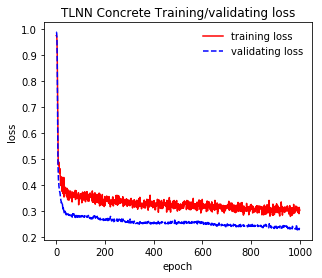

In [12]:
plt.ion()

plt.figure('TLNN Concrete loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Concrete Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


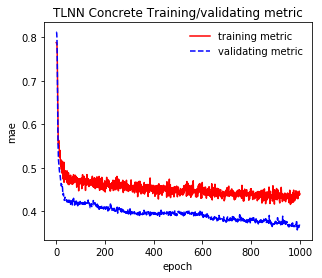

In [13]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Concrete metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('TLNN Concrete Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)


Text(0.5,0,'fitted values')

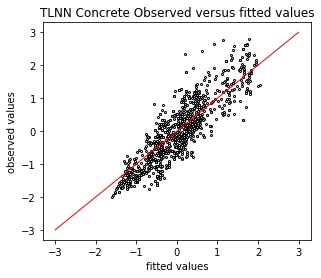

In [14]:
#----------------------------------------
# Plot the observed and fitted response values.

fitted = model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train])  # Here, this is used to compute fitted response values.
fitted = fitted[:, 0]

fitted.shape
Y_train.shape

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))

plt.figure('TLNN Concrete', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, "wo", markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('TLNN Concrete Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
